In [1]:
#Importing necessary libraries
#K-Neighbors, Perceptron, SVM, Decision Trees and Random Forests.
import matplotlib.pyplot as plt
import numpy as np

#Importing mnist_reader to import the data to this note book
import mnist_reader

#Importing Fashion MNIST images
X_train, y_train = mnist_reader.load_mnist('data', kind='train')
X_test, y_test = mnist_reader.load_mnist('data', kind='t10k')

In [2]:
#Printing shape of the data 
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [3]:
#Giving names for enumarated labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#Normalizing pixels into range of 0 and 1
X_train = X_train / 255.0

X_test = X_test / 255.0

In [5]:
scaledTrain = X_train
scaledTest = X_test

In [6]:
# Since the data is in vector form we need to convert it to a matrix in order to plot images
reshaped_X = np.reshape(X_train, (-1, 28, 28))
reshaped_X_test = np.reshape(X_test, (-1, 28, 28))

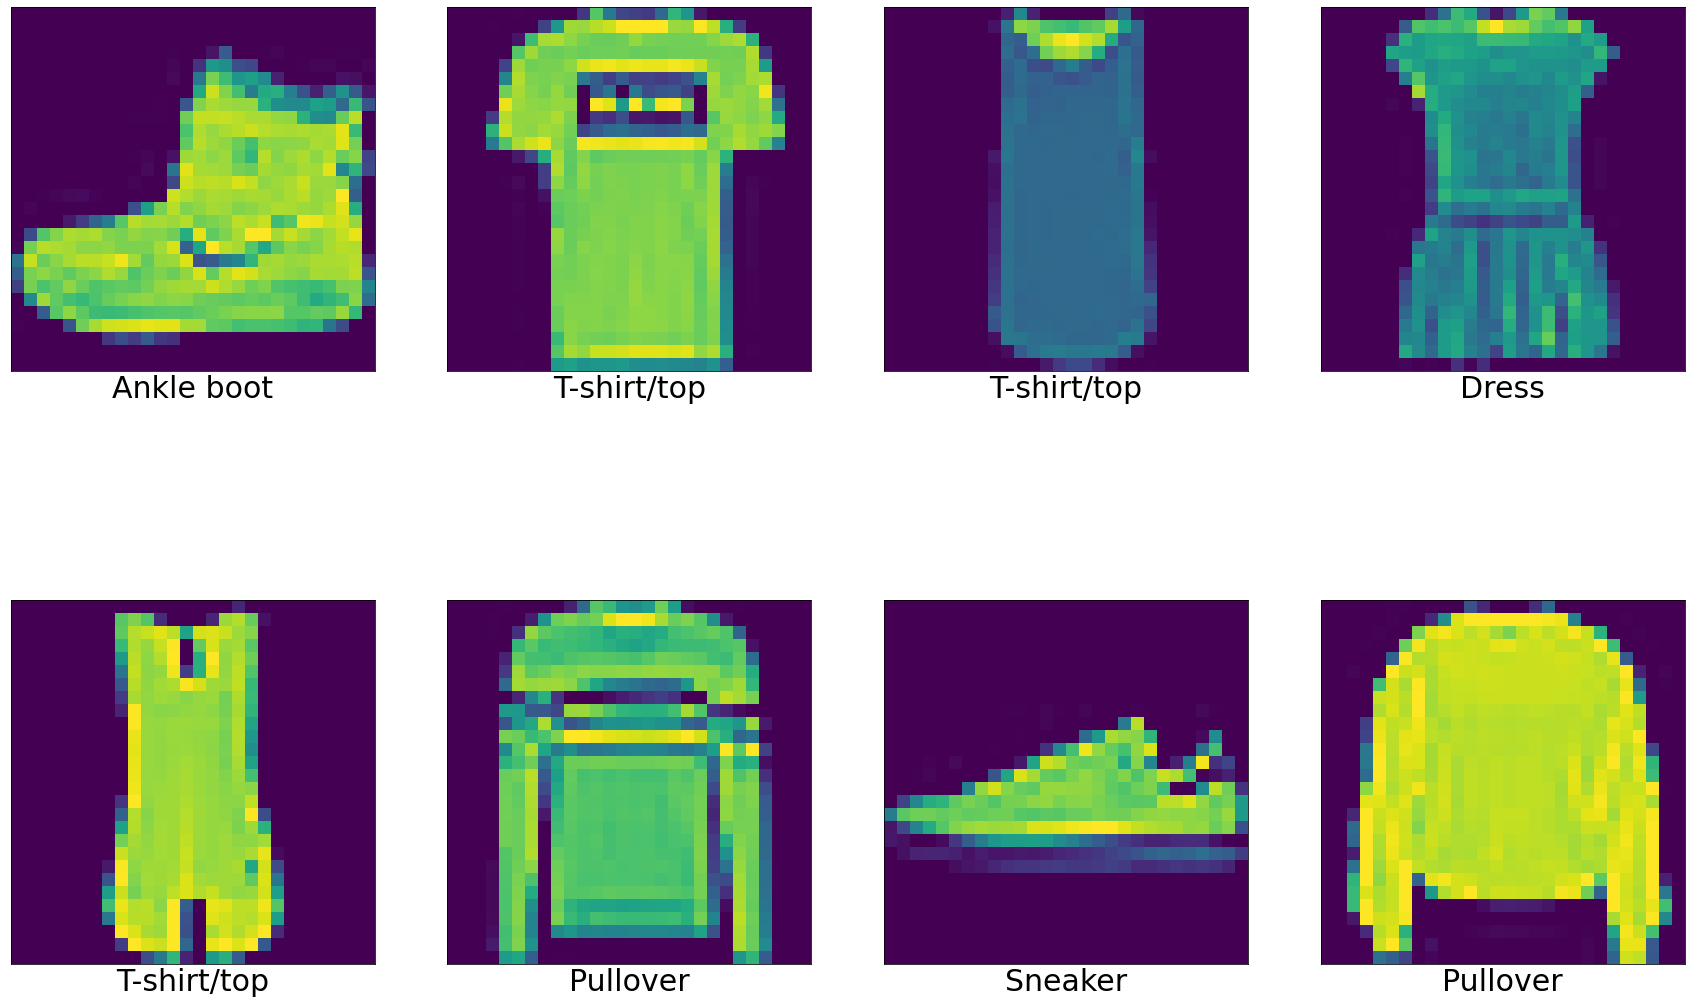

In [7]:
#Plotting the first 8 images
f, axarr = plt.subplots(2,4, figsize=(30,20)) 
a = 0
for  i in range(2):
    for j in range(4):
        axarr[i][j].imshow(reshaped_X[a])
        axarr[i][j].set_xticks([])
        axarr[i][j].set_yticks([])
        axarr[i][j].set_xlabel(f"{labels[y_train[a]]}", fontsize=30)
        a = a + 1

<Figure size 432x288 with 0 Axes>

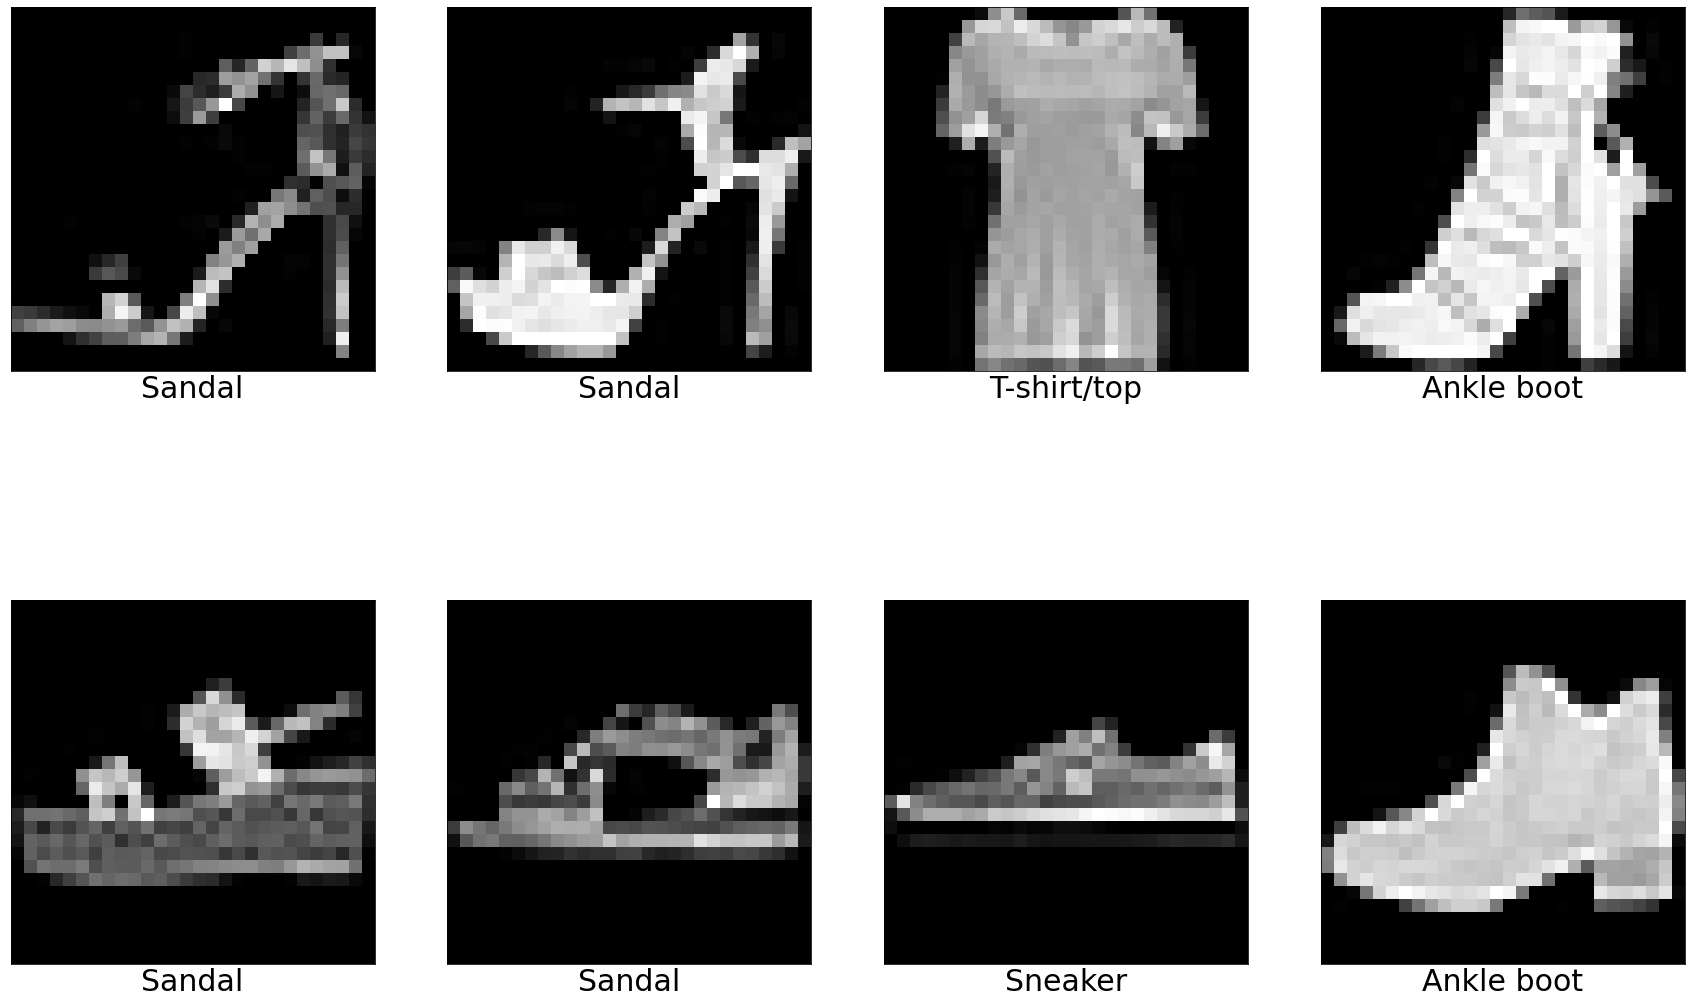

In [8]:
#Plot some more images in grayscale
plt.gray()
f, axarr = plt.subplots(2,4, figsize=(30,20)) 
a = 8
for  i in range(2):
    for j in range(4):
        axarr[i][j].imshow(reshaped_X[a])
        axarr[i][j].set_xticks([])
        axarr[i][j].set_yticks([])
        axarr[i][j].set_xlabel(f"{labels[y_train[a]]}", fontsize=30)
        a = a + 1

In [9]:
#Initiating K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski') 
knn.fit(scaledTrain, y_train)


KNeighborsClassifier()

In [10]:
#Predicting classes for the test data
knnPred=knn.predict(scaledTest)

In [11]:
#Printing Accuracy Score and Misclassified Samples for K Neighbors Classifier Model
from sklearn.metrics import accuracy_score
accKNN100 = accuracy_score(y_test,knnPred)
misKNN = (y_test!=knnPred).sum()
print("Accuracy:", accKNN100)
print("Misclassified samples:", misKNN)

Accuracy: 0.8554
Misclassified samples: 1446


In [12]:
#Pick 12 random test datas for comparing results
from numpy.random import randint
values = randint(0, 10000, 12)

<Figure size 432x288 with 0 Axes>

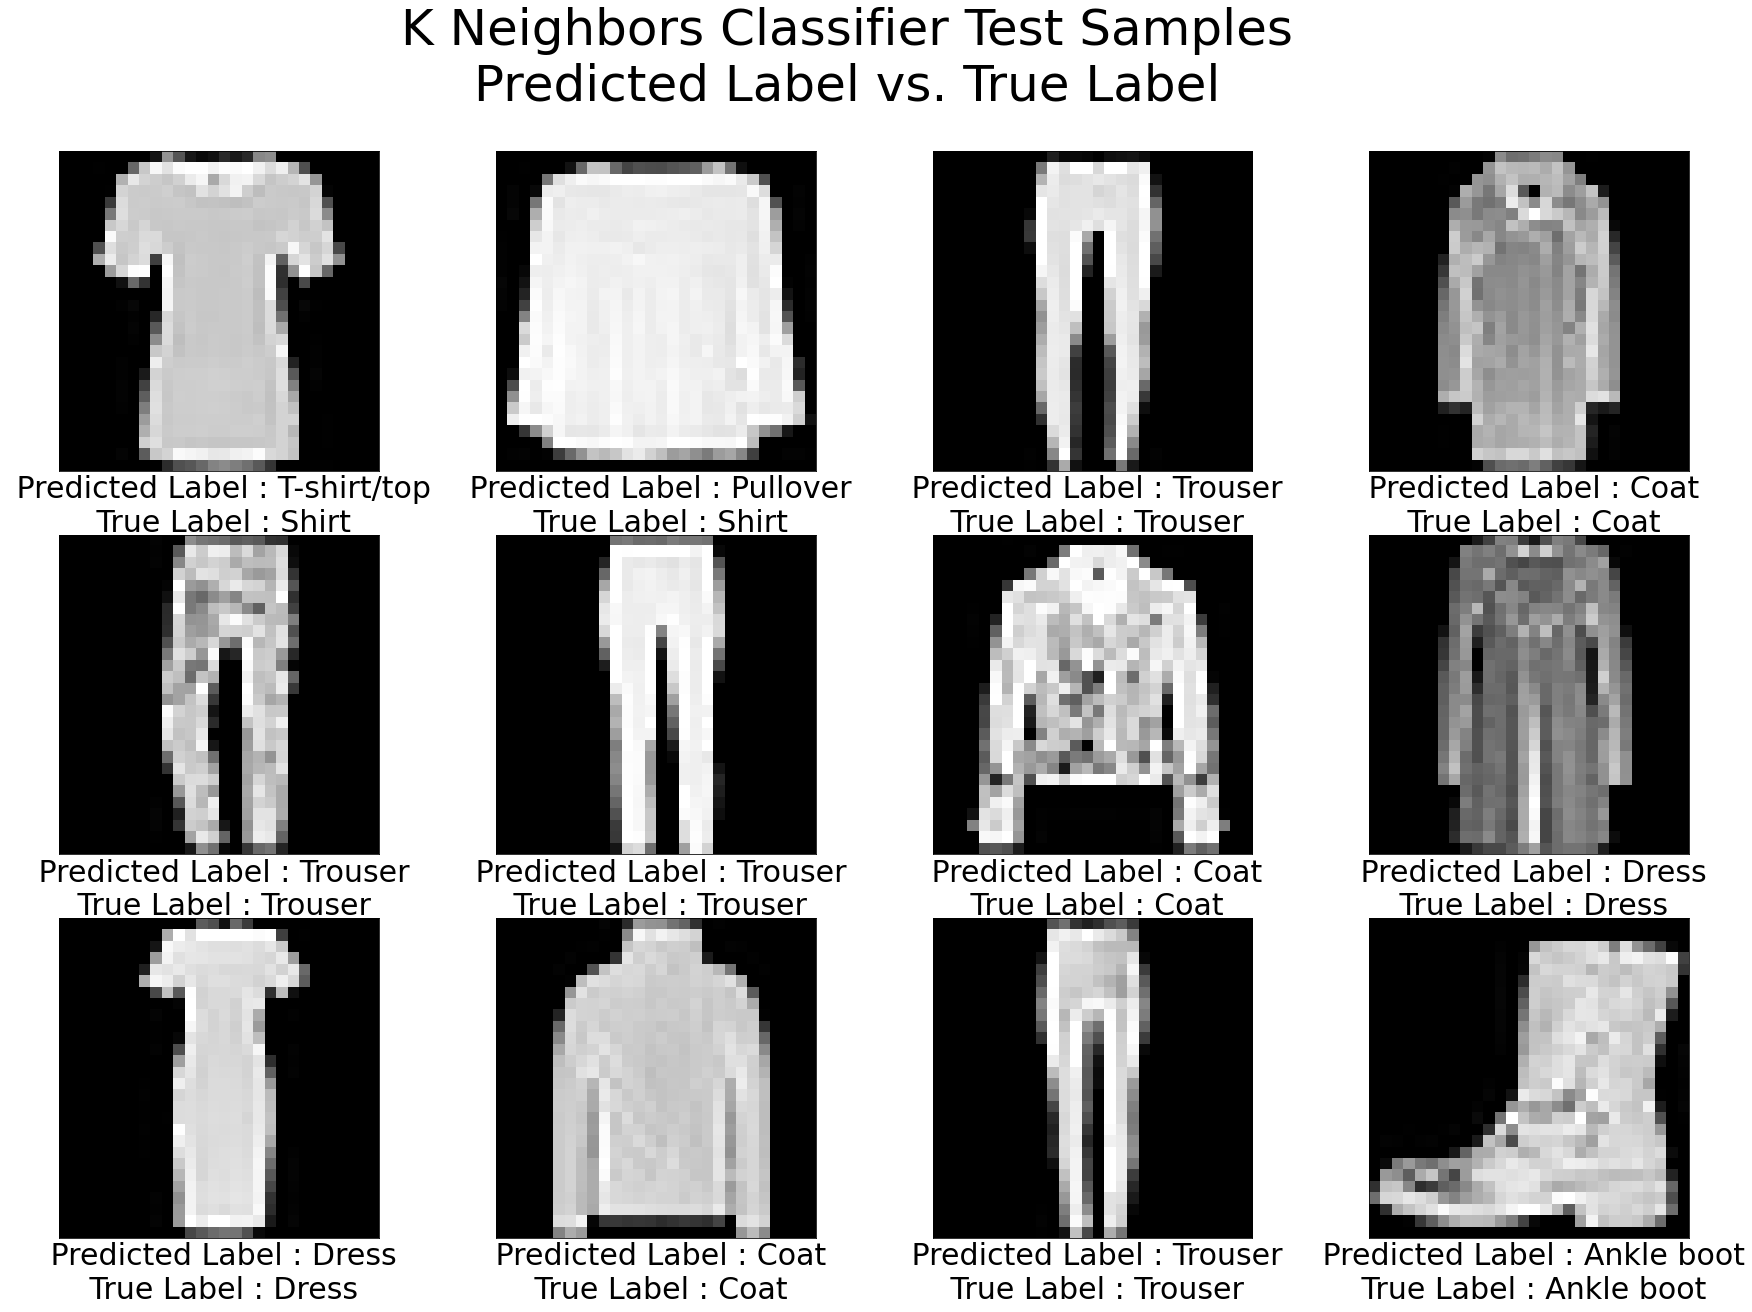

In [13]:
#Plot the 12 randomly chosen test data and compare with the predicted label and its true label
plt.gray()
f, axarr = plt.subplots(3,4, figsize=(30,20)) 
a = 0
for  i in range(3):
    for j in range(4):
        axarr[i][j].imshow(reshaped_X_test[values[a]])
        axarr[i][j].set_xticks([])
        axarr[i][j].set_yticks([])
        axarr[i][j].set_xlabel(f" Predicted Label : {labels[knnPred[values[a]]]}\n True Label : {labels[y_test[values[a]]]}", fontsize=30)
        a = a + 1
    
plt.suptitle("K Neighbors Classifier Test Samples\nPredicted Label vs. True Label", fontsize=50)
plt.show()

In [14]:
#Defining function for plotting confusion matrix with Seaborn library
import seaborn as sn
from sklearn.metrics import confusion_matrix

def conf_matrix(preds):
    conf_mat = confusion_matrix(y_test,preds)
    fig, ax = plt.subplots(figsize=(15,10))
    sn.heatmap(conf_mat, annot=True, fmt='d',xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual') 
    plt.yticks(rotation=0) 
    plt.xlabel('Predicted')
    plt.show()

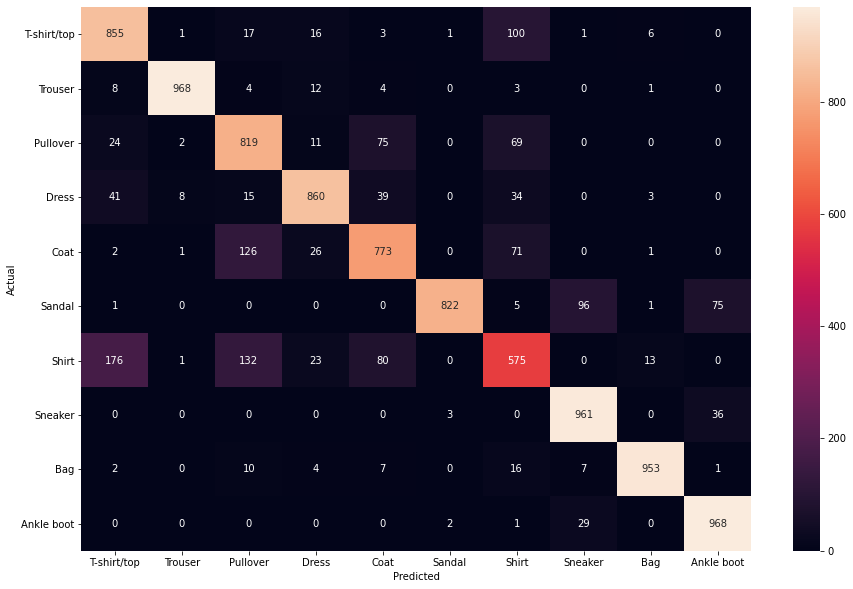

In [15]:
conf_matrix(knnPred)

In [16]:
#Intiating Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
mytree=DecisionTreeClassifier(criterion="entropy",max_depth=10,splitter="best")

mytree.fit(scaledTrain,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [17]:
#Predicting classes for the test data
decisionTreePred = mytree.predict(scaledTest)

In [18]:
#Printing Accuracy Score and Misclassified Samples for Decision Tree Classifier Model

from sklearn.metrics import accuracy_score
accDecTree100 = accuracy_score(y_test,decisionTreePred)
misDecTree = (y_test!=decisionTreePred).sum()
print("Accuracy:", accDecTree100)
print("Misclassified samples:", misDecTree)

Accuracy: 0.8107
Misclassified samples: 1893


<Figure size 432x288 with 0 Axes>

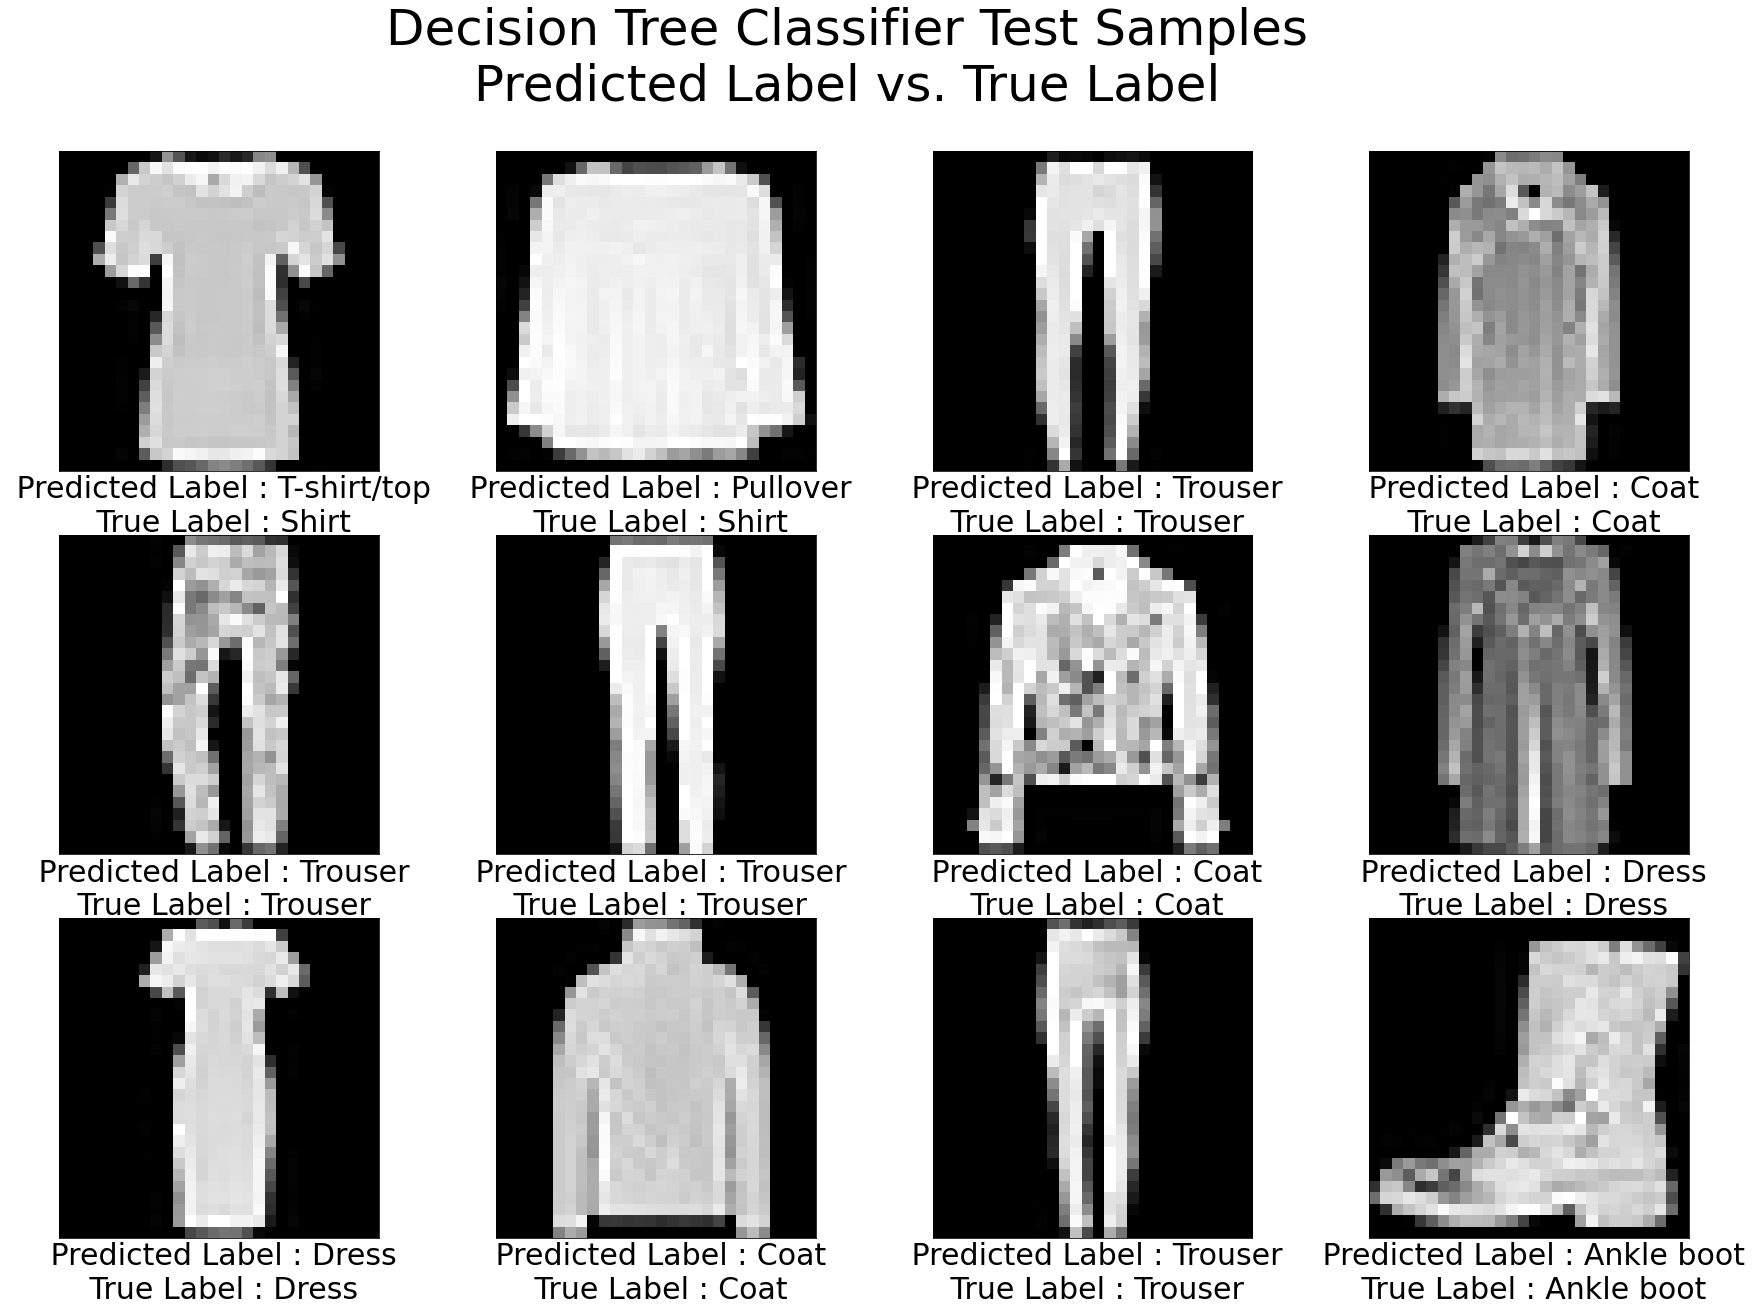

In [19]:
#Plot the 12 randomly chosen test data and compare with the predicted label and its true label
plt.gray()
f, axarr = plt.subplots(3,4, figsize=(30,20)) 
a = 0
for  i in range(3):
    for j in range(4):
        axarr[i][j].imshow(reshaped_X_test[values[a]])
        axarr[i][j].set_xticks([])
        axarr[i][j].set_yticks([])
        axarr[i][j].set_xlabel(f" Predicted Label : {labels[decisionTreePred[values[a]]]}\n True Label : {labels[y_test[values[a]]]}", fontsize=30)
        a = a + 1
    
plt.suptitle("Decision Tree Classifier Test Samples\nPredicted Label vs. True Label", fontsize=50)
plt.show()

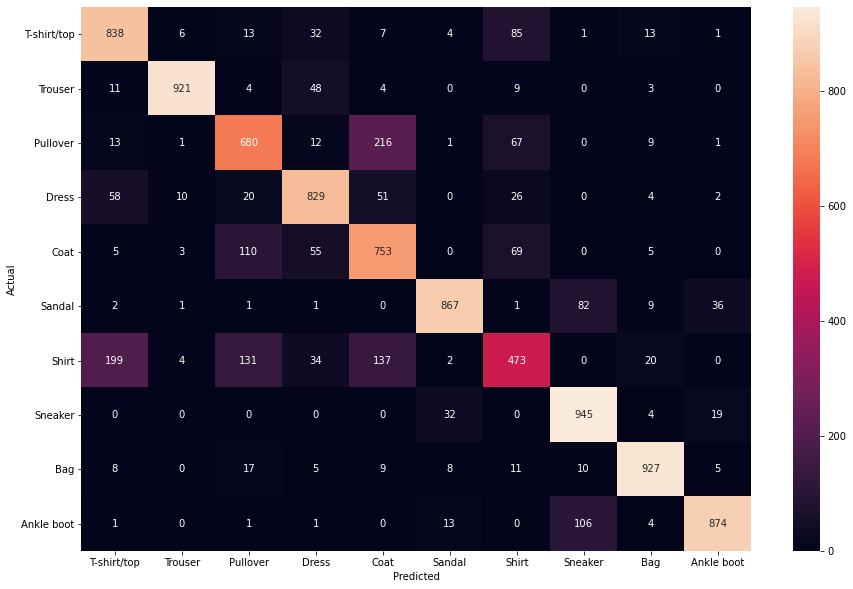

In [20]:
#Plotting the Confusion Matrix for Decision Tree Classifier Model
conf_matrix(decisionTreePred)

In [21]:
#Intiating Perceptron
from sklearn.linear_model import Perceptron
mypercept=Perceptron(max_iter=50, eta0=0.01, random_state=0)

mypercept.fit(scaledTrain, y_train)


Perceptron(eta0=0.01, max_iter=50)

In [22]:
#Predicting classes for the test data
perceptronPred=mypercept.predict(scaledTest)

In [23]:
#Printing Accuracy Score and Misclassified Samples for Perceptron Model

accPercept100 = accuracy_score(y_test,perceptronPred)
misPercept = (y_test!=perceptronPred).sum()
print("Accuracy:", accPercept100)
print("Misclassified samples:", misPercept)


Accuracy: 0.8142
Misclassified samples: 1858


<Figure size 432x288 with 0 Axes>

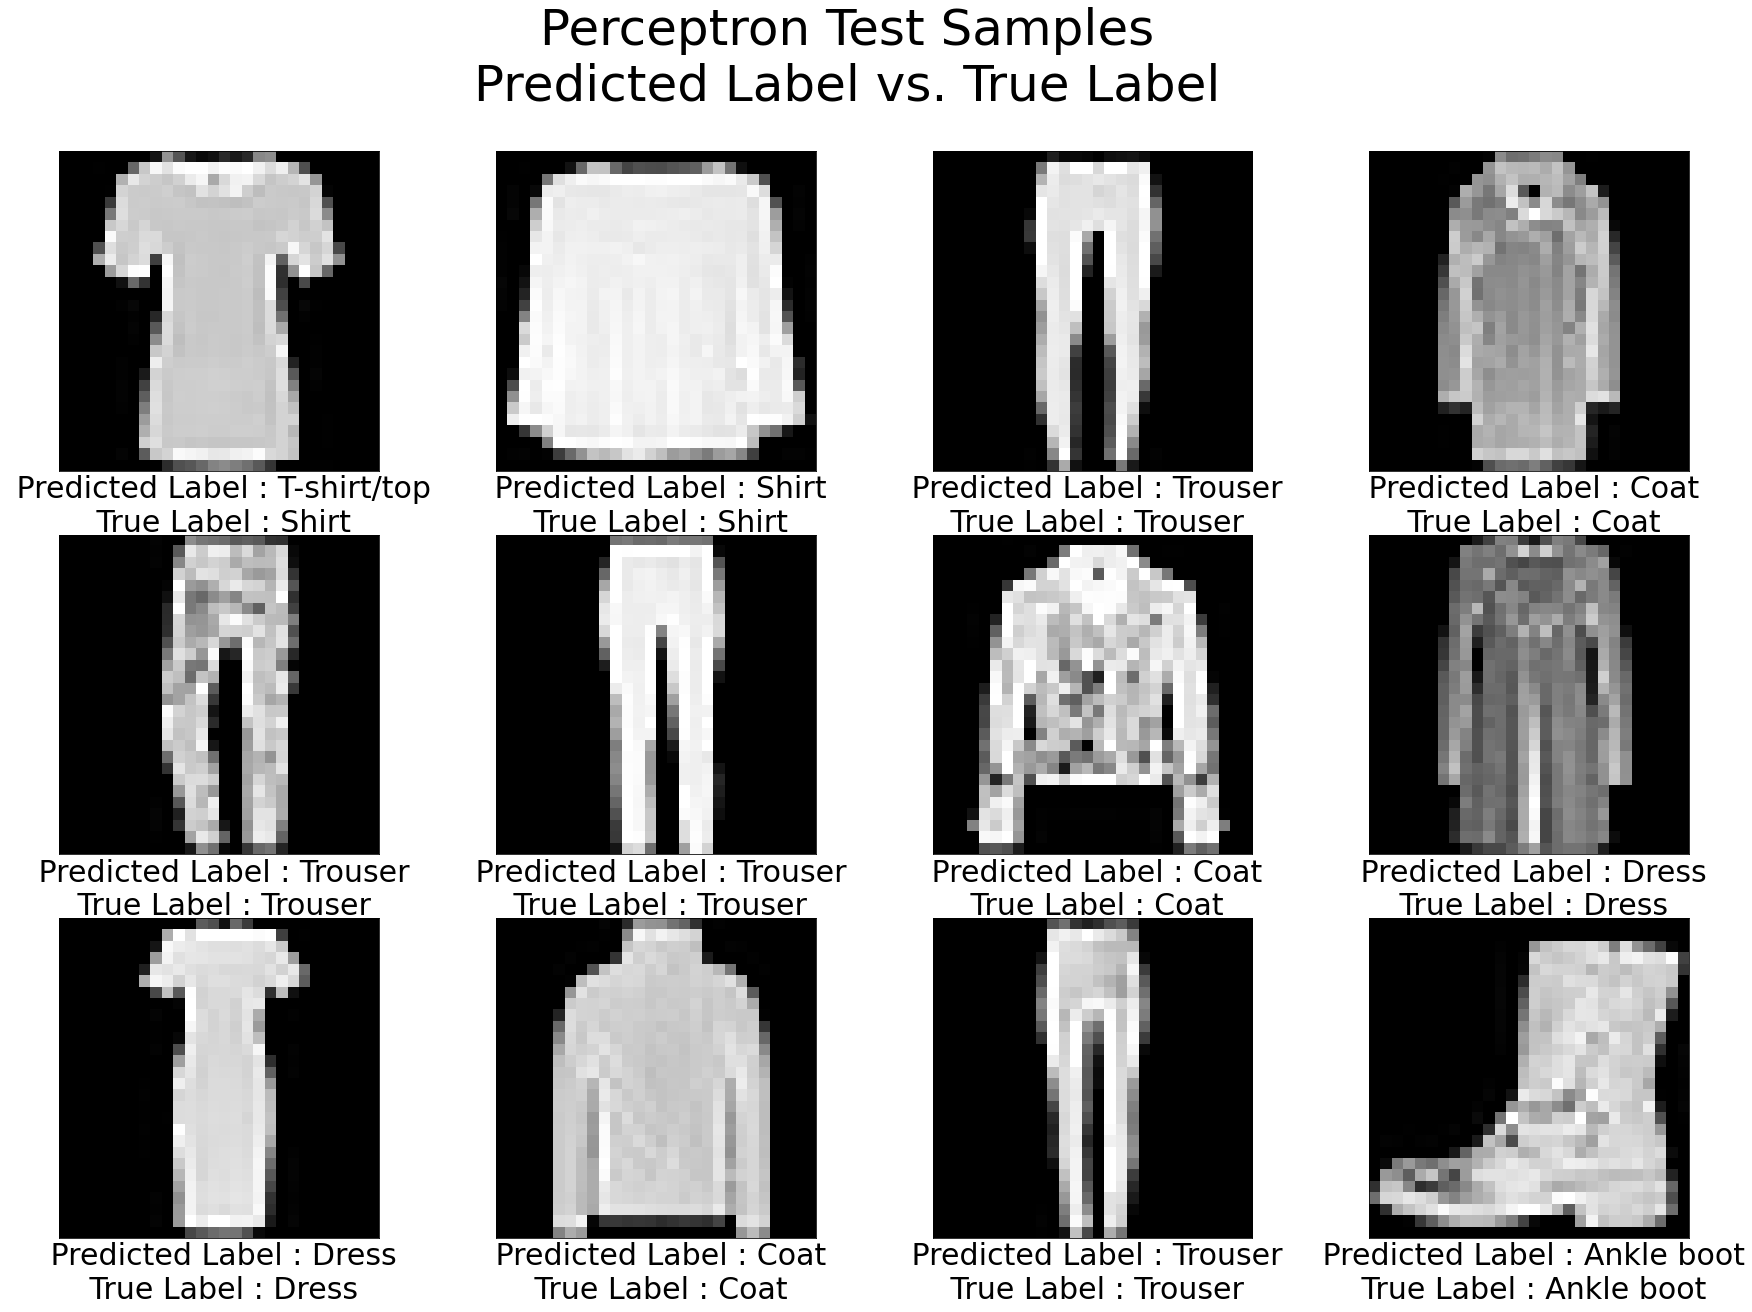

In [24]:
#Plot the 12 randomly chosen test data and compare with the predicted label and its true label
plt.gray()
f, axarr = plt.subplots(3,4, figsize=(30,20)) 
a = 0
for  i in range(3):
    for j in range(4):
        axarr[i][j].imshow(reshaped_X_test[values[a]])
        axarr[i][j].set_xticks([])
        axarr[i][j].set_yticks([])
        axarr[i][j].set_xlabel(f" Predicted Label : {labels[perceptronPred[values[a]]]}\n True Label : {labels[y_test[values[a]]]}", fontsize=30)
        a = a + 1
    
plt.suptitle("Perceptron Test Samples\nPredicted Label vs. True Label", fontsize=50)
plt.show()

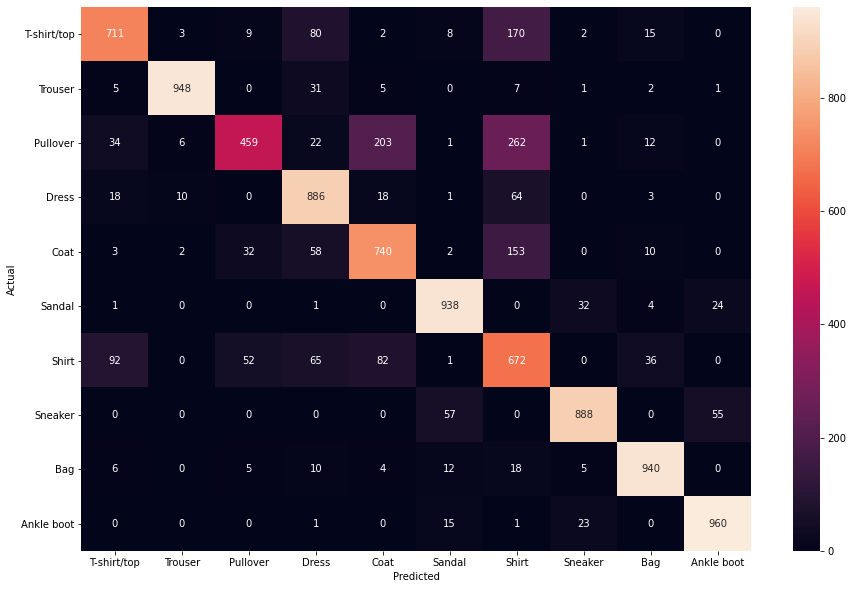

In [25]:
#Plotting the Confusion Matrix for Perceptron Model
conf_matrix(perceptronPred)

In [26]:
#Intiating Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
myforest=RandomForestClassifier(criterion='entropy', random_state=1)

myforest.fit(scaledTrain,y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [27]:
#Predicting classes for the test data
forestPred=myforest.predict(scaledTest)

In [28]:
#Printing Accuracy Score and Misclassified Samples for Random Forest Model
accForest100 = accuracy_score(y_test, forestPred)
misForest = (y_test!=forestPred).sum()
print("Accuracy:", accForest100)
print("Misclassified samples:", misForest)

Accuracy: 0.8796
Misclassified samples: 1204


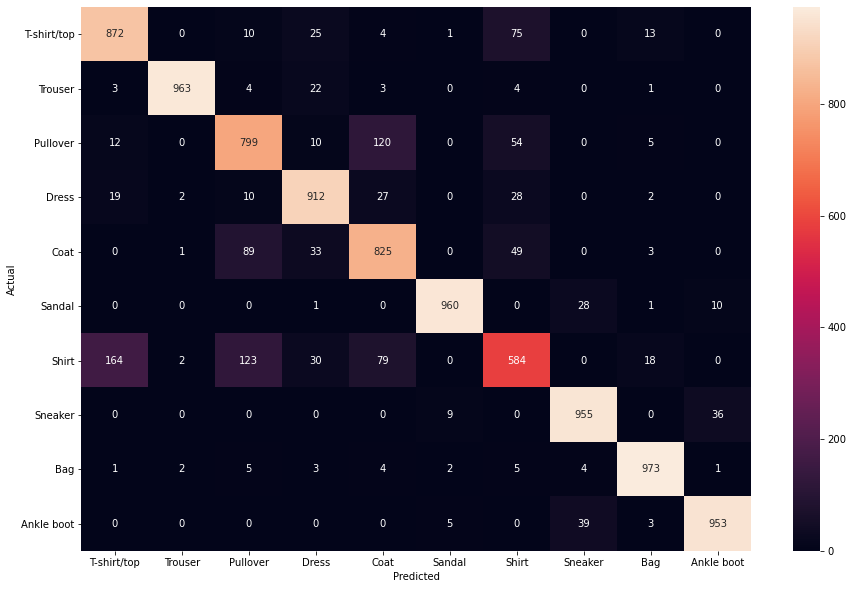

In [29]:
#Plotting the Confusion Matrix for Random Forest Classifier Model
conf_matrix(forestPred)

<Figure size 432x288 with 0 Axes>

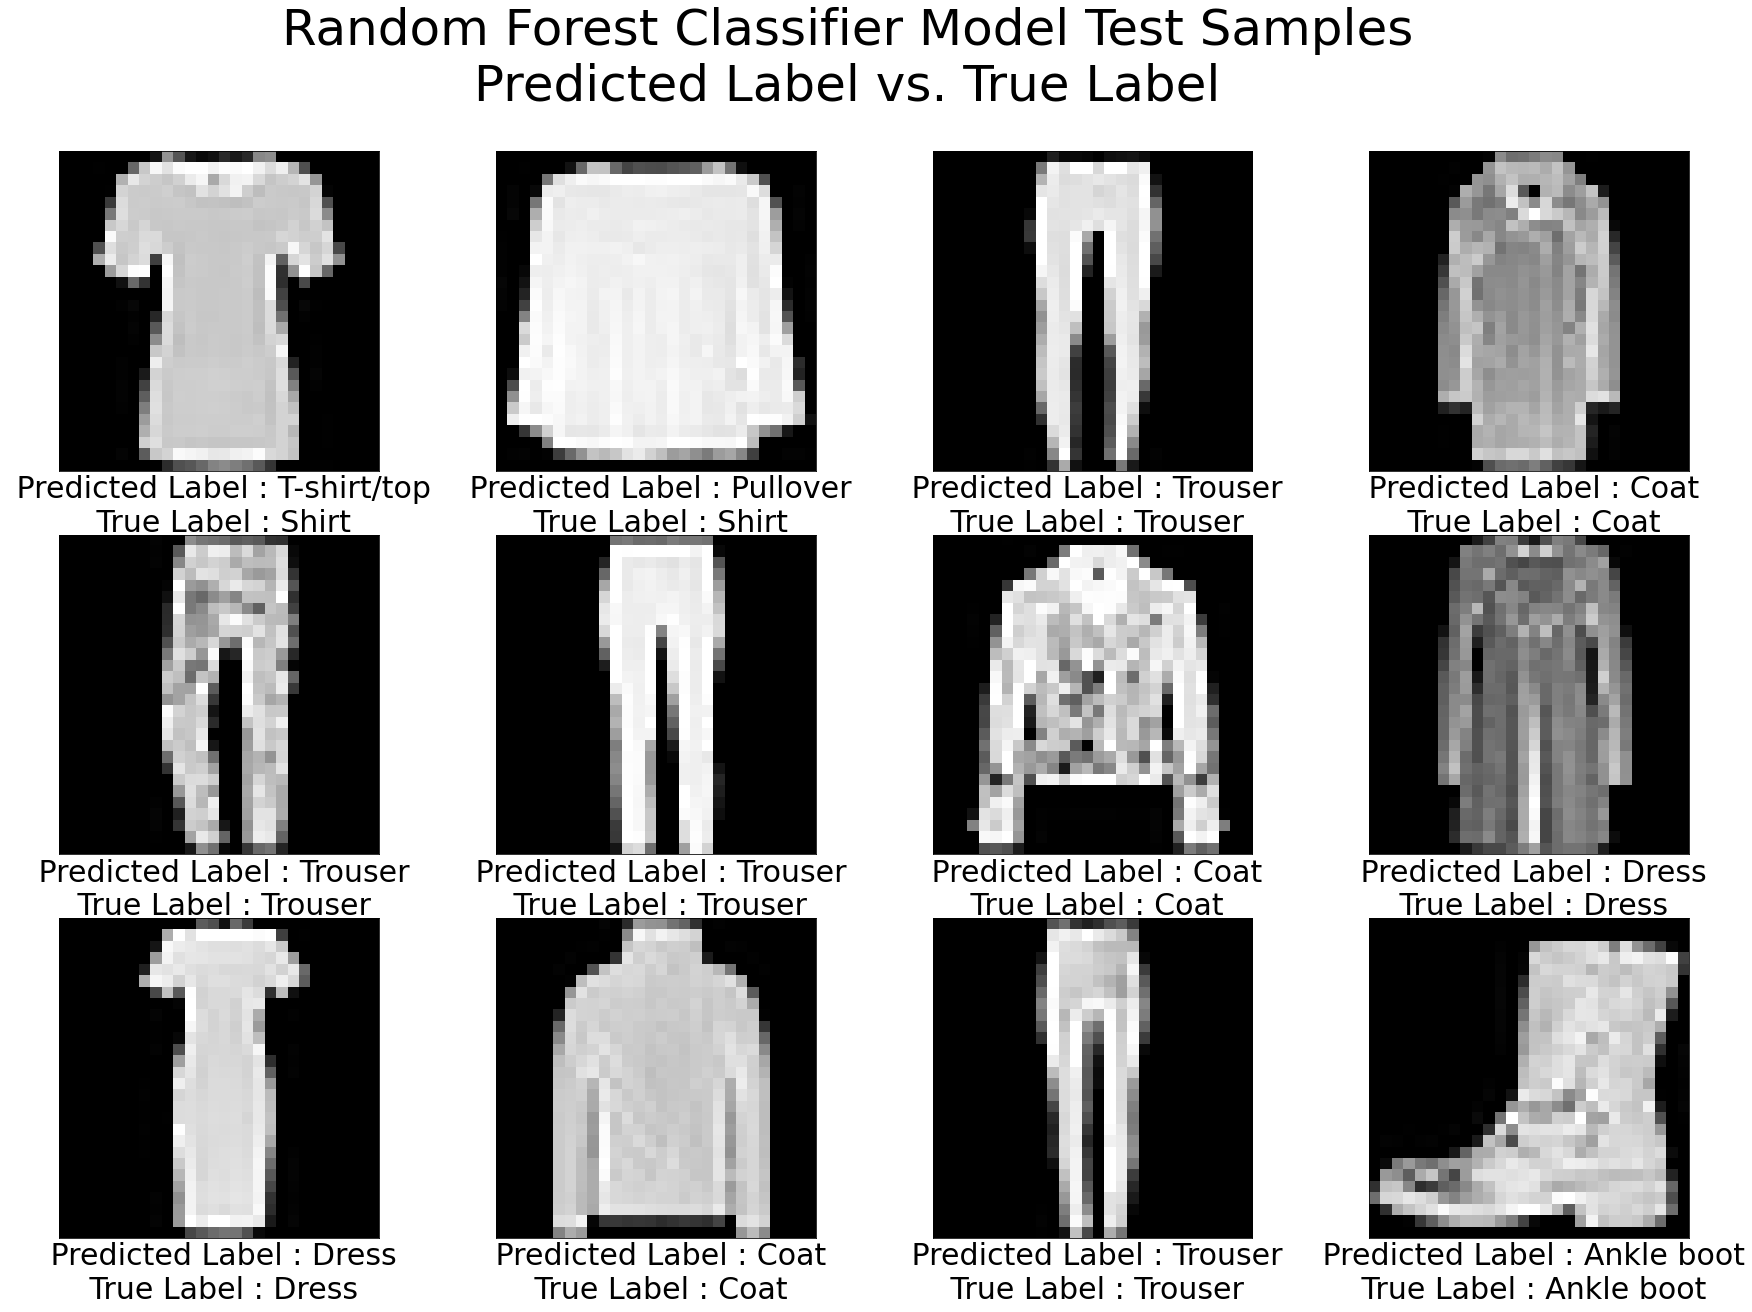

In [30]:
#Plot the 12 randomly chosen test data and compare with the predicted label and its true label
plt.gray()
f, axarr = plt.subplots(3,4, figsize=(30,20)) 
a = 0
for  i in range(3):
    for j in range(4):
        axarr[i][j].imshow(reshaped_X_test[values[a]])
        axarr[i][j].set_xticks([])
        axarr[i][j].set_yticks([])
        axarr[i][j].set_xlabel(f" Predicted Label : {labels[forestPred[values[a]]]}\n True Label : {labels[y_test[values[a]]]}", fontsize=30)
        a = a + 1
    
plt.suptitle("Random Forest Classifier Model Test Samples\nPredicted Label vs. True Label", fontsize=50)
plt.show()

In [31]:
#Intiating SVC
from sklearn.svm import SVC
mysvc=SVC(C=1, kernel="poly")

mysvc.fit(scaledTrain,y_train)

SVC(C=1, kernel='poly')

In [32]:
#Predicting on test data
svcPred = mysvc.predict(scaledTest)

In [33]:
#Printing Accuracy Score and Misclassified Samples for SVC Model
accSVC100 = accuracy_score(y_test, svcPred)
misSVC = (y_test!=svcPred).sum()
print("Accuracy:", accSVC100)
print("Misclassified samples:", misSVC)

Accuracy: 0.863
Misclassified samples: 1370


<Figure size 432x288 with 0 Axes>

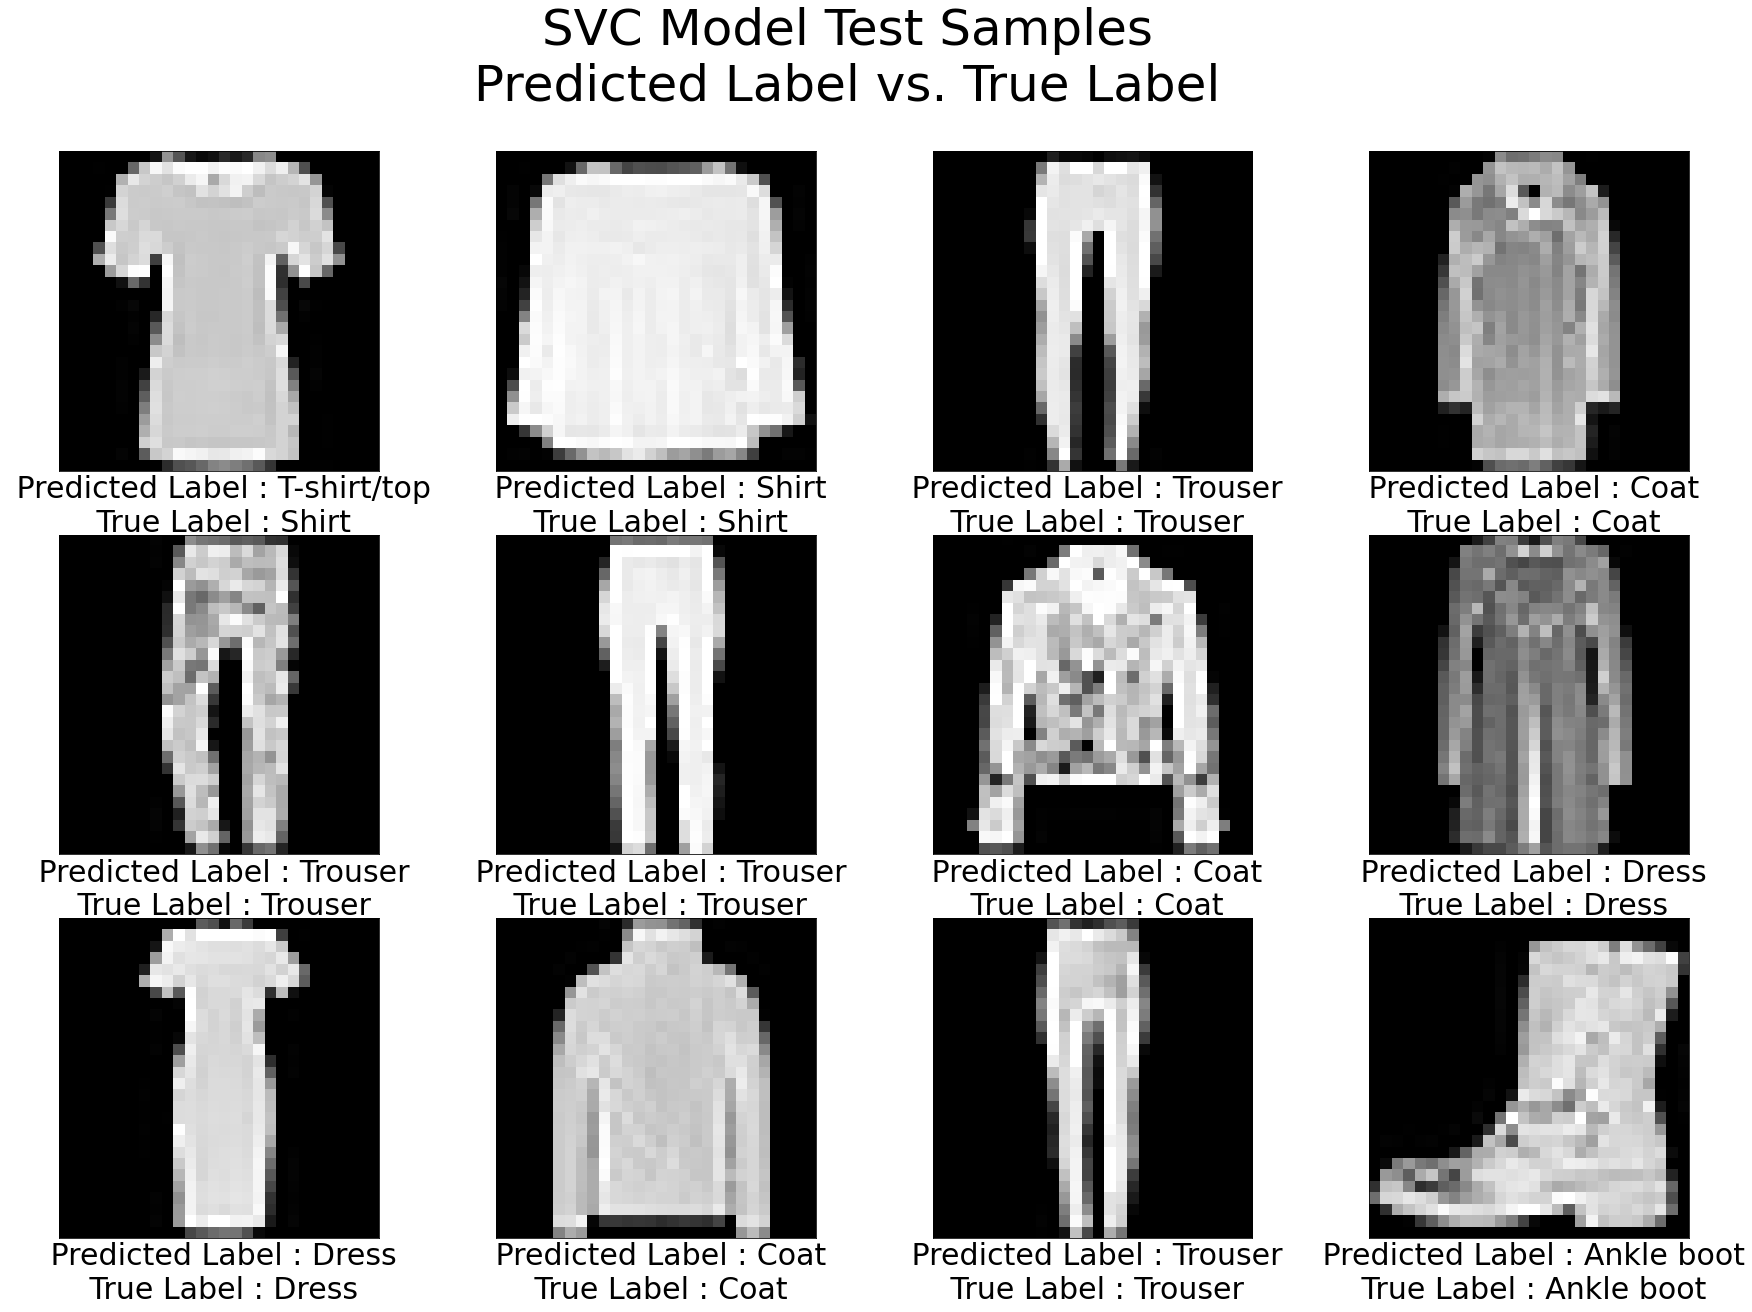

In [34]:
#Plot the 12 randomly chosen test data and compare with the predicted label and its true label
plt.gray()
f, axarr = plt.subplots(3,4, figsize=(30,20)) 
a = 0
for  i in range(3):
    for j in range(4):
        axarr[i][j].imshow(resh                                                                                                                                                                                                                                                                              aped_X_test[values[a]])
        axarr[i][j].set_xticks([])
        axarr[i][j].set_yticks([])
        axarr[i][j].set_xlabel(f" Predicted Label : {labels[svcPred[values[a]]]}\n True Label : {labels[y_test[values[a]]]}", fontsize=30)
        a = a + 1
    
plt.suptitle("SVC Model Test Samples\nPredicted Label vs. True Label", fontsize=50)
plt.show()

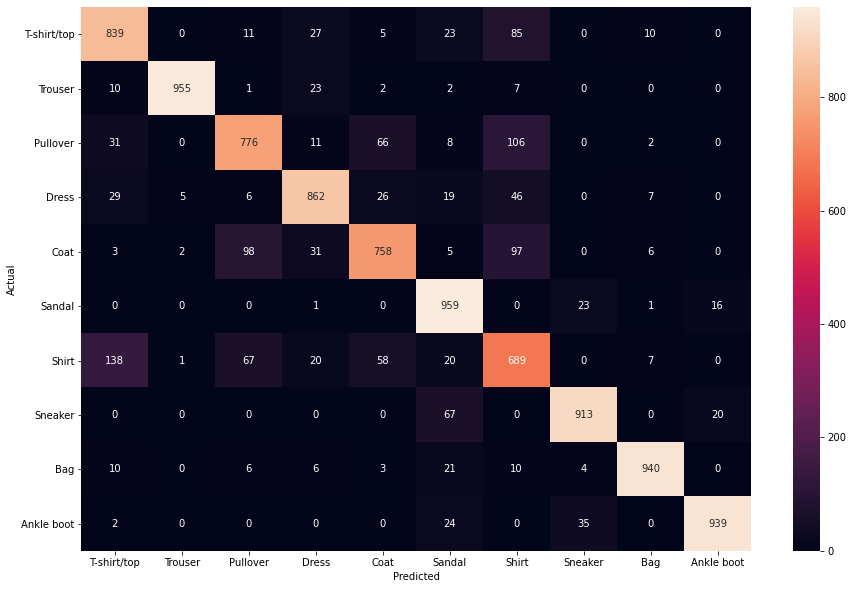

In [35]:
#Plotting the Confusion Matrix for SVC Model

conf_matrix(svcPred)

In [36]:
#We will use PCA to reduce the dimensions
from sklearn.decomposition import PCA
myPCA=PCA()

In [37]:
x_pca = myPCA.fit_transform(scaledTrain)

In [38]:
x_pca.shape

(60000, 784)

In [39]:
#Printing explained variance ratios of all features
ex_var_rat = myPCA.explained_variance_ratio_
ex_var_rat

array([2.90392279e-01, 1.77553100e-01, 6.01922198e-02, 4.95742800e-02,
       3.84765515e-02, 3.46076932e-02, 2.34169052e-02, 1.90541363e-02,
       1.34984344e-02, 1.31426709e-02, 9.92875162e-03, 9.13254895e-03,
       7.65792563e-03, 6.59705576e-03, 6.07850704e-03, 5.89821476e-03,
       5.51934287e-03, 5.24499833e-03, 4.58078922e-03, 4.55514728e-03,
       4.33683561e-03, 4.07097460e-03, 3.84758002e-03, 3.72551401e-03,
       3.61106681e-03, 3.50656193e-03, 3.33241175e-03, 3.19359785e-03,
       3.08062729e-03, 2.93272870e-03, 2.75602713e-03, 2.65061934e-03,
       2.63703362e-03, 2.55835311e-03, 2.46212276e-03, 2.35901271e-03,
       2.30289913e-03, 2.25522353e-03, 2.18475967e-03, 2.09324081e-03,
       2.00282407e-03, 1.95739658e-03, 1.94689347e-03, 1.82783182e-03,
       1.75354238e-03, 1.71926195e-03, 1.68791688e-03, 1.63974823e-03,
       1.60907972e-03, 1.54846297e-03, 1.52295361e-03, 1.50044371e-03,
       1.46795411e-03, 1.43312311e-03, 1.38276928e-03, 1.36996838e-03,
      

In [40]:
#Calculating the number of components required to explain 25% of the variance of the dataset
n_comp_25 = 0
exp_25 = 0
for rat in ex_var_rat:
    n_comp_25 += 1
    exp_25 += rat
    if(exp_25 > 0.25):
        break
print("Number of components required to explain 25% of the variance of the dataset : ",n_comp_25)
print(ex_var_rat[:n_comp_25])

Number of components required to explain 25% of the variance of the dataset :  1
[0.29039228]


In [41]:
#Dimension reduction with PCA for 25% explained variance for both train and test data
x_pca = PCA(n_components=n_comp_25)
x_pca25 = x_pca.fit_transform(scaledTrain)
x_pca25_test = x_pca.transform(scaledTest)

In [42]:
#Calculating the number of components required to explain 50% of the variance of the dataset
n_comp_50 = 0
exp_50 = 0
for rat in ex_var_rat:
    n_comp_50 += 1
    exp_50 += rat
    if(exp_50 > 0.5):
        break
print("Number of components required to explain 50% of the variance of the dataset : ",n_comp_50)
print(ex_var_rat[:n_comp_50])

Number of components required to explain 50% of the variance of the dataset :  3
[0.29039228 0.1775531  0.06019222]


In [43]:
#Dimension reduction with PCA for 50% explained variance for both train and test data
x_pca = PCA(n_components=n_comp_50)
x_pca50 = x_pca.fit_transform(scaledTrain)
x_pca50_test = x_pca.transform(scaledTest)

In [44]:
#Calculating the number of components required to explain 75% of the variance of the dataset
n_comp_75 = 0
exp_75 = 0
for rat in ex_var_rat:
    n_comp_75 += 1
    exp_75 += rat
    if(exp_75 > 0.75):
        break
print("Number of components required to explain 75% of the variance of the dataset : ",n_comp_75)
print(ex_var_rat[:n_comp_75])

Number of components required to explain 75% of the variance of the dataset :  14
[0.29039228 0.1775531  0.06019222 0.04957428 0.03847655 0.03460769
 0.02341691 0.01905414 0.01349843 0.01314267 0.00992875 0.00913255
 0.00765793 0.00659706]


In [45]:
#Dimension reduction with PCA for 75% explained variance for both train and test data
x_pca = PCA(n_components=n_comp_75)
x_pca75 = x_pca.fit_transform(scaledTrain)
x_pca75_test = x_pca.transform(scaledTest)

In [46]:
#Calculating the number of components required to explain 95% of the variance of the dataset
n_comp_95 = 0
exp_95 = 0
for rat in ex_var_rat:
    n_comp_95 += 1
    exp_95 += rat
    if(exp_95 > 0.95):
        break
print("Number of components required to explain 95% of the variance of the dataset : ",n_comp_95)

Number of components required to explain 95% of the variance of the dataset :  187


In [47]:
#Dimension reduction with PCA for 95% explained variance for both train and test data
x_pca = PCA(n_components=n_comp_95)
x_pca95 = x_pca.fit_transform(scaledTrain)
x_pca95_test = x_pca.transform(scaledTest)

In [48]:
#Defining function for K Neighbors Classifier Method for automation
knn_acc = []
def knn_f(x_pca_x, x_pca_xtest, var):
    knn=KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski') 
    knn.fit(x_pca_x, y_train)
    knnPred=knn.predict(x_pca_xtest)
    accKNN = accuracy_score(y_test,knnPred)
    knn_acc.append(accKNN)
    f, axarr = plt.subplots(3,4, figsize=(30,23)) 
    a = 0
    for  i in range(3):
        for j in range(4):
            axarr[i][j].imshow(reshaped_X_test[values[a]])
            axarr[i][j].set_xticks([])
            axarr[i][j].set_yticks([])
            axarr[i][j].set_xlabel(f" Predicted Label : {labels[knnPred[values[a]]]}\n True Label : {labels[y_test[values[a]]]}", fontsize=30)
            a = a + 1
    plt.suptitle(f"K Neighbors Classifier Test Samples for {var}% Explained Variance\nAccuracy:{accKNN}\nPredicted Label vs. True Label", fontsize=50)
    plt.show()
    conf_matrix(knnPred)

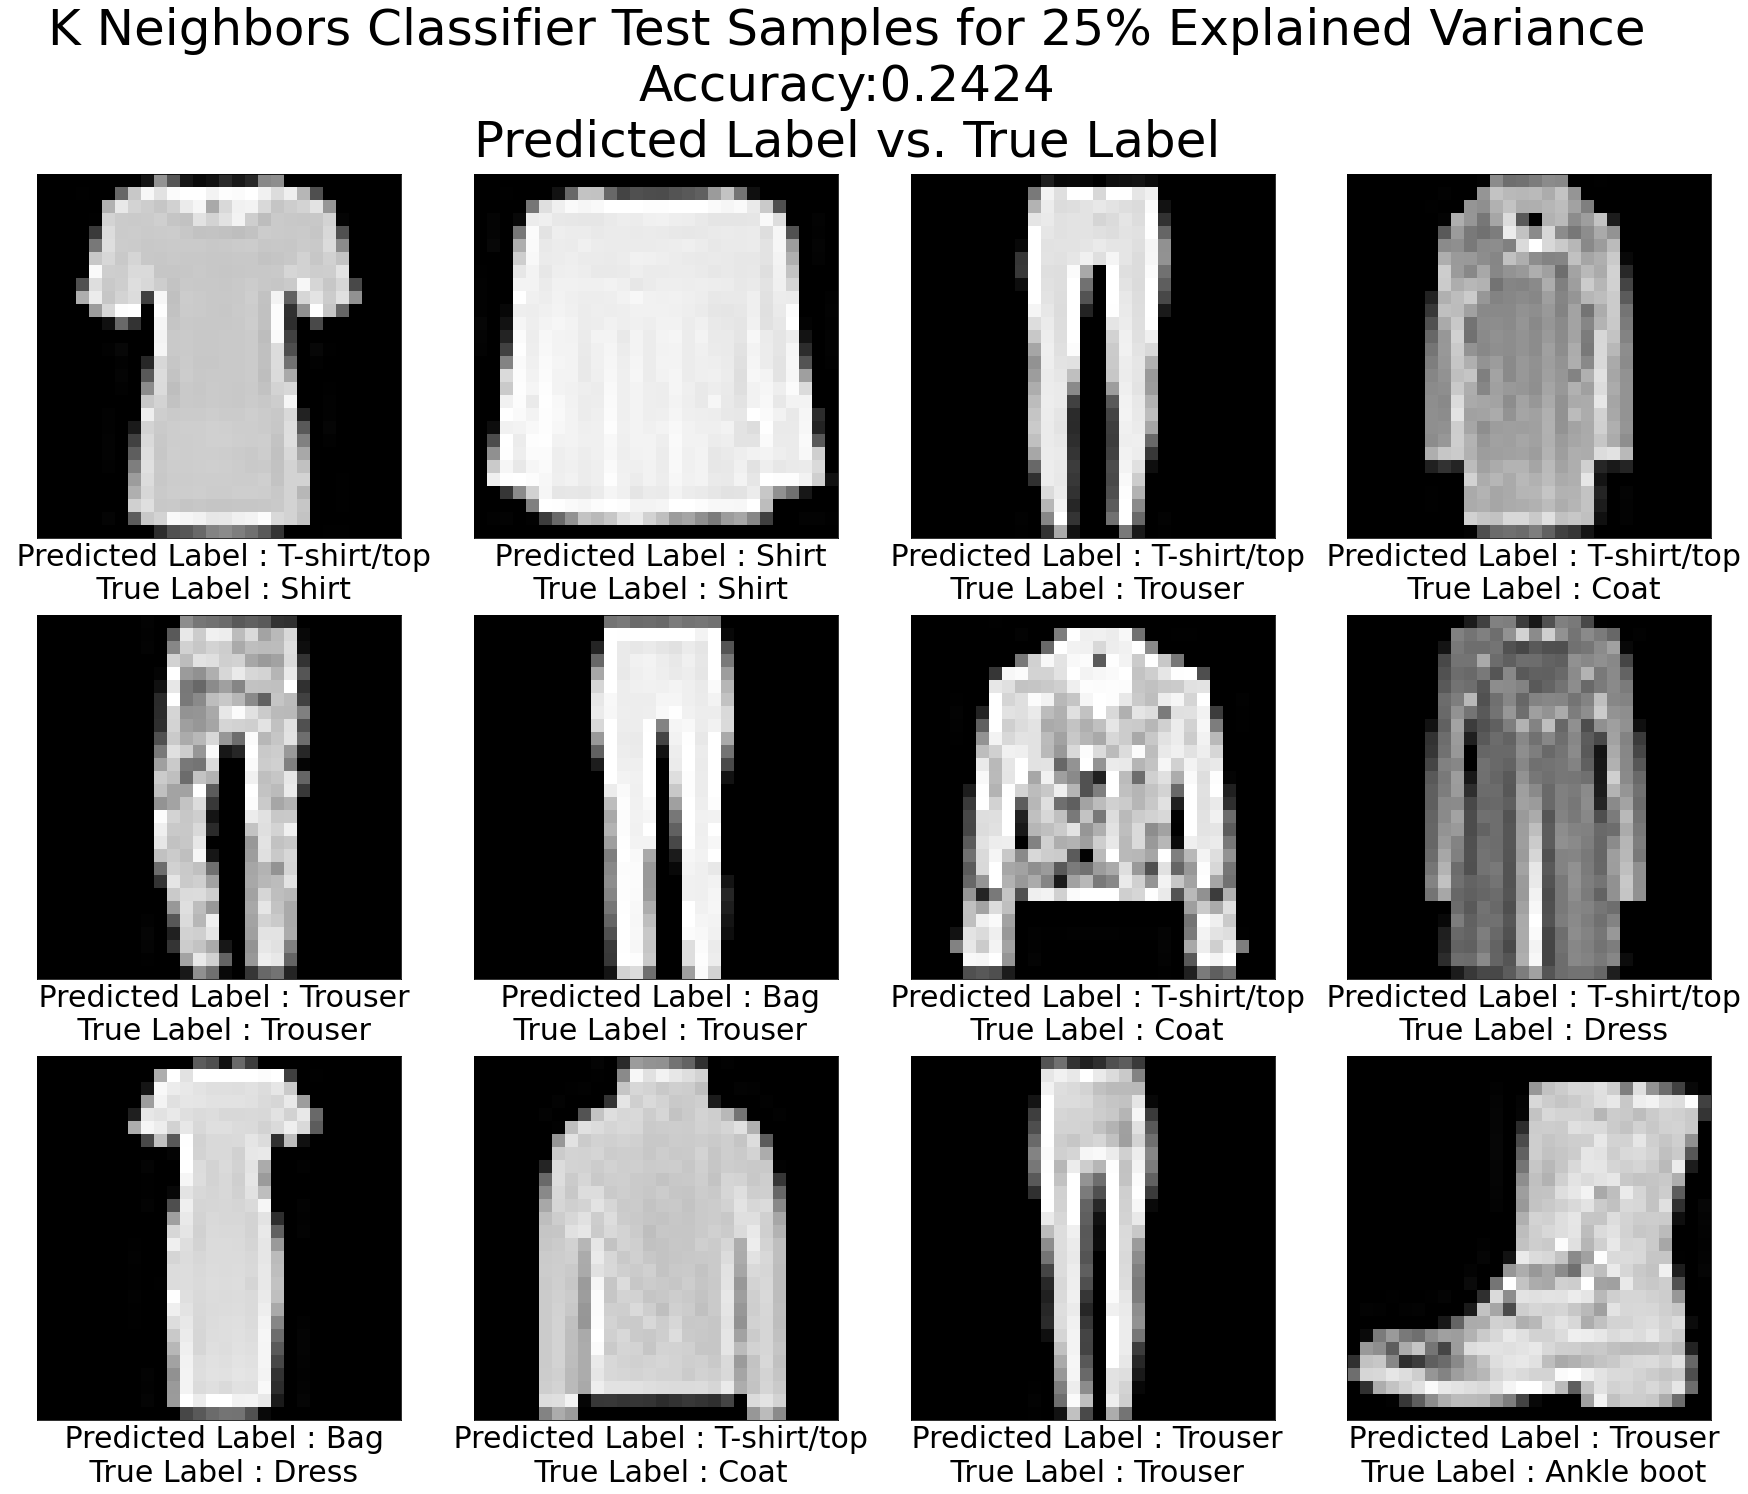

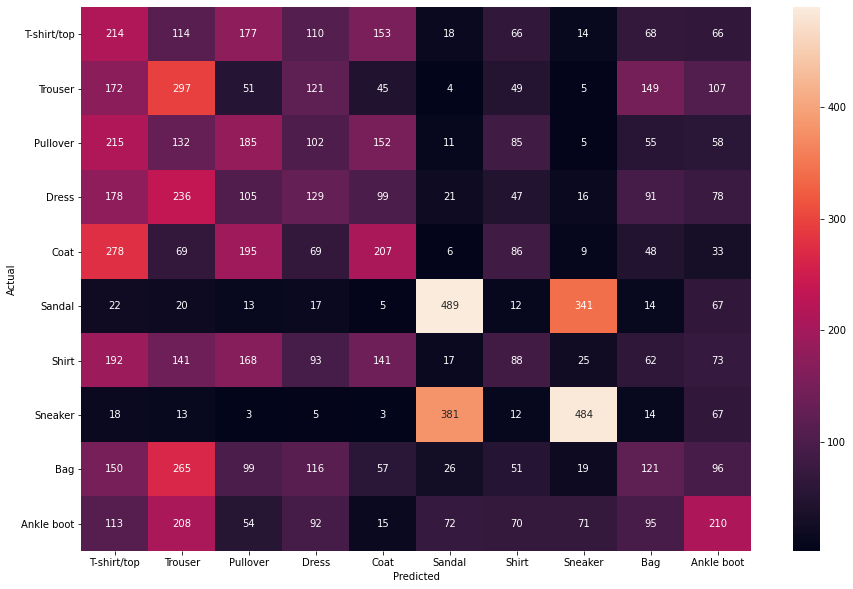

In [49]:
#Running K Neighbors Classifier Method for each reduced train and test data
knn_f(x_pca25, x_pca25_test, 25)

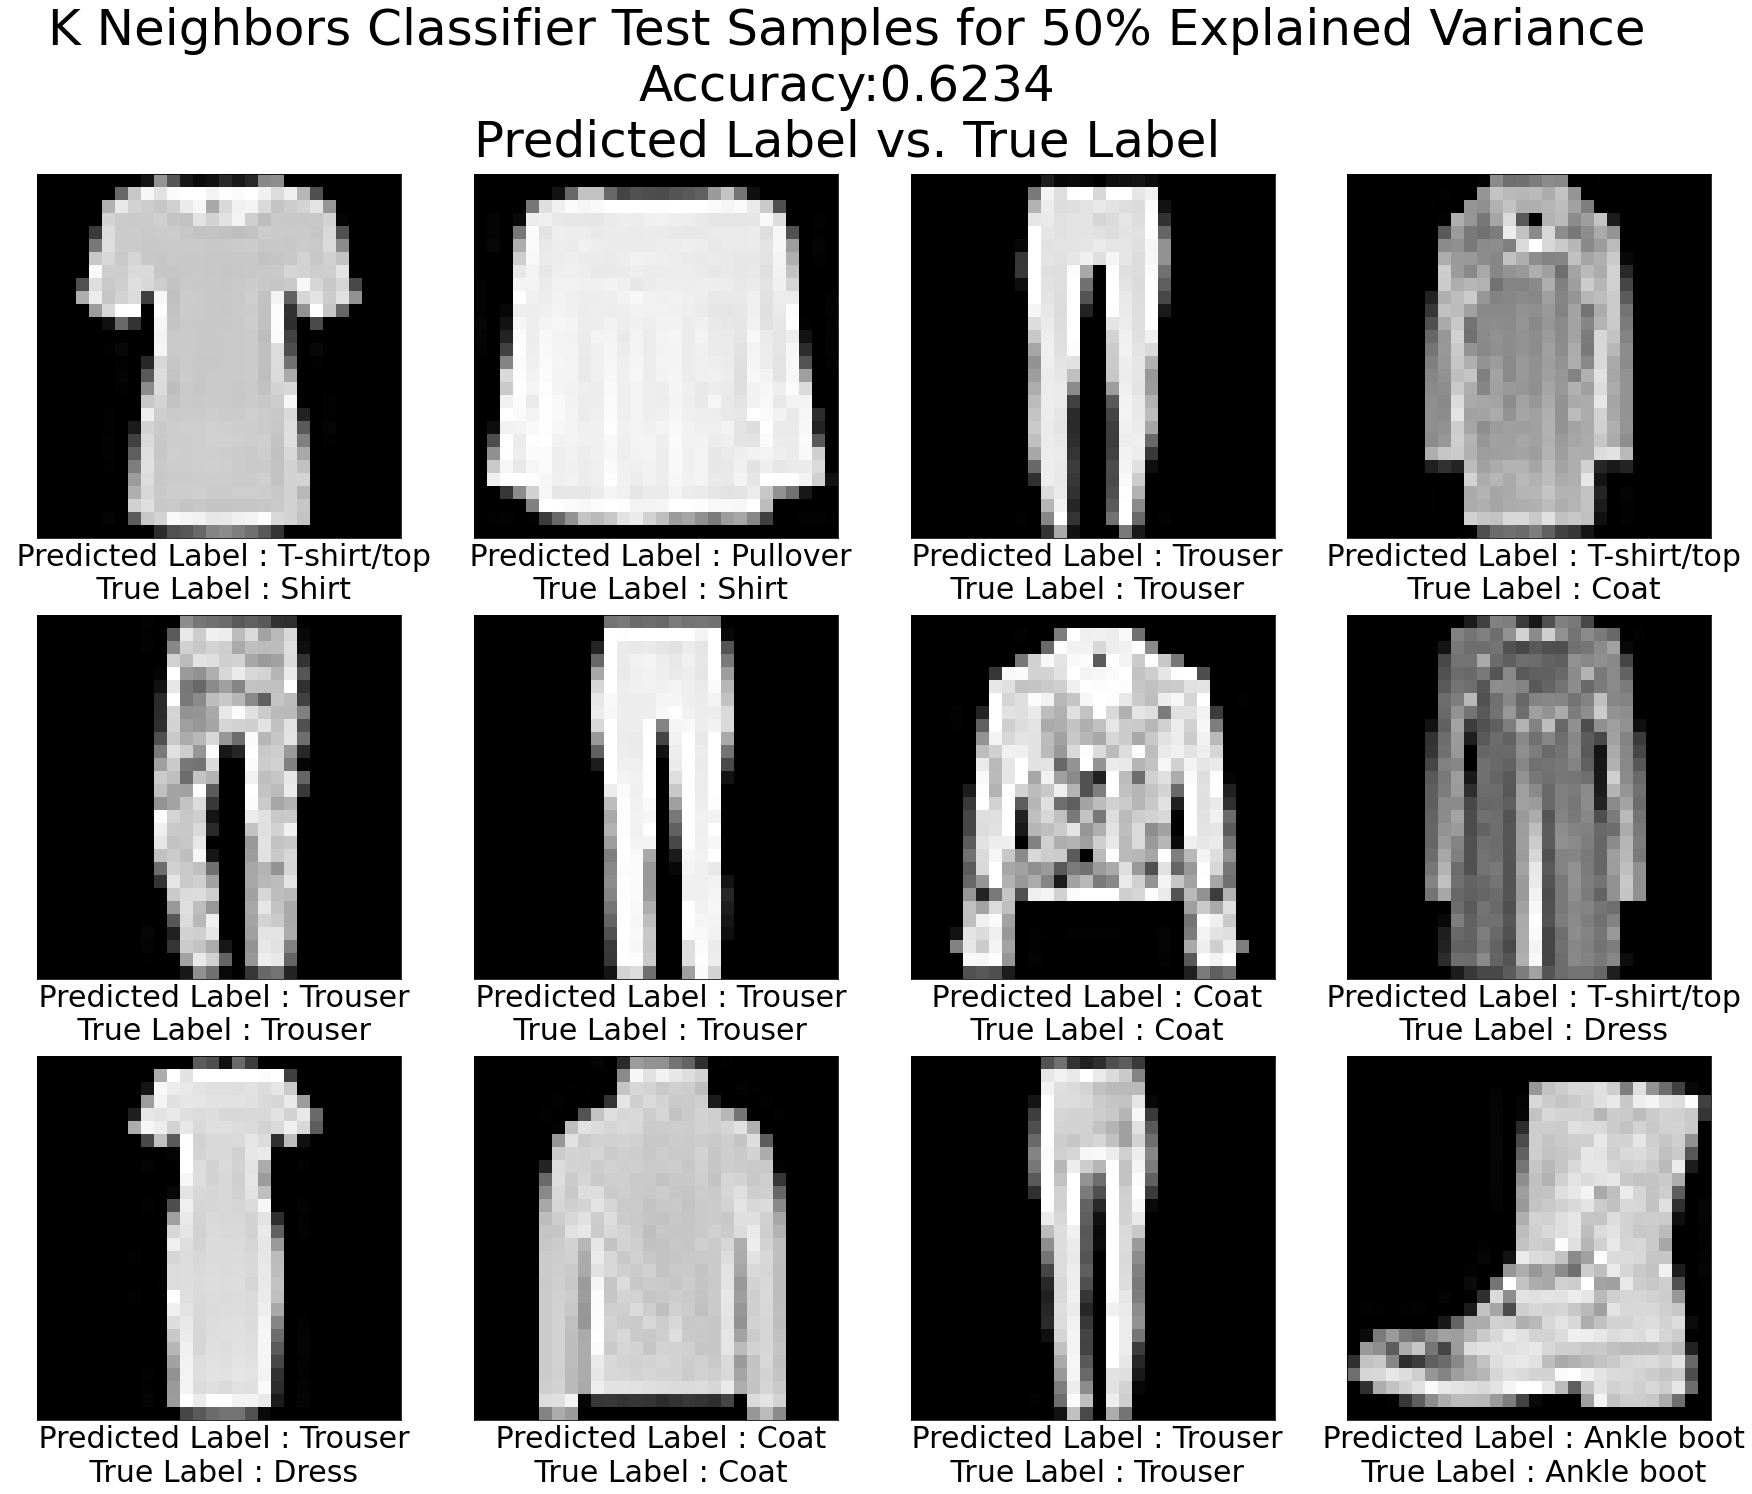

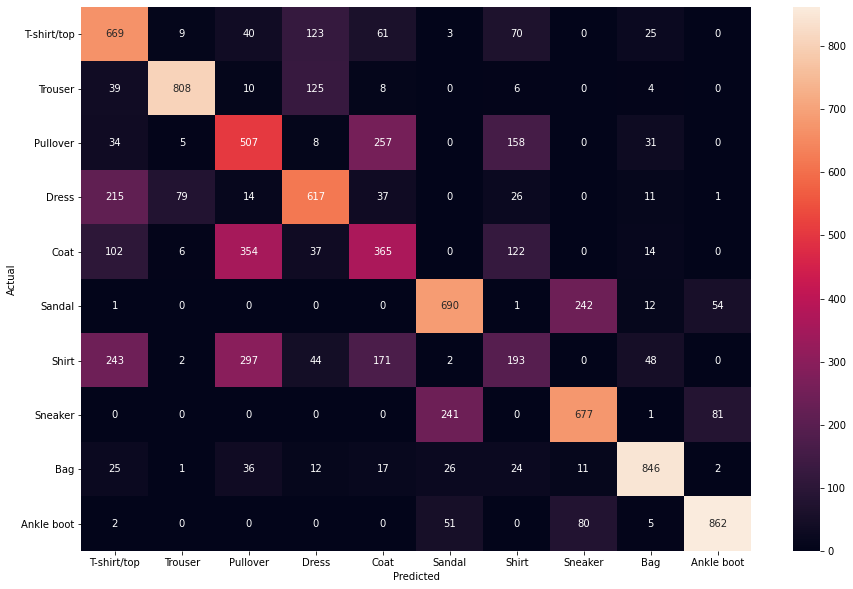

In [50]:
knn_f(x_pca50, x_pca50_test, 50)

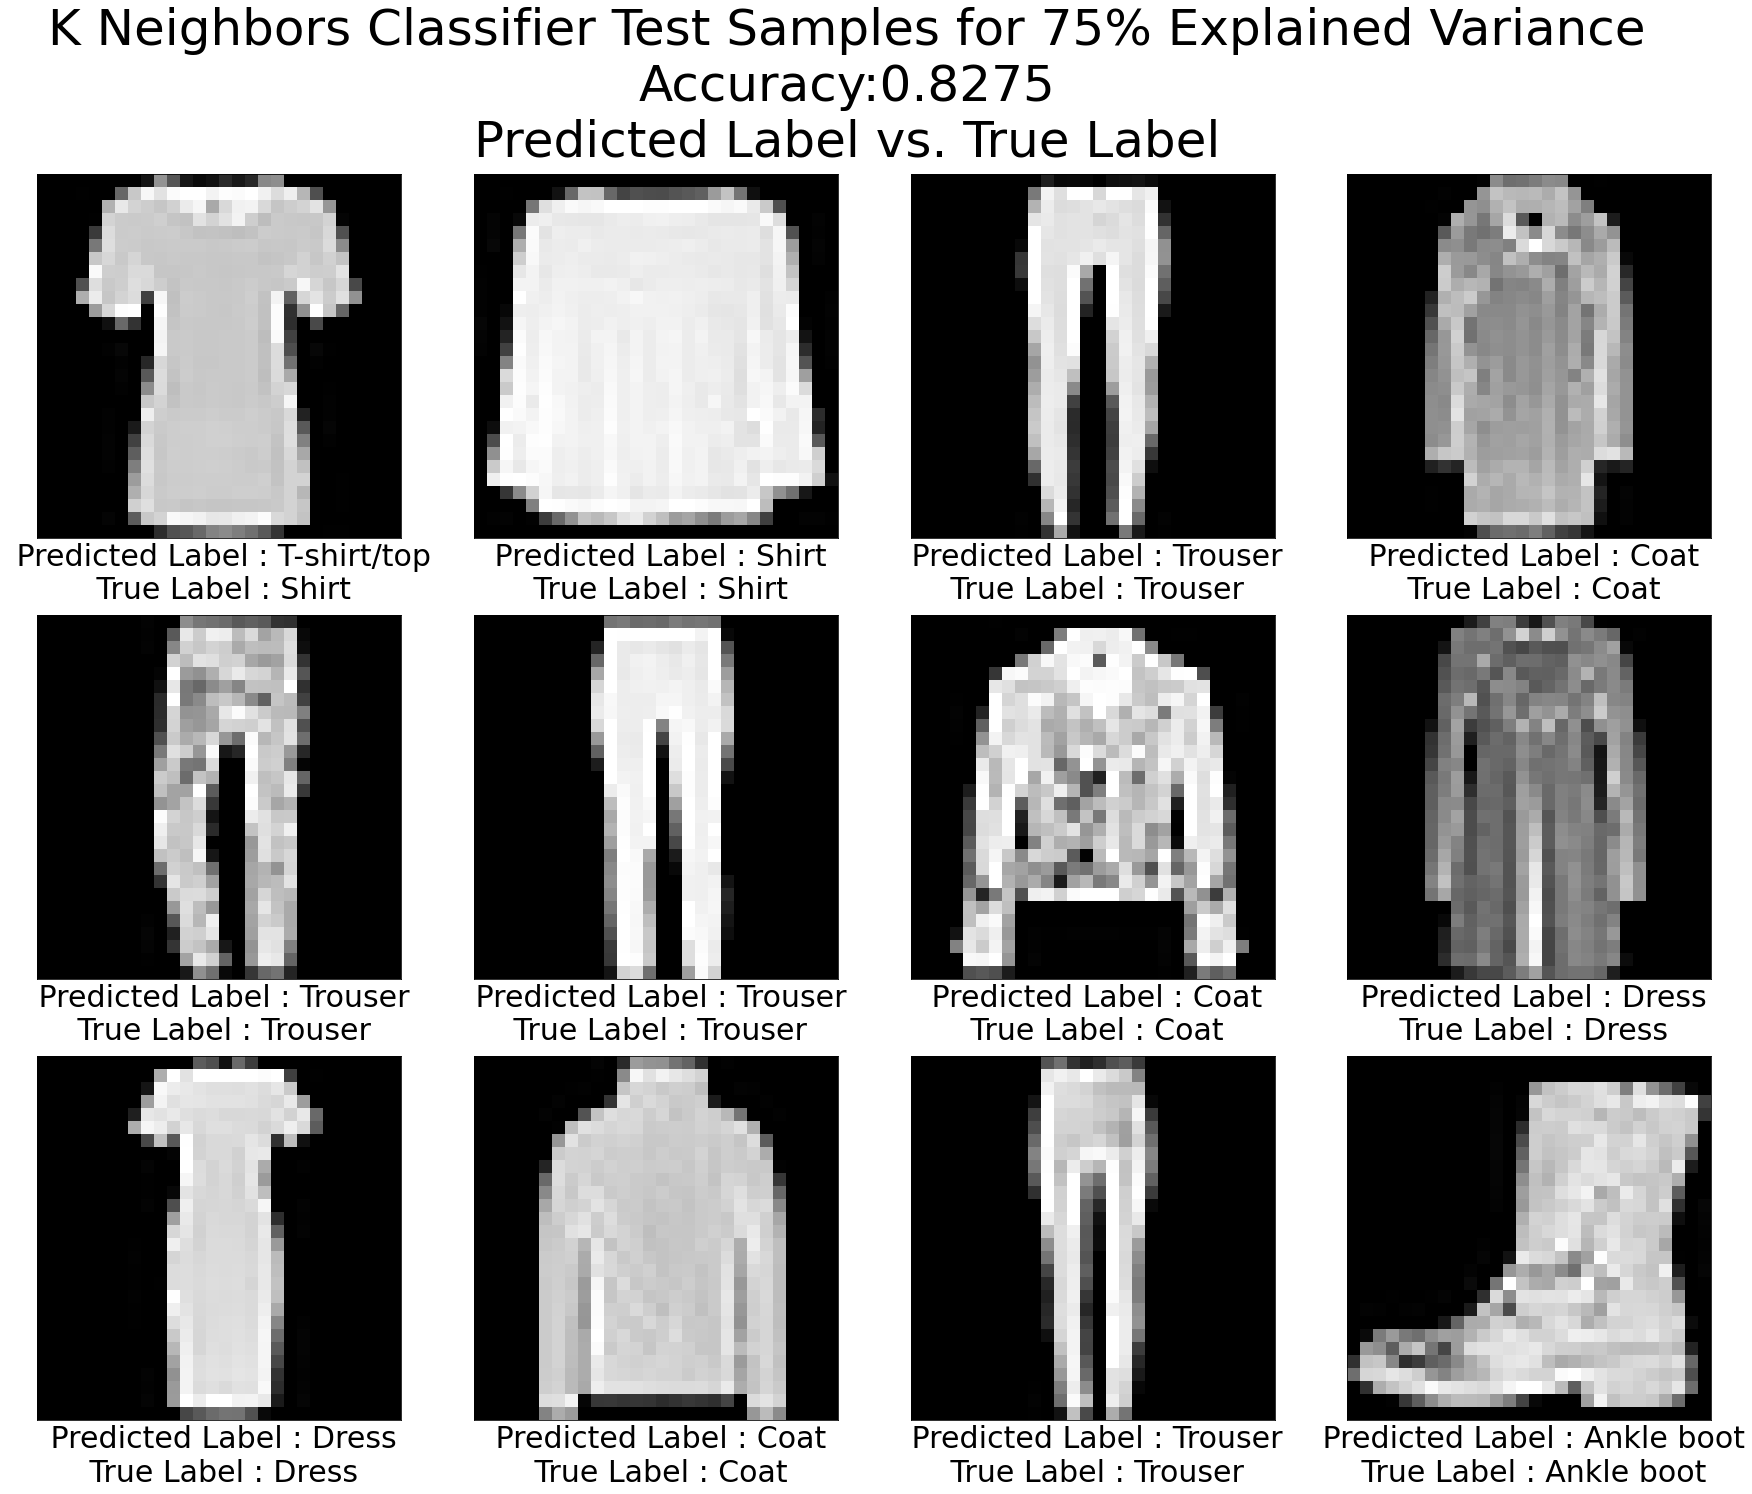

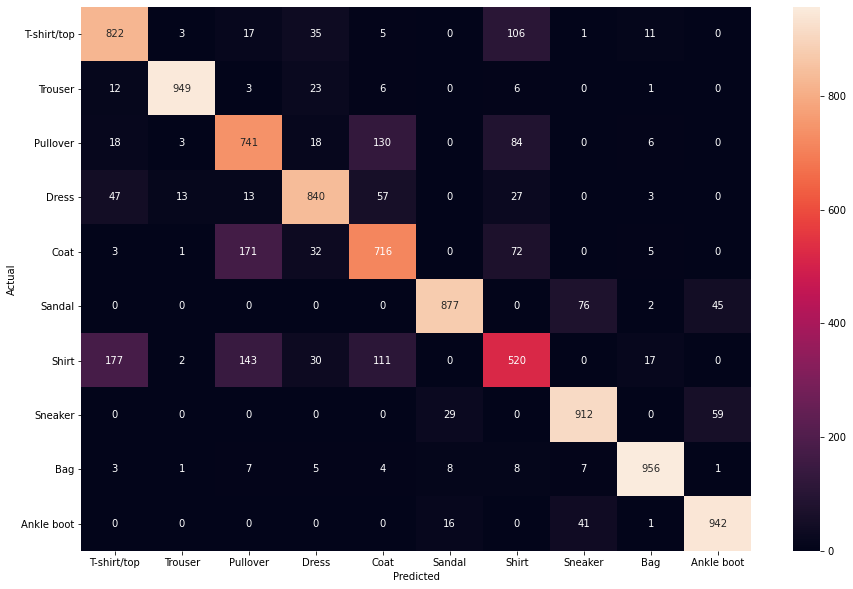

In [51]:
knn_f(x_pca75, x_pca75_test, 75)

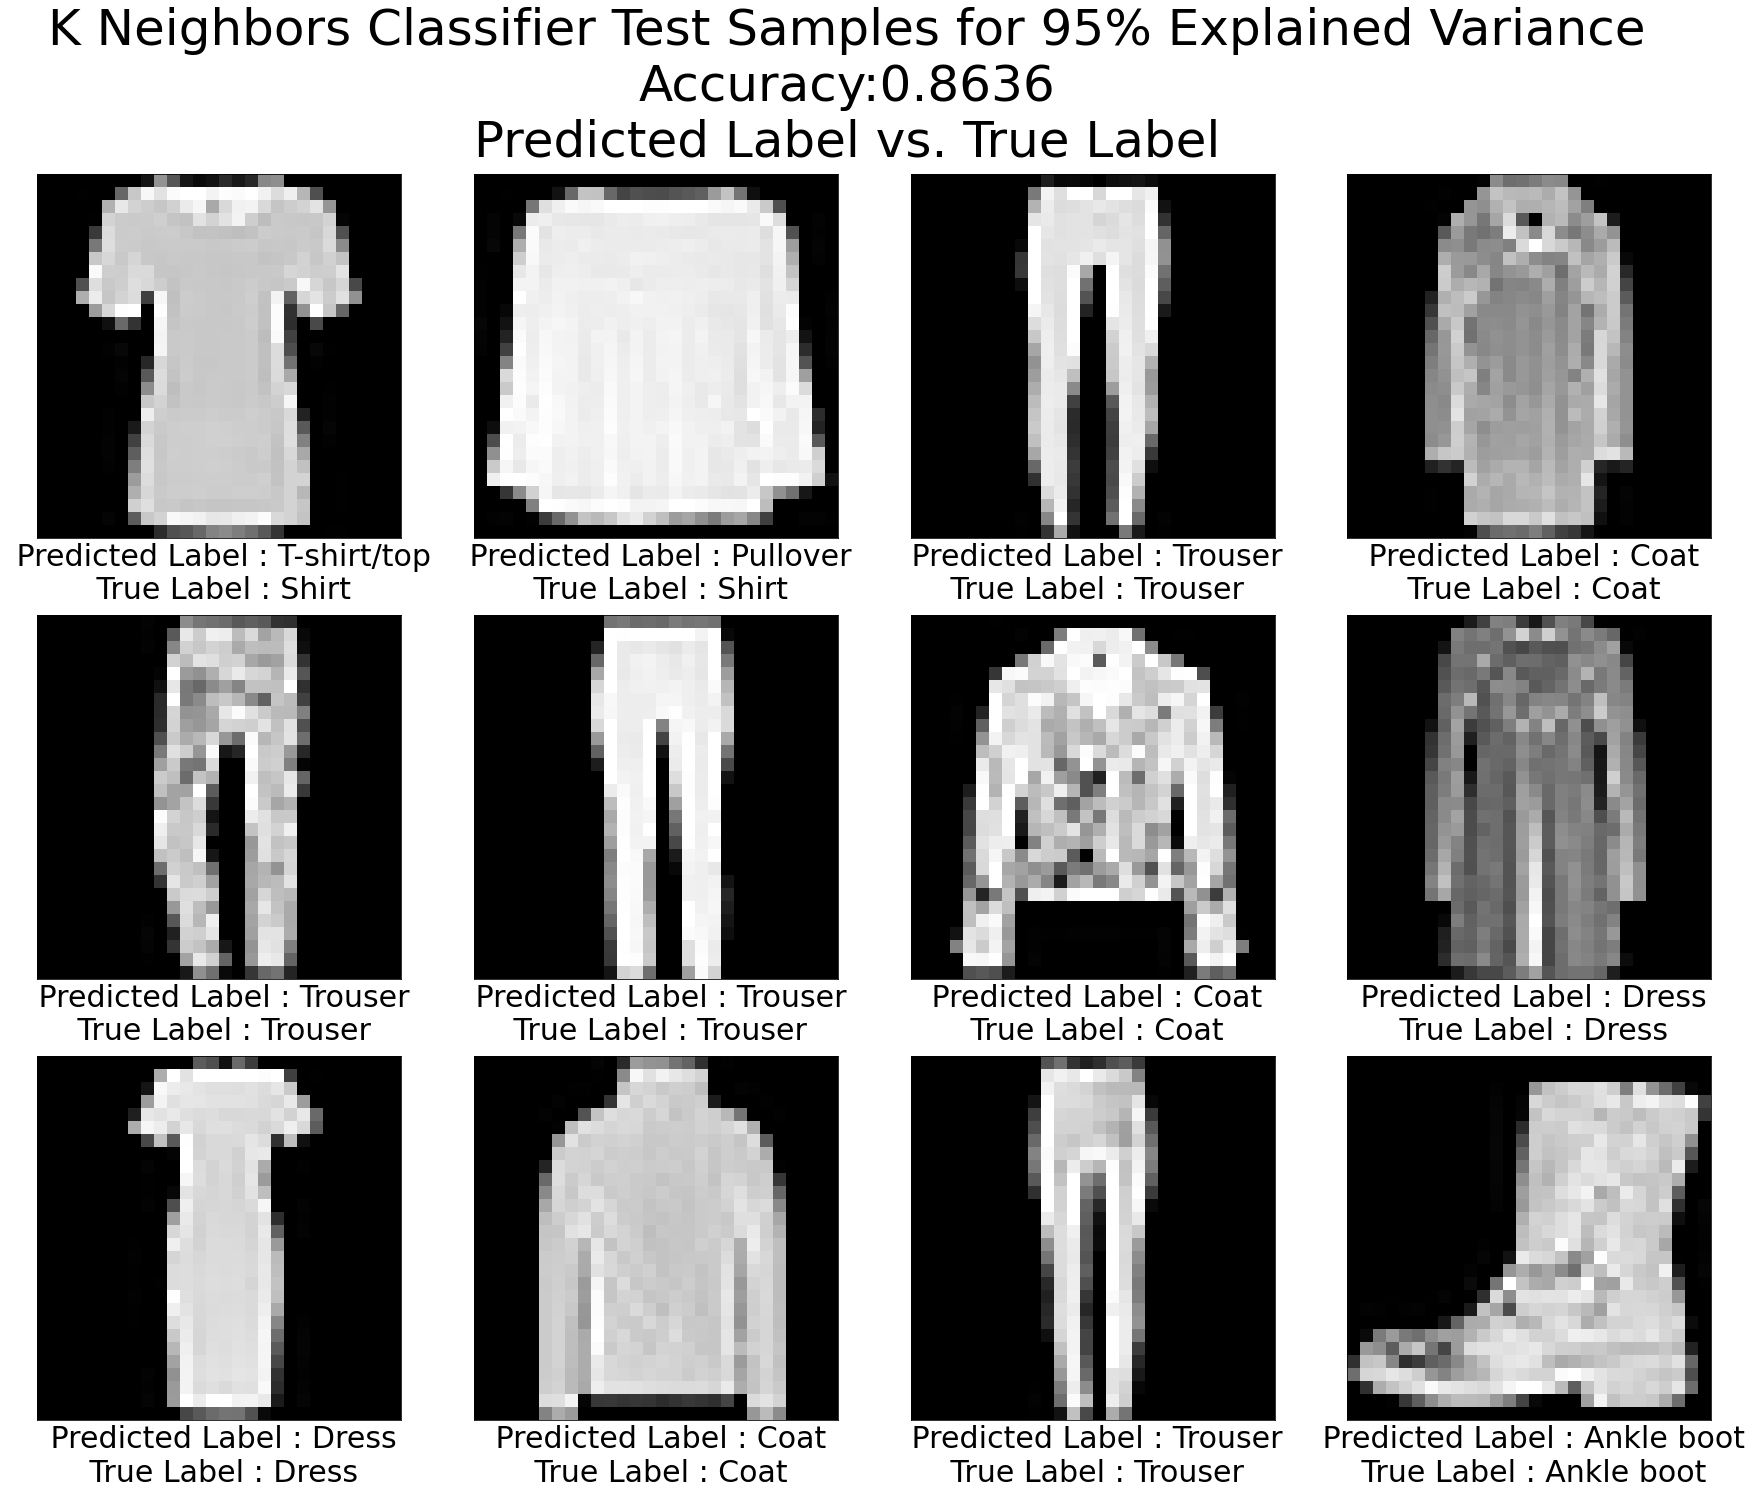

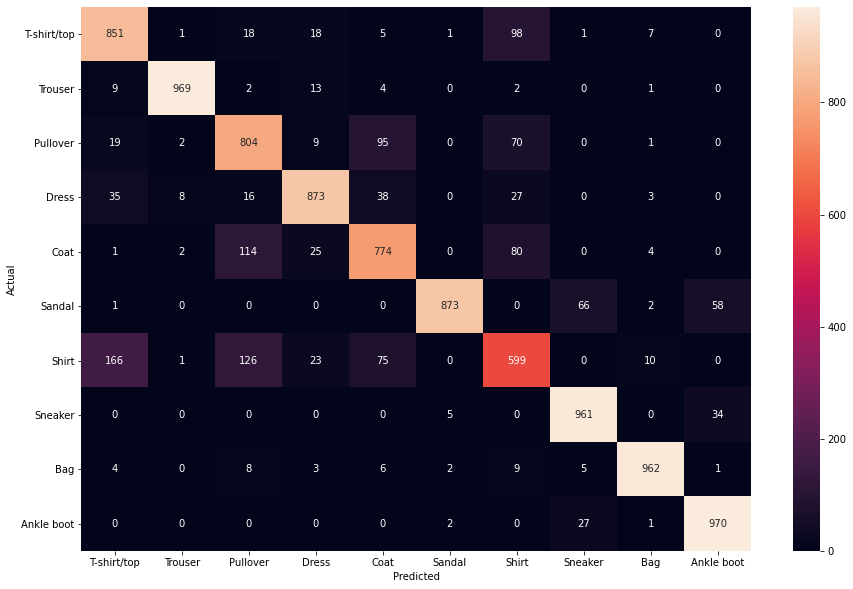

In [52]:
knn_f(x_pca95, x_pca95_test, 95)
knn_acc.append(accKNN100)

In [53]:
#Defining function for Decision Tree Classifier Method for automation
tree_acc = []

def tree_f(x_pca_x, x_pca_xtest, var):
    mytree=DecisionTreeClassifier(criterion="entropy",max_depth=10,splitter="best")
    mytree.fit(x_pca_x,y_train)
    decisionTreePred = mytree.predict(x_pca_xtest)
    accDecTree = accuracy_score(y_test,decisionTreePred)
    tree_acc.append(accDecTree)
    misDecTree = (y_test!=decisionTreePred).sum()
    f, axarr = plt.subplots(3,4, figsize=(30,23)) 
    a = 0
    for  i in range(3):
        for j in range(4):
            axarr[i][j].imshow(reshaped_X_test[values[a]])
            axarr[i][j].set_xticks([])
            axarr[i][j].set_yticks([])
            axarr[i][j].set_xlabel(f" Predicted Label : {labels[decisionTreePred[values[a]]]}\n True Label : {labels[y_test[values[a]]]}", fontsize=30)
            a = a + 1
    plt.suptitle(f"Decision Tree Classifier Test Samples for {var}% Explained Variance\nAccuracy:{accDecTree}\nPredicted Label vs. True Label", fontsize=50)
    plt.show()
    conf_matrix(decisionTreePred)


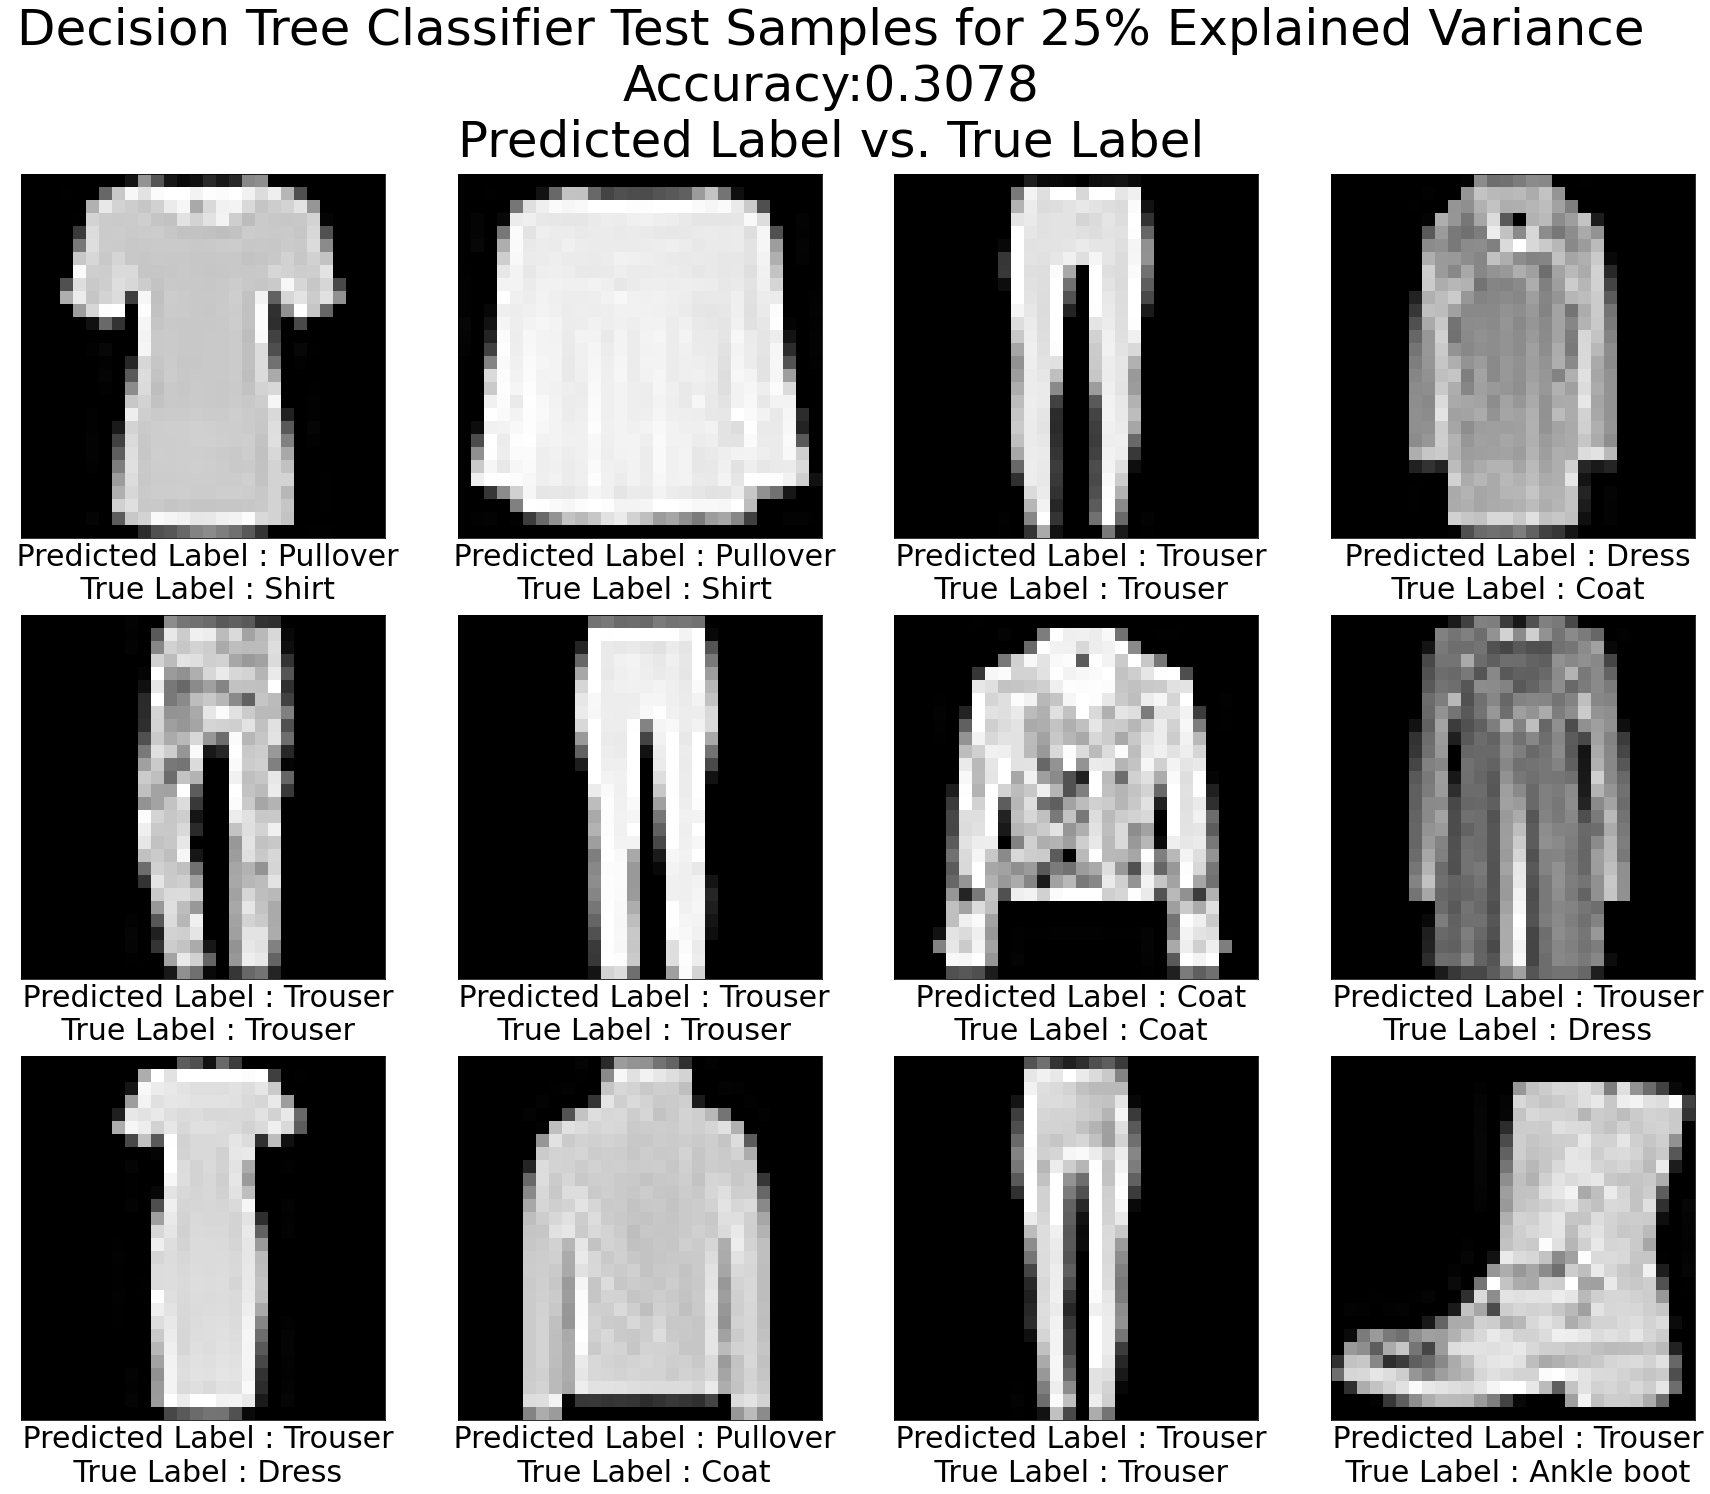

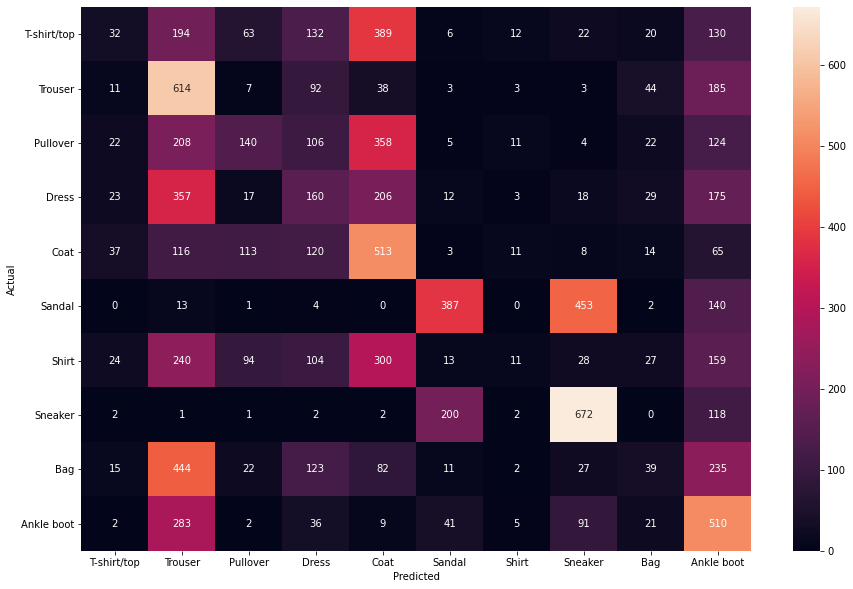

In [54]:
#Running Decision Tree Classifier Method for each reduced train and test data

tree_f(x_pca25, x_pca25_test, 25)

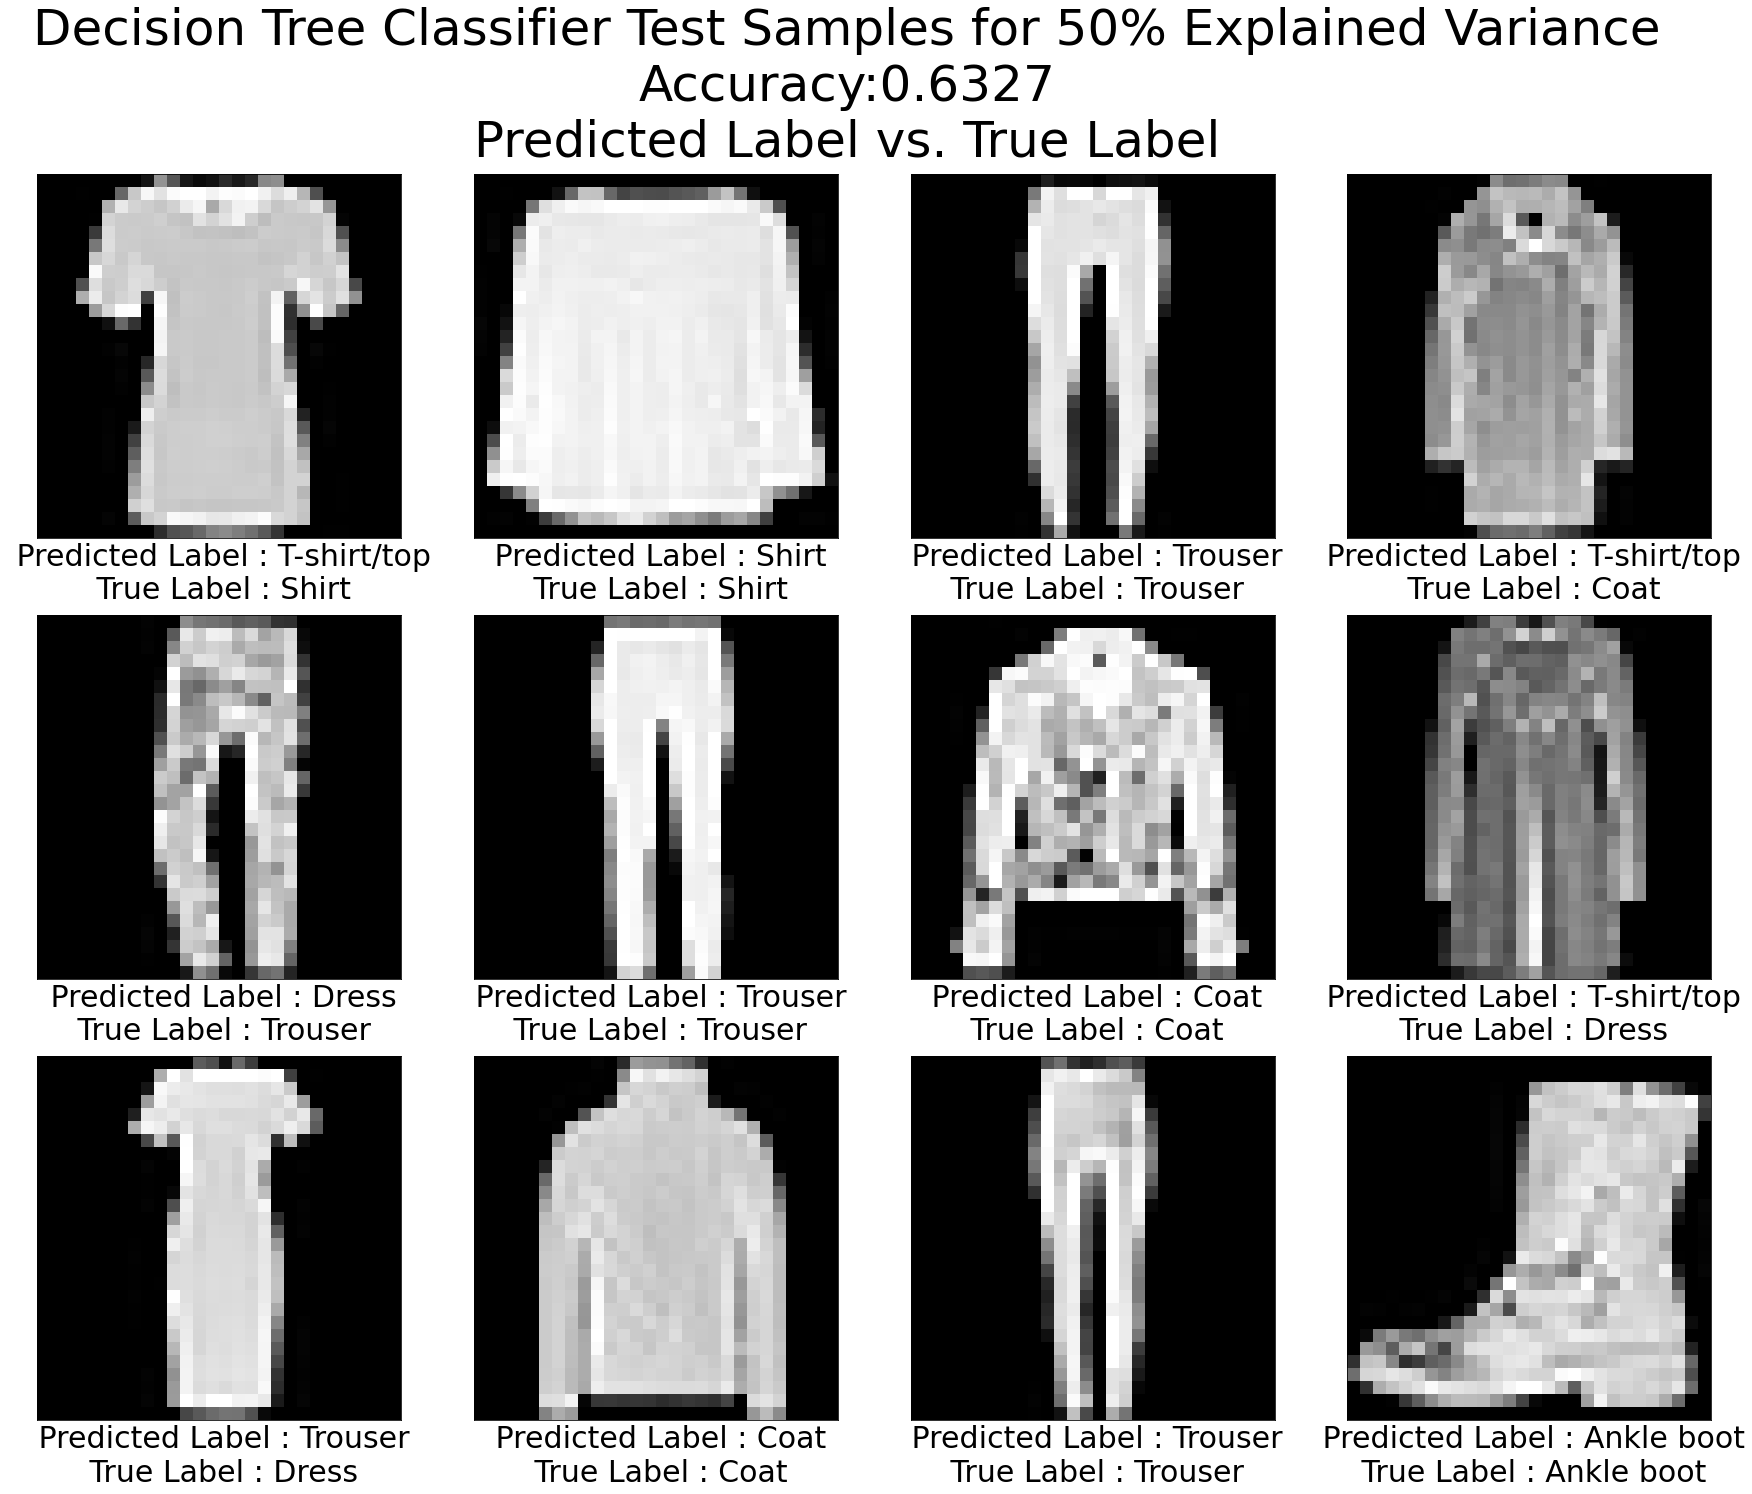

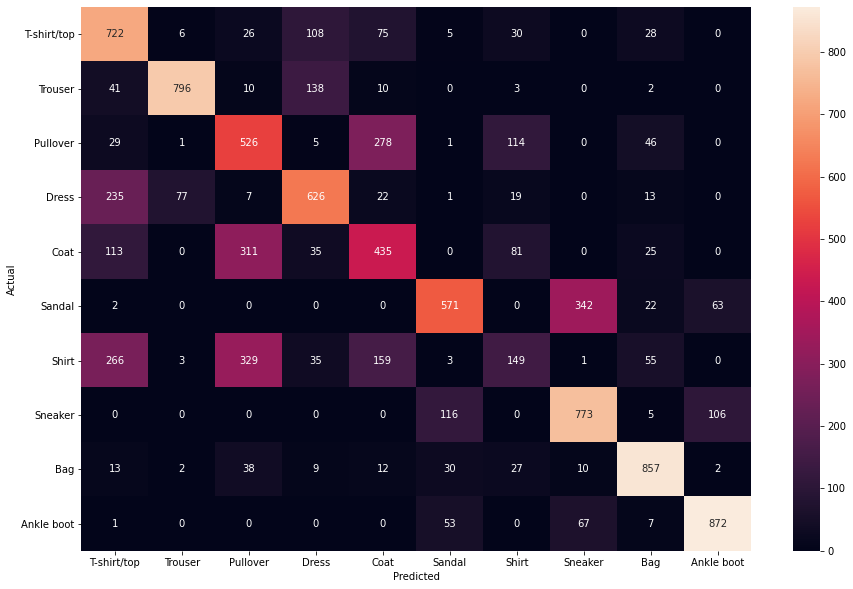

In [55]:
tree_f(x_pca50, x_pca50_test, 50)

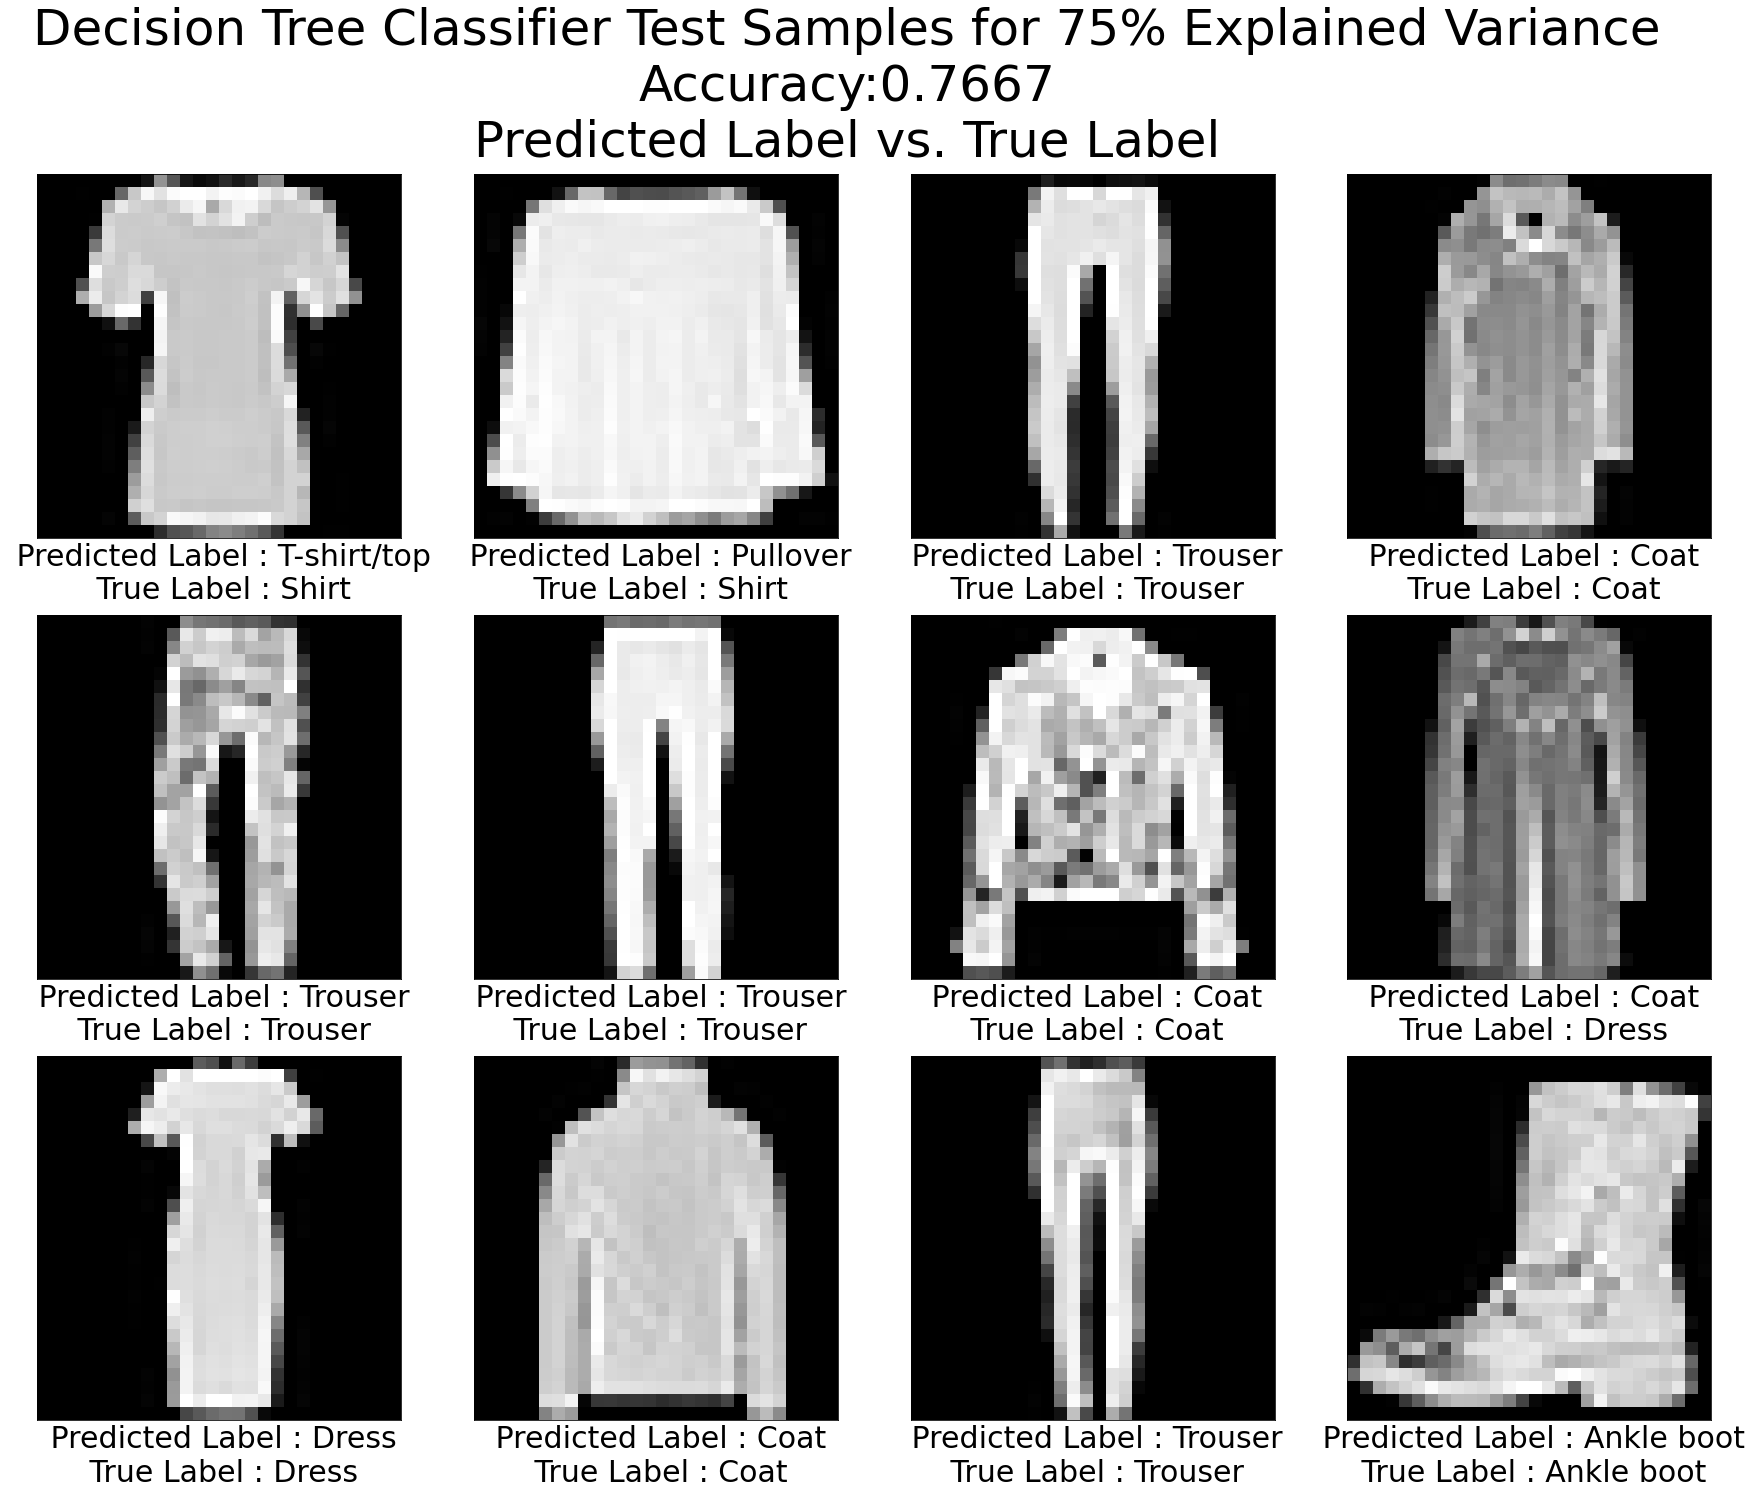

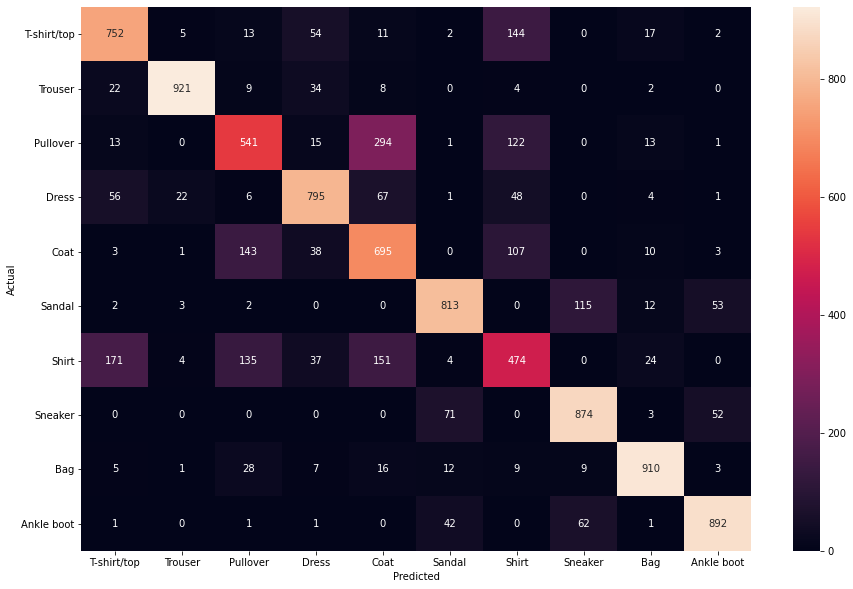

In [56]:
tree_f(x_pca75, x_pca75_test, 75)

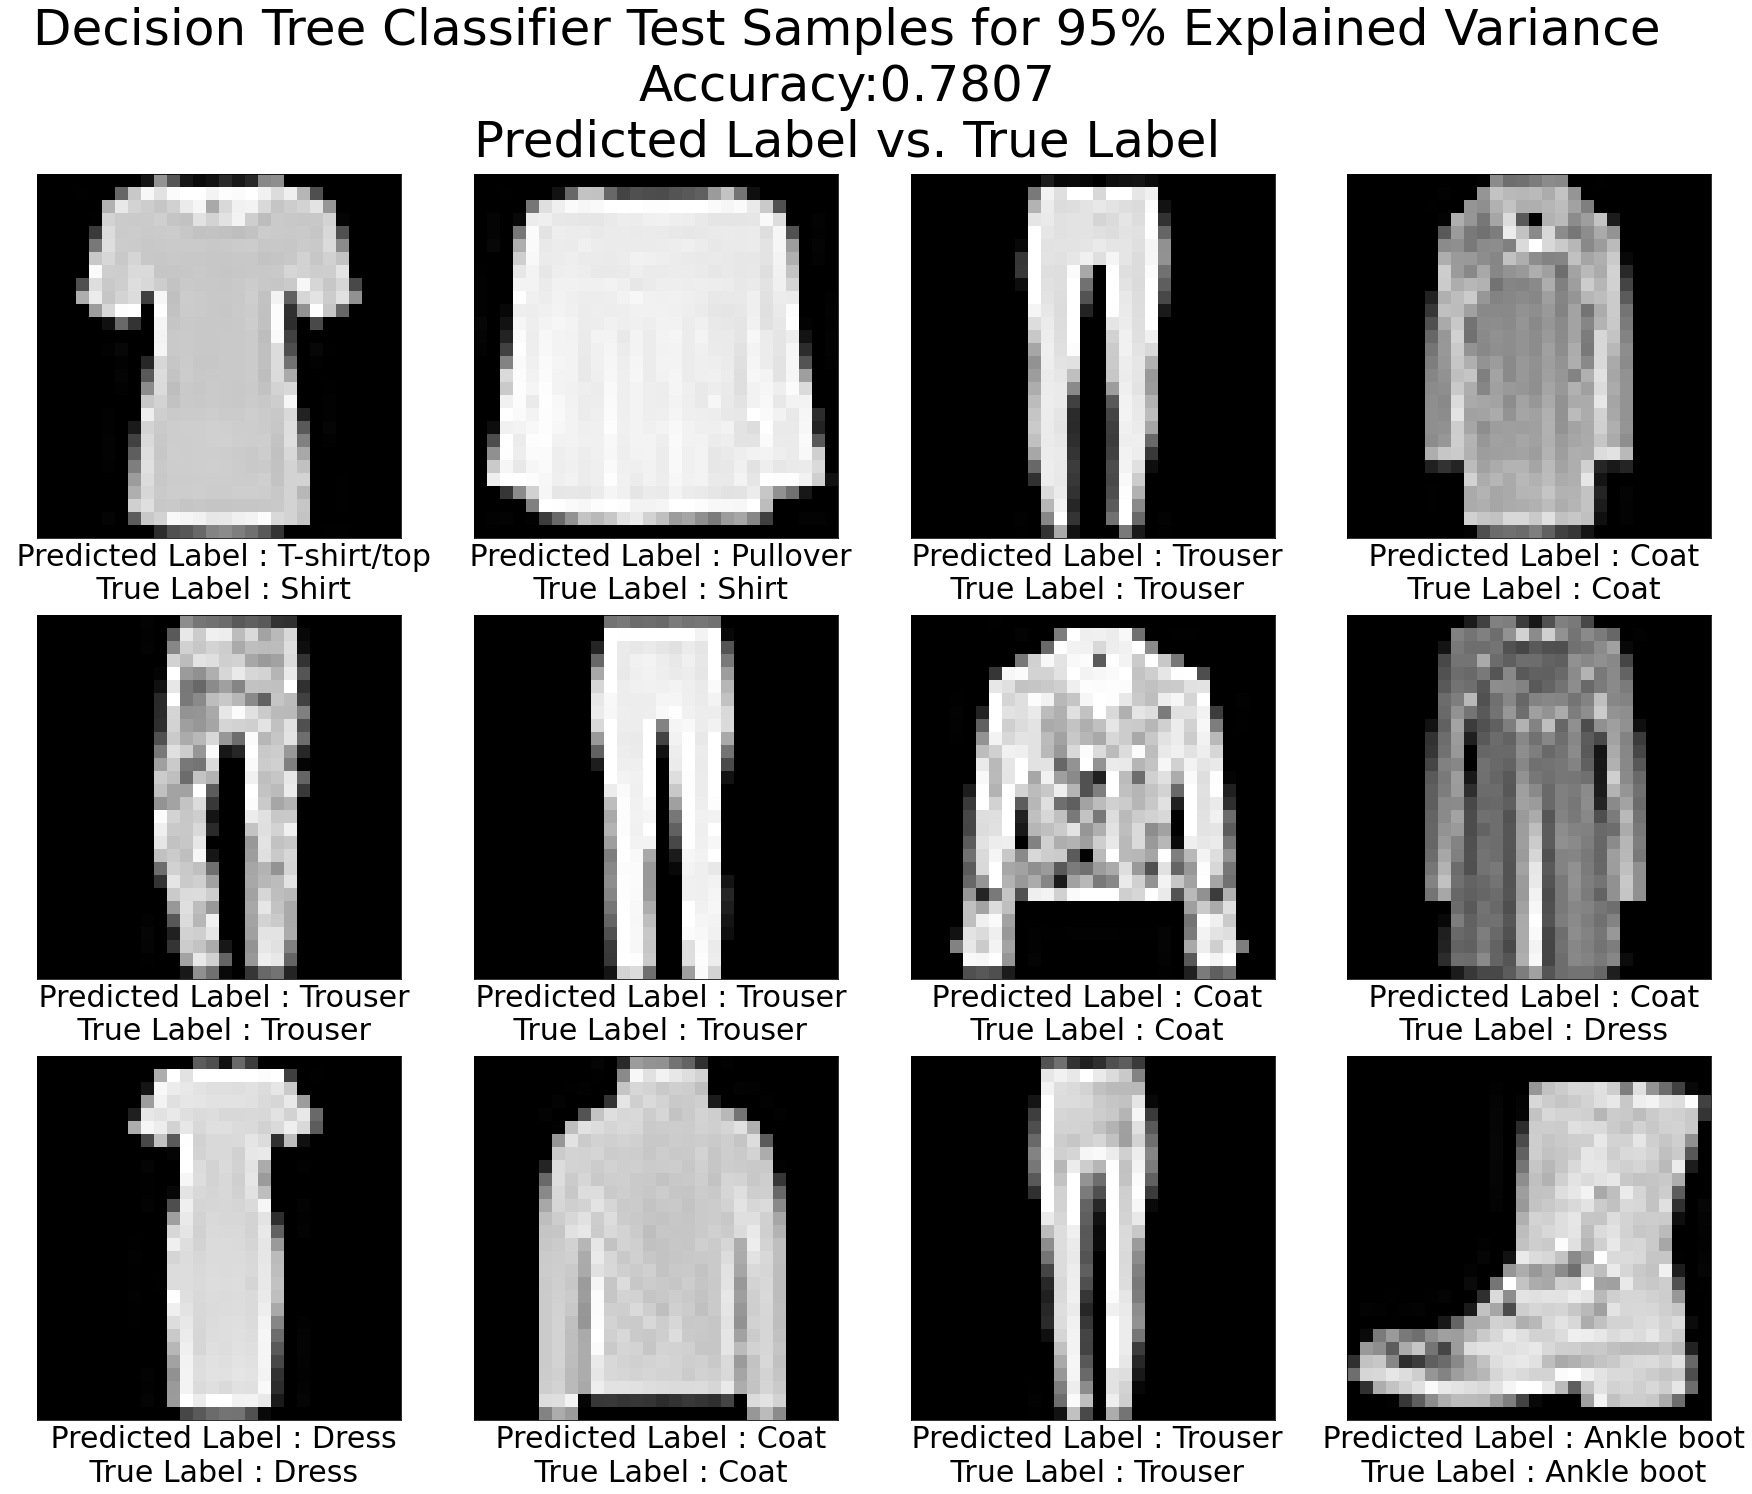

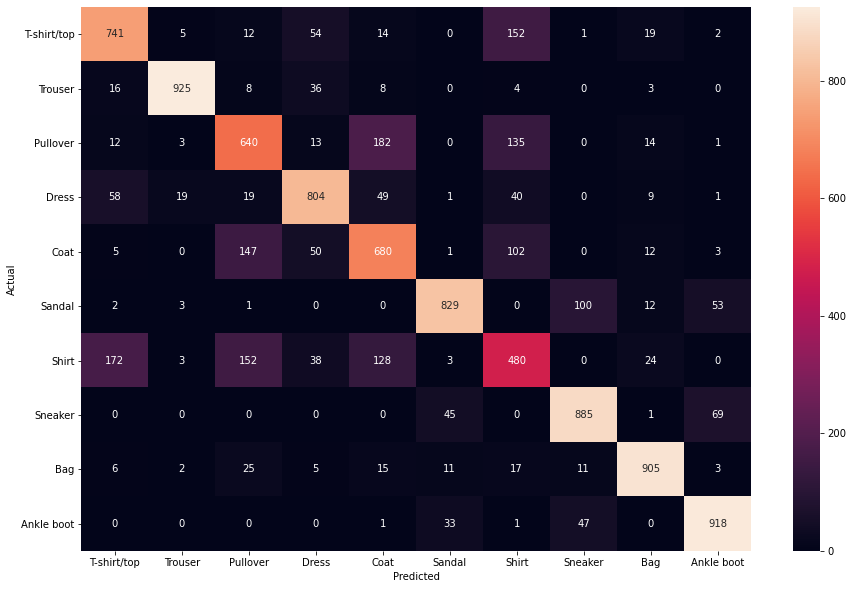

In [57]:
tree_f(x_pca95, x_pca95_test, 95)
tree_acc.append(accDecTree100)

In [58]:
#Defining function for Perceptron Method for automation
perc_acc = []
def perc_f(x_pca_x, x_pca_xtest, var):
    mypercept=Perceptron(max_iter=50, eta0=0.01, random_state=0)
    mypercept.fit(x_pca_x, y_train)
    perceptronPred=mypercept.predict(x_pca_xtest)
    accPercept = accuracy_score(y_test,perceptronPred)
    perc_acc.append(accPercept)
    misPercept = (y_test!=perceptronPred).sum()
    plt.gray()
    f, axarr = plt.subplots(3,4, figsize=(30,23)) 
    a = 0
    for  i in range(3):
        for j in range(4):
            axarr[i][j].imshow(reshaped_X_test[values[a]])
            axarr[i][j].set_xticks([])
            axarr[i][j].set_yticks([])
            axarr[i][j].set_xlabel(f" Predicted Label : {labels[perceptronPred[values[a]]]}\n True Label : {labels[y_test[values[a]]]}", fontsize=30)
            a = a + 1
    
    plt.suptitle(f"Perceptron Test Samples for {var}% Explained Variance\nAccuracy:{accPercept}\nPredicted Label vs. True Label", fontsize=50)
    plt.show()
    conf_matrix(perceptronPred)


<Figure size 432x288 with 0 Axes>

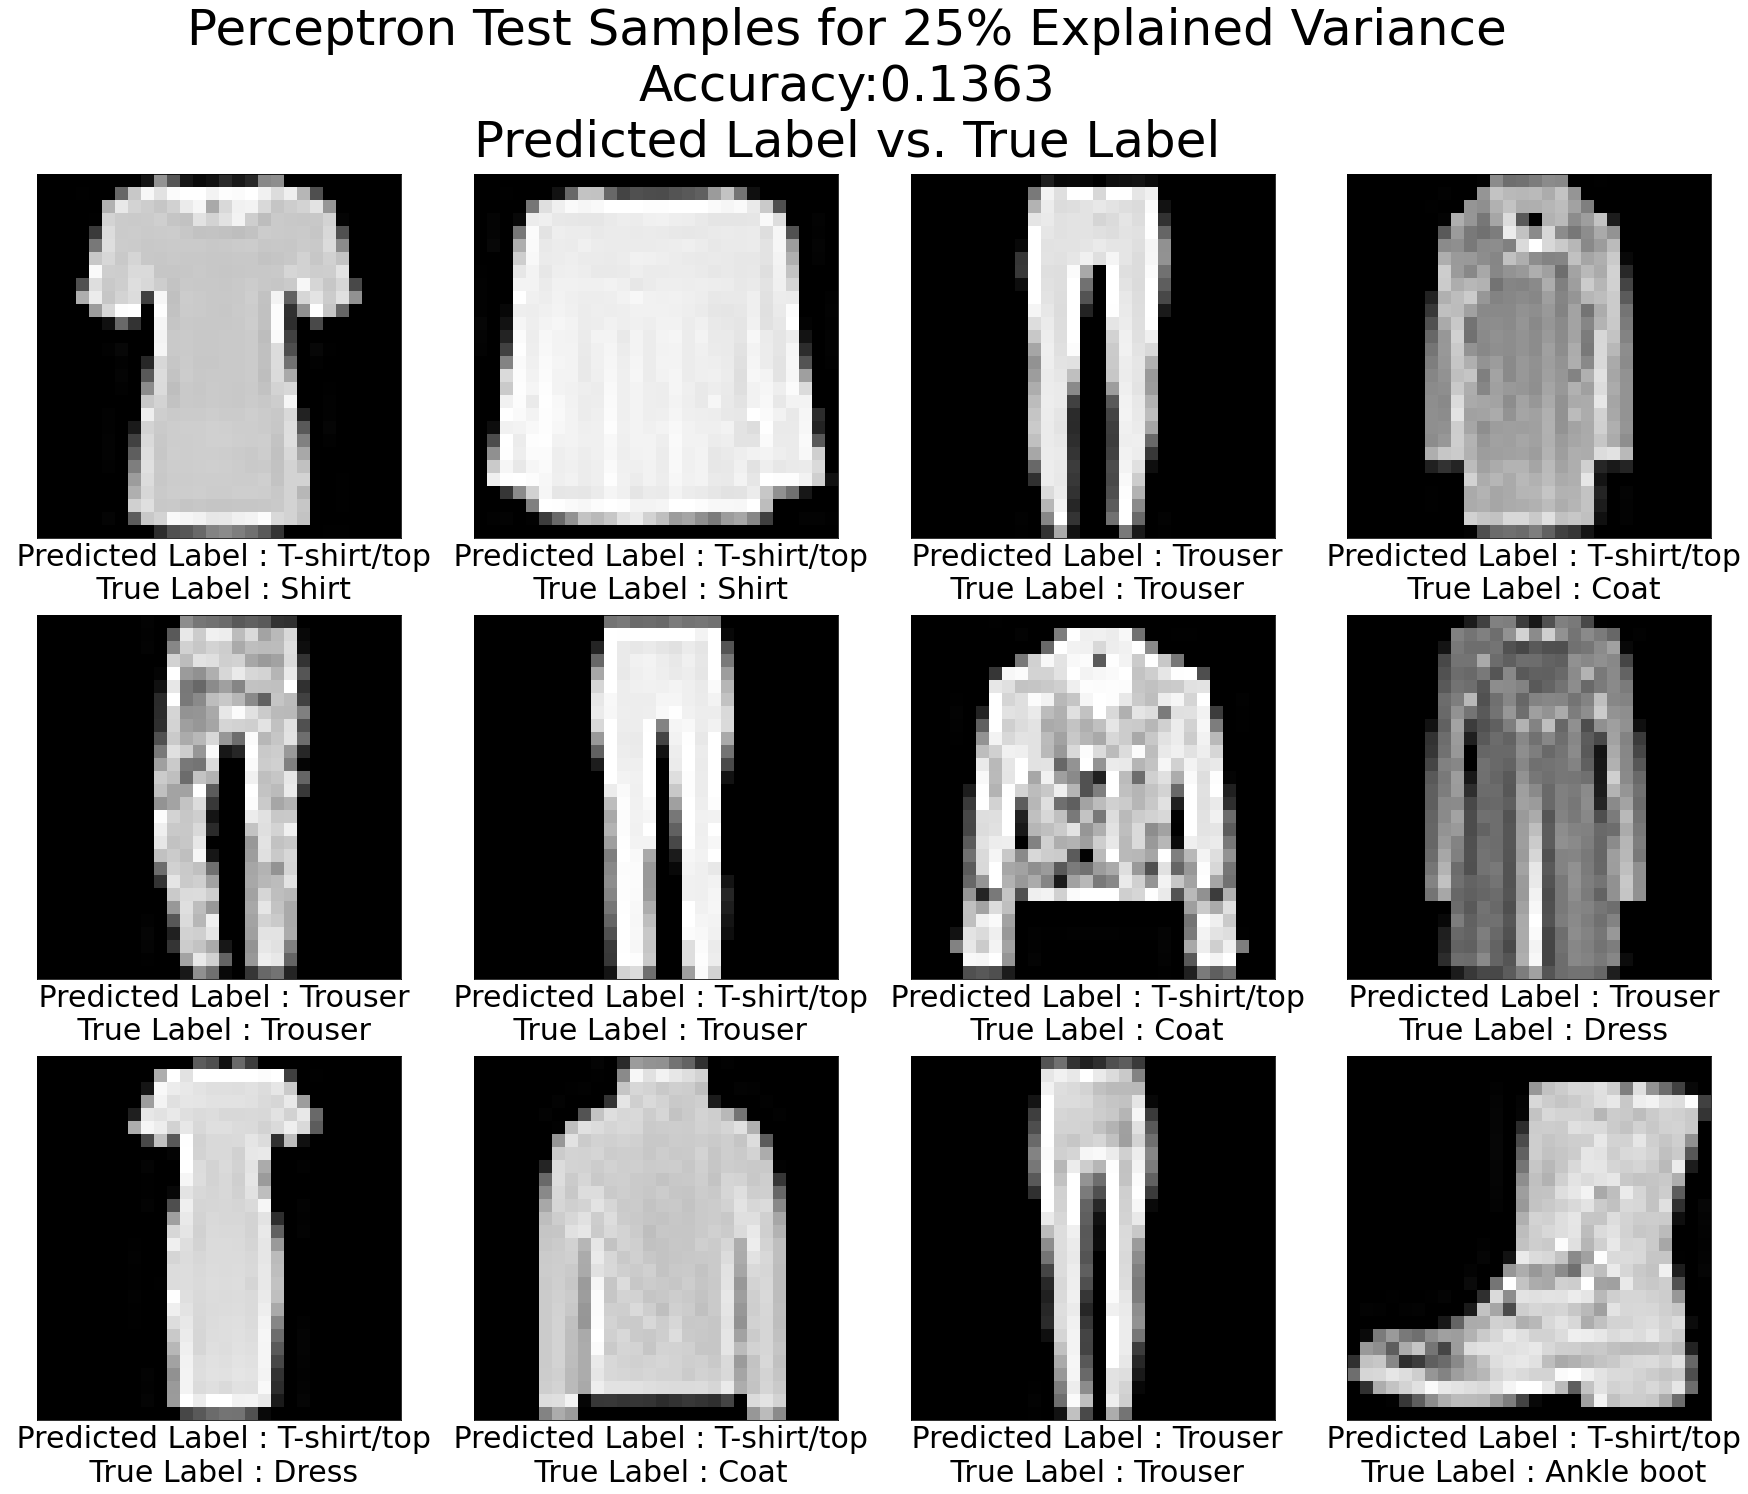

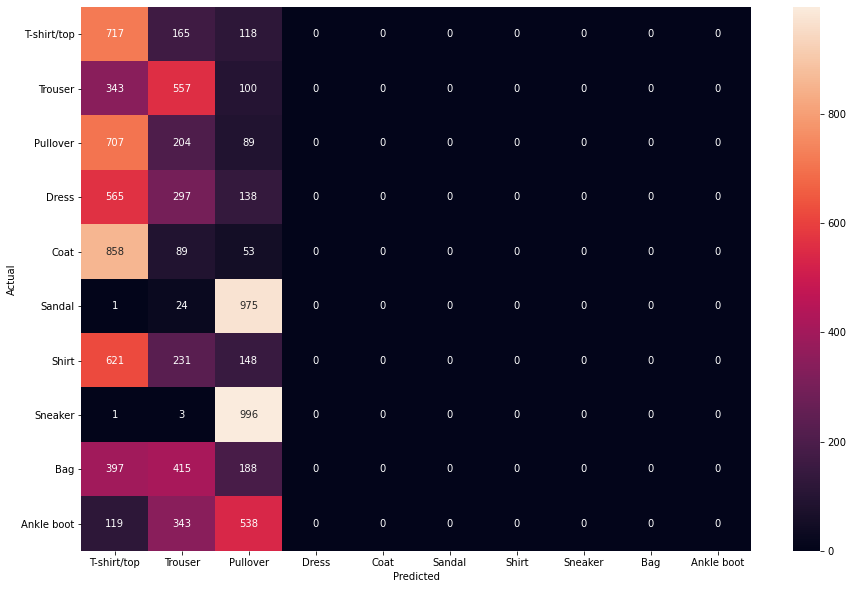

In [59]:
#Running Perceptron Method for each reduced train and test data

perc_f(x_pca25, x_pca25_test, 25)

<Figure size 432x288 with 0 Axes>

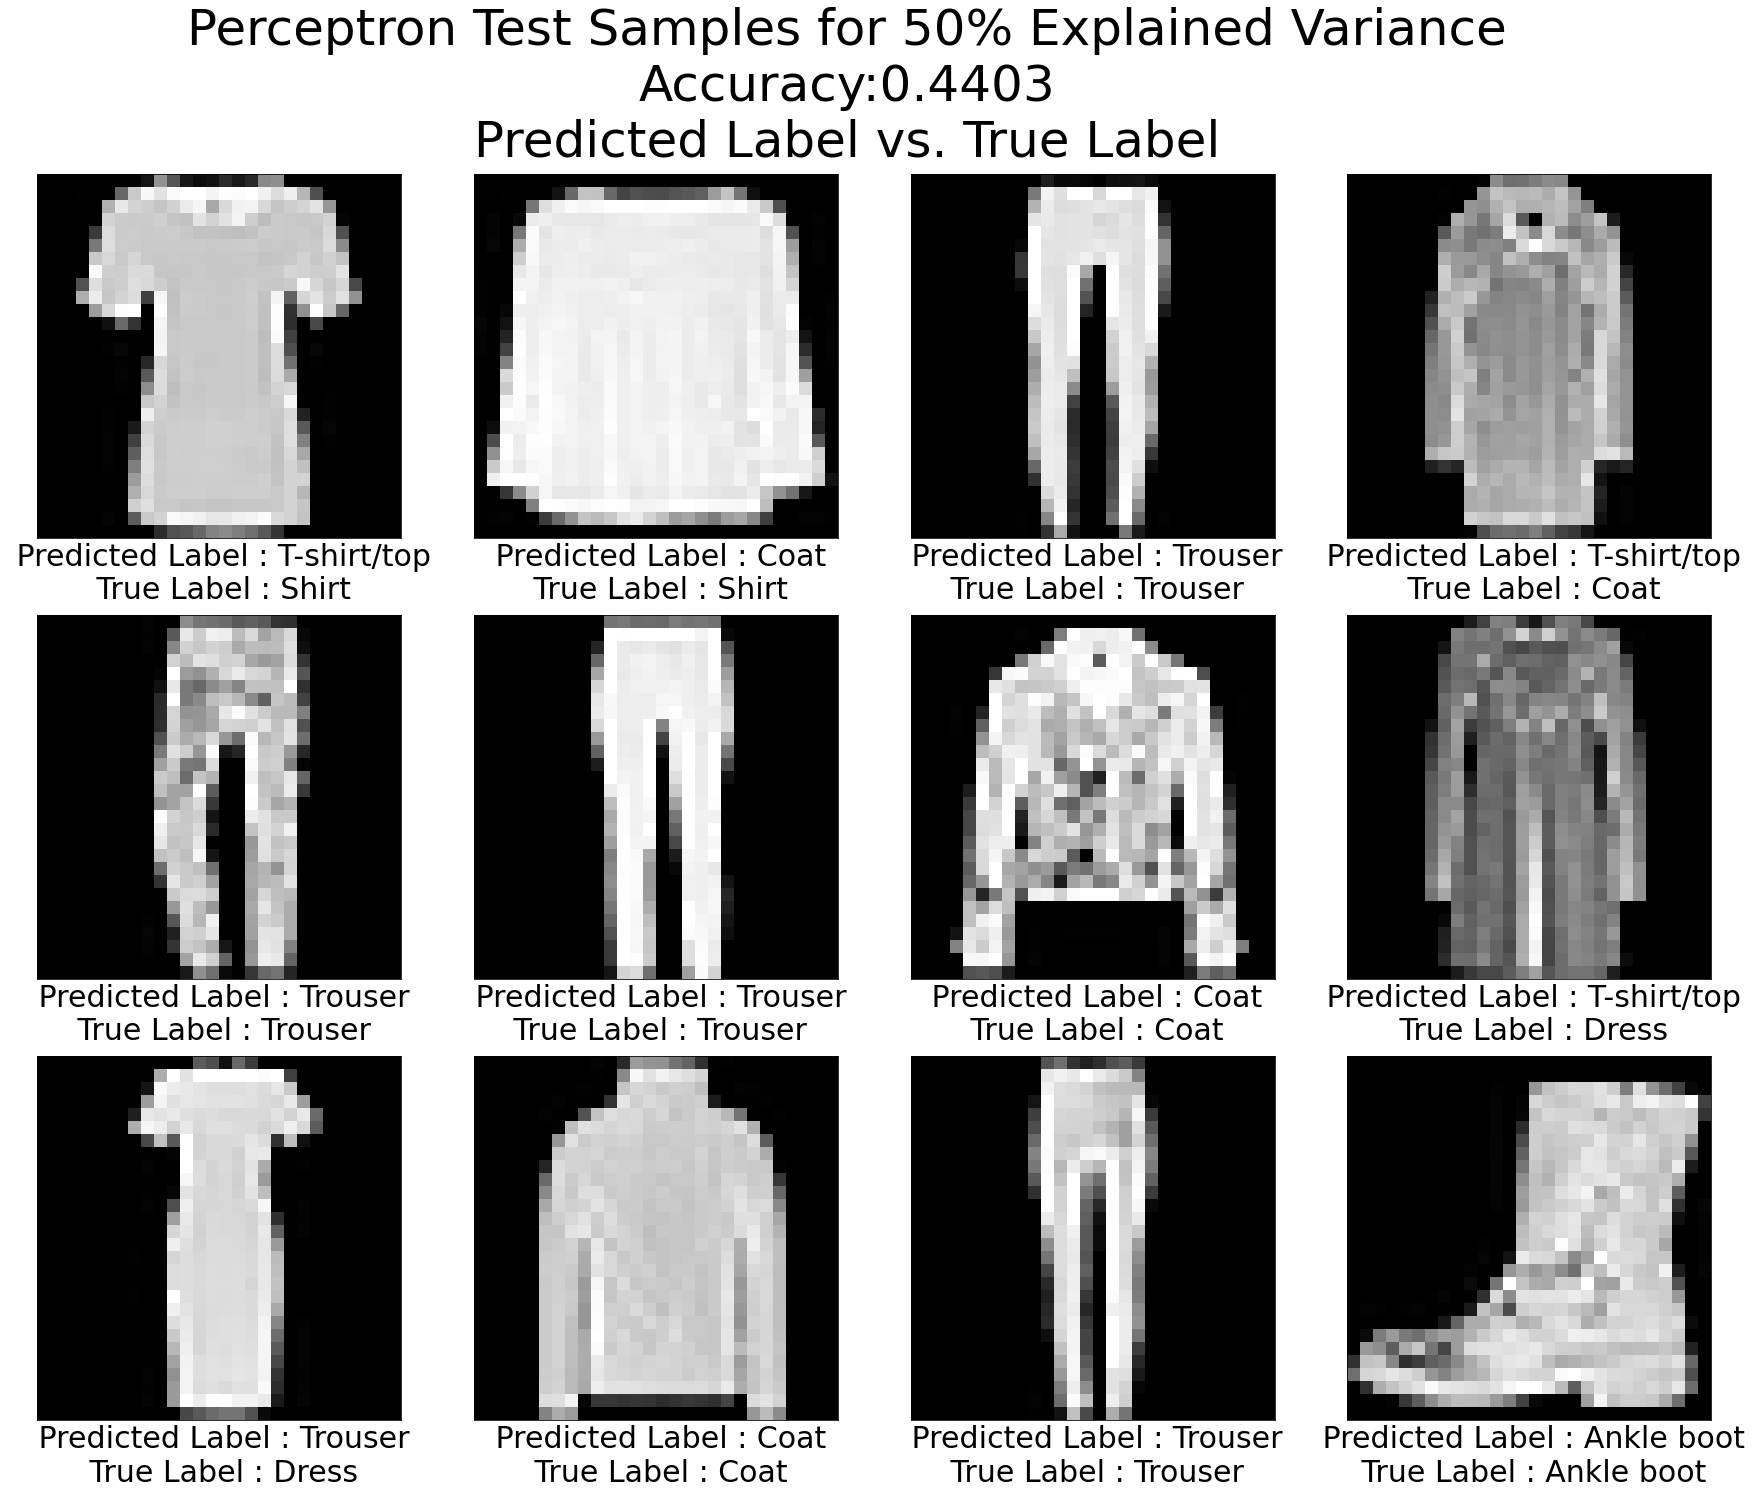

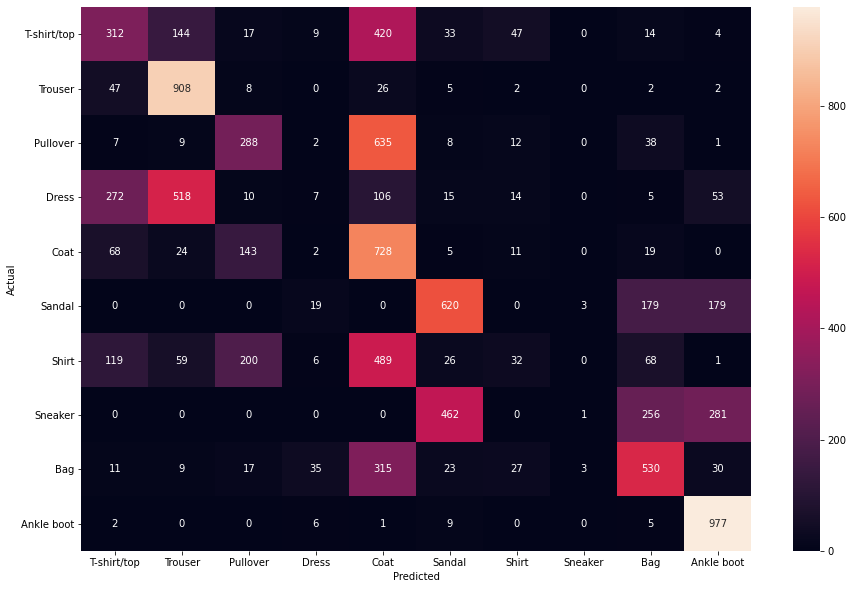

In [60]:
perc_f(x_pca50, x_pca50_test, 50)

<Figure size 432x288 with 0 Axes>

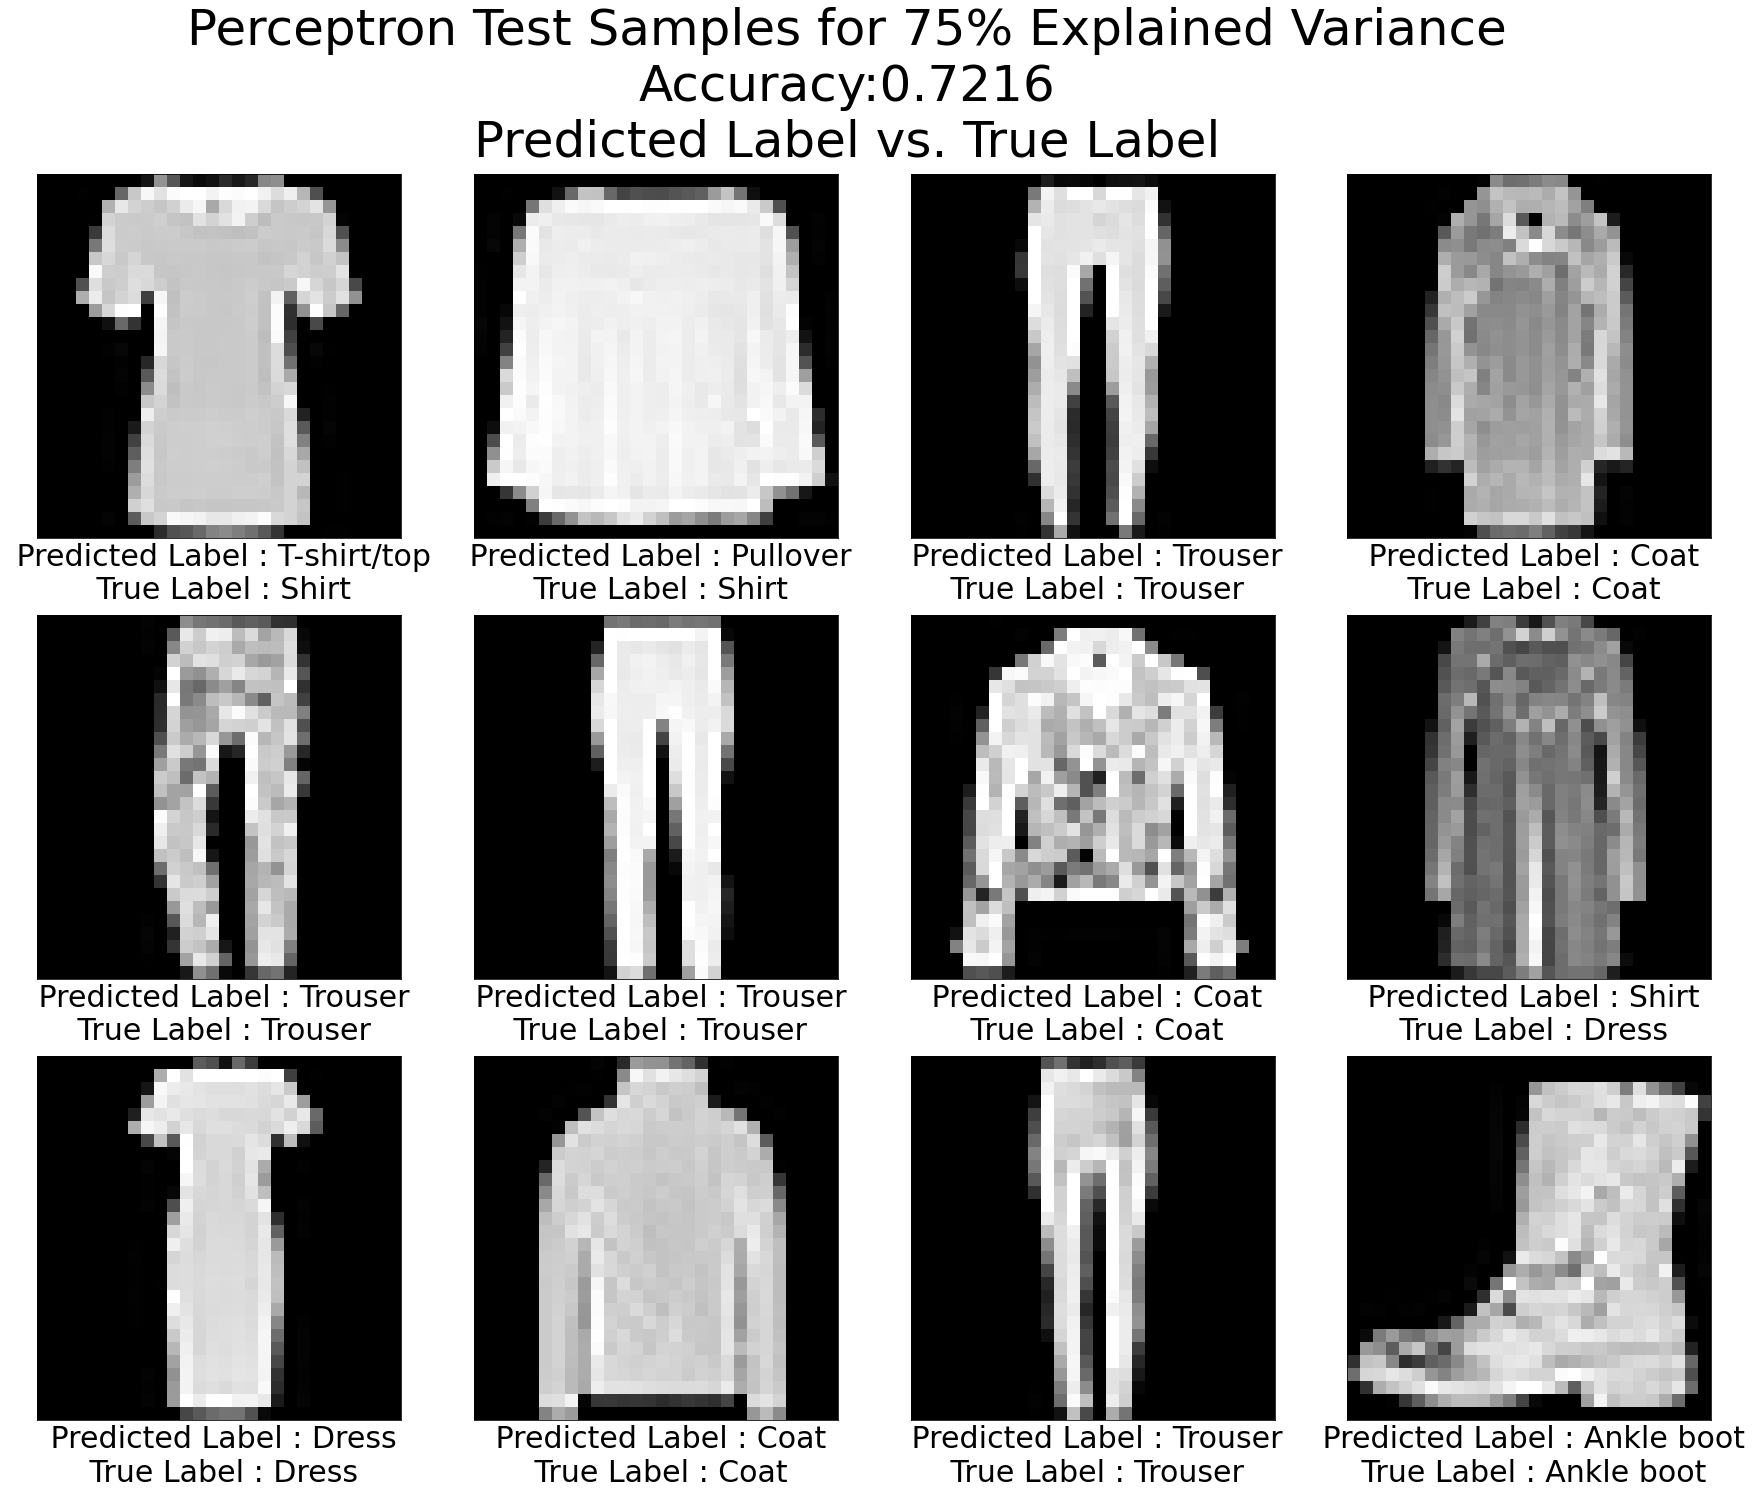

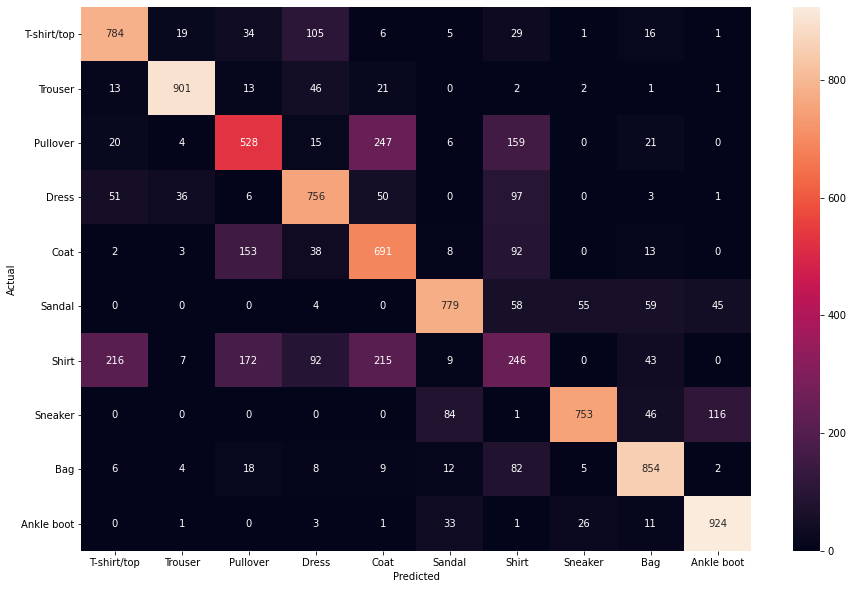

In [61]:
perc_f(x_pca75, x_pca75_test, 75)

<Figure size 432x288 with 0 Axes>

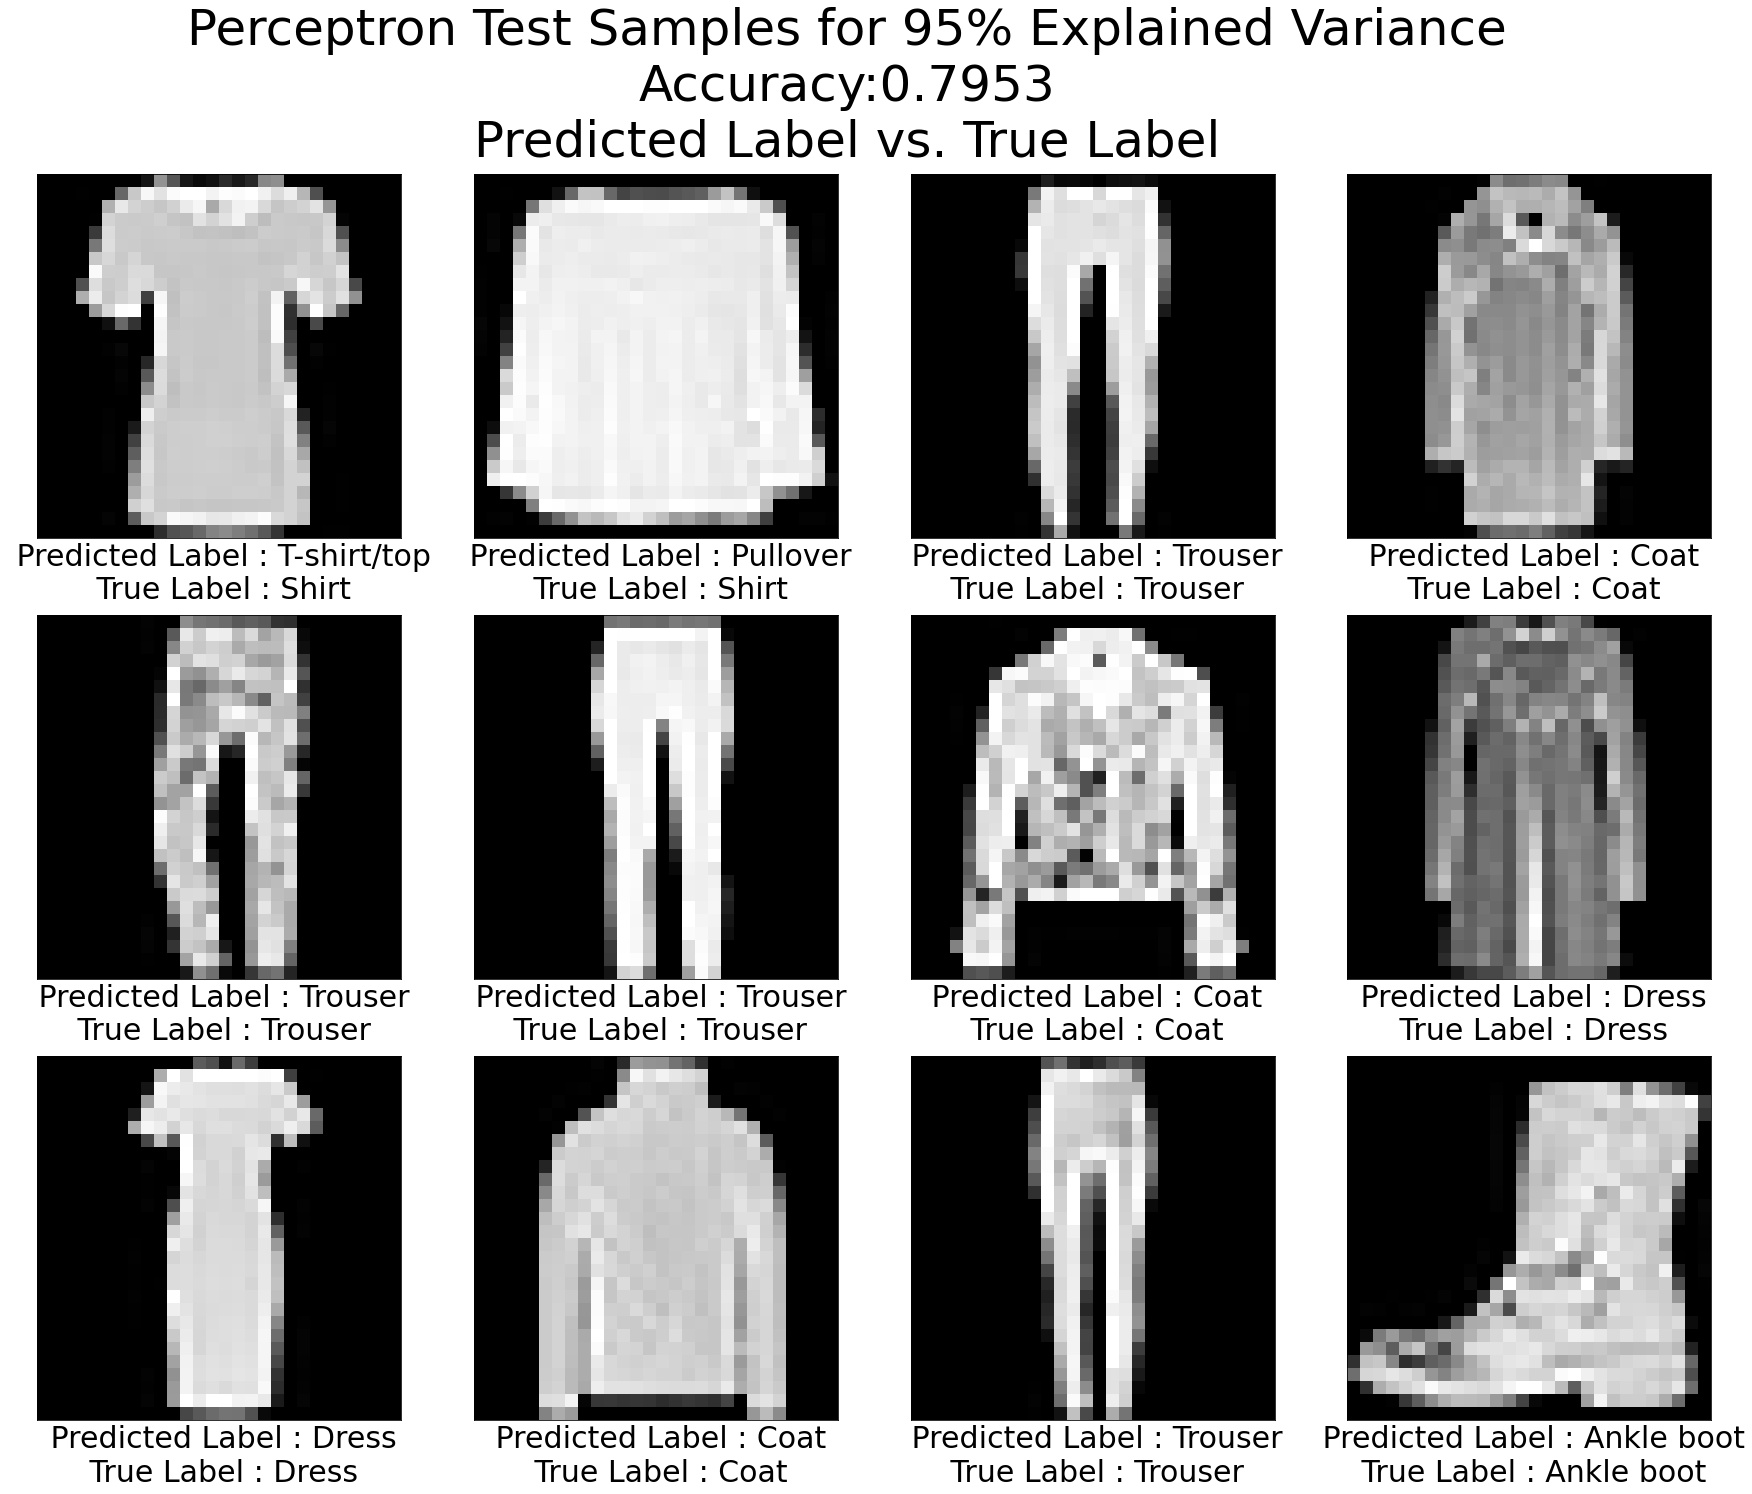

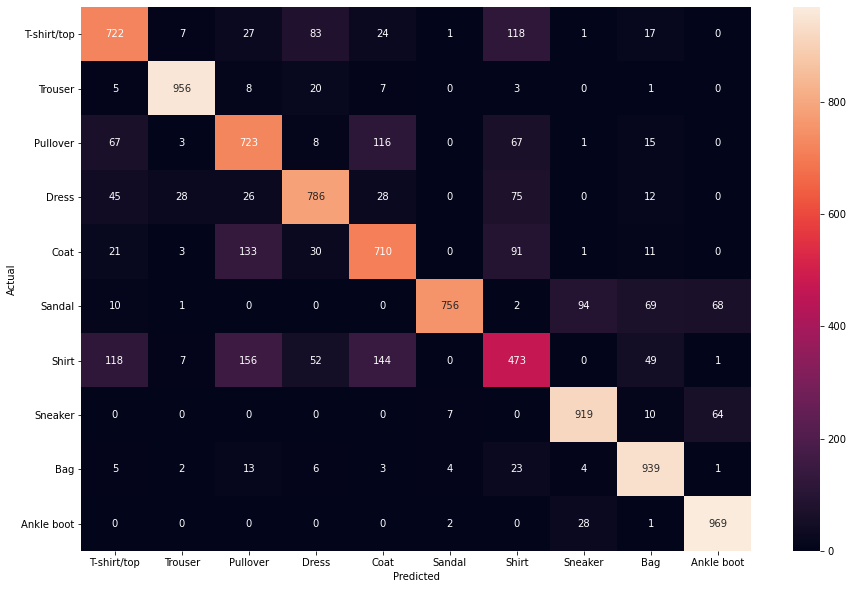

In [62]:
perc_f(x_pca95, x_pca95_test, 95)
perc_acc.append(accPercept100)

In [63]:
#Defining function for Random Forest Classifier for automation
forest_acc = []
def forest_f(x_pca_x, x_pca_xtest, var):
    myforest=RandomForestClassifier(criterion='entropy', random_state=1)
    myforest.fit(x_pca_x,y_train)
    forestPred=myforest.predict(x_pca_xtest)
    accForest = accuracy_score(y_test, forestPred)
    forest_acc.append(accForest)
    plt.gray()
    f, axarr = plt.subplots(3,4, figsize=(30,23)) 
    a = 0
    for  i in range(3):
        for j in range(4):
            axarr[i][j].imshow(reshaped_X_test[values[a]])
            axarr[i][j].set_xticks([])
            axarr[i][j].set_yticks([])
            axarr[i][j].set_xlabel(f" Predicted Label : {labels[forestPred[values[a]]]}\n True Label : {labels[y_test[values[a]]]}", fontsize=30)
            a = a + 1
    
    plt.suptitle(f"Random Forest Classifier Test Samples for {var}% Explained Variance\nAccuracy:{accForest}\nPredicted Label vs. True Label", fontsize=50)
    plt.show()
    conf_matrix(forestPred)

<Figure size 432x288 with 0 Axes>

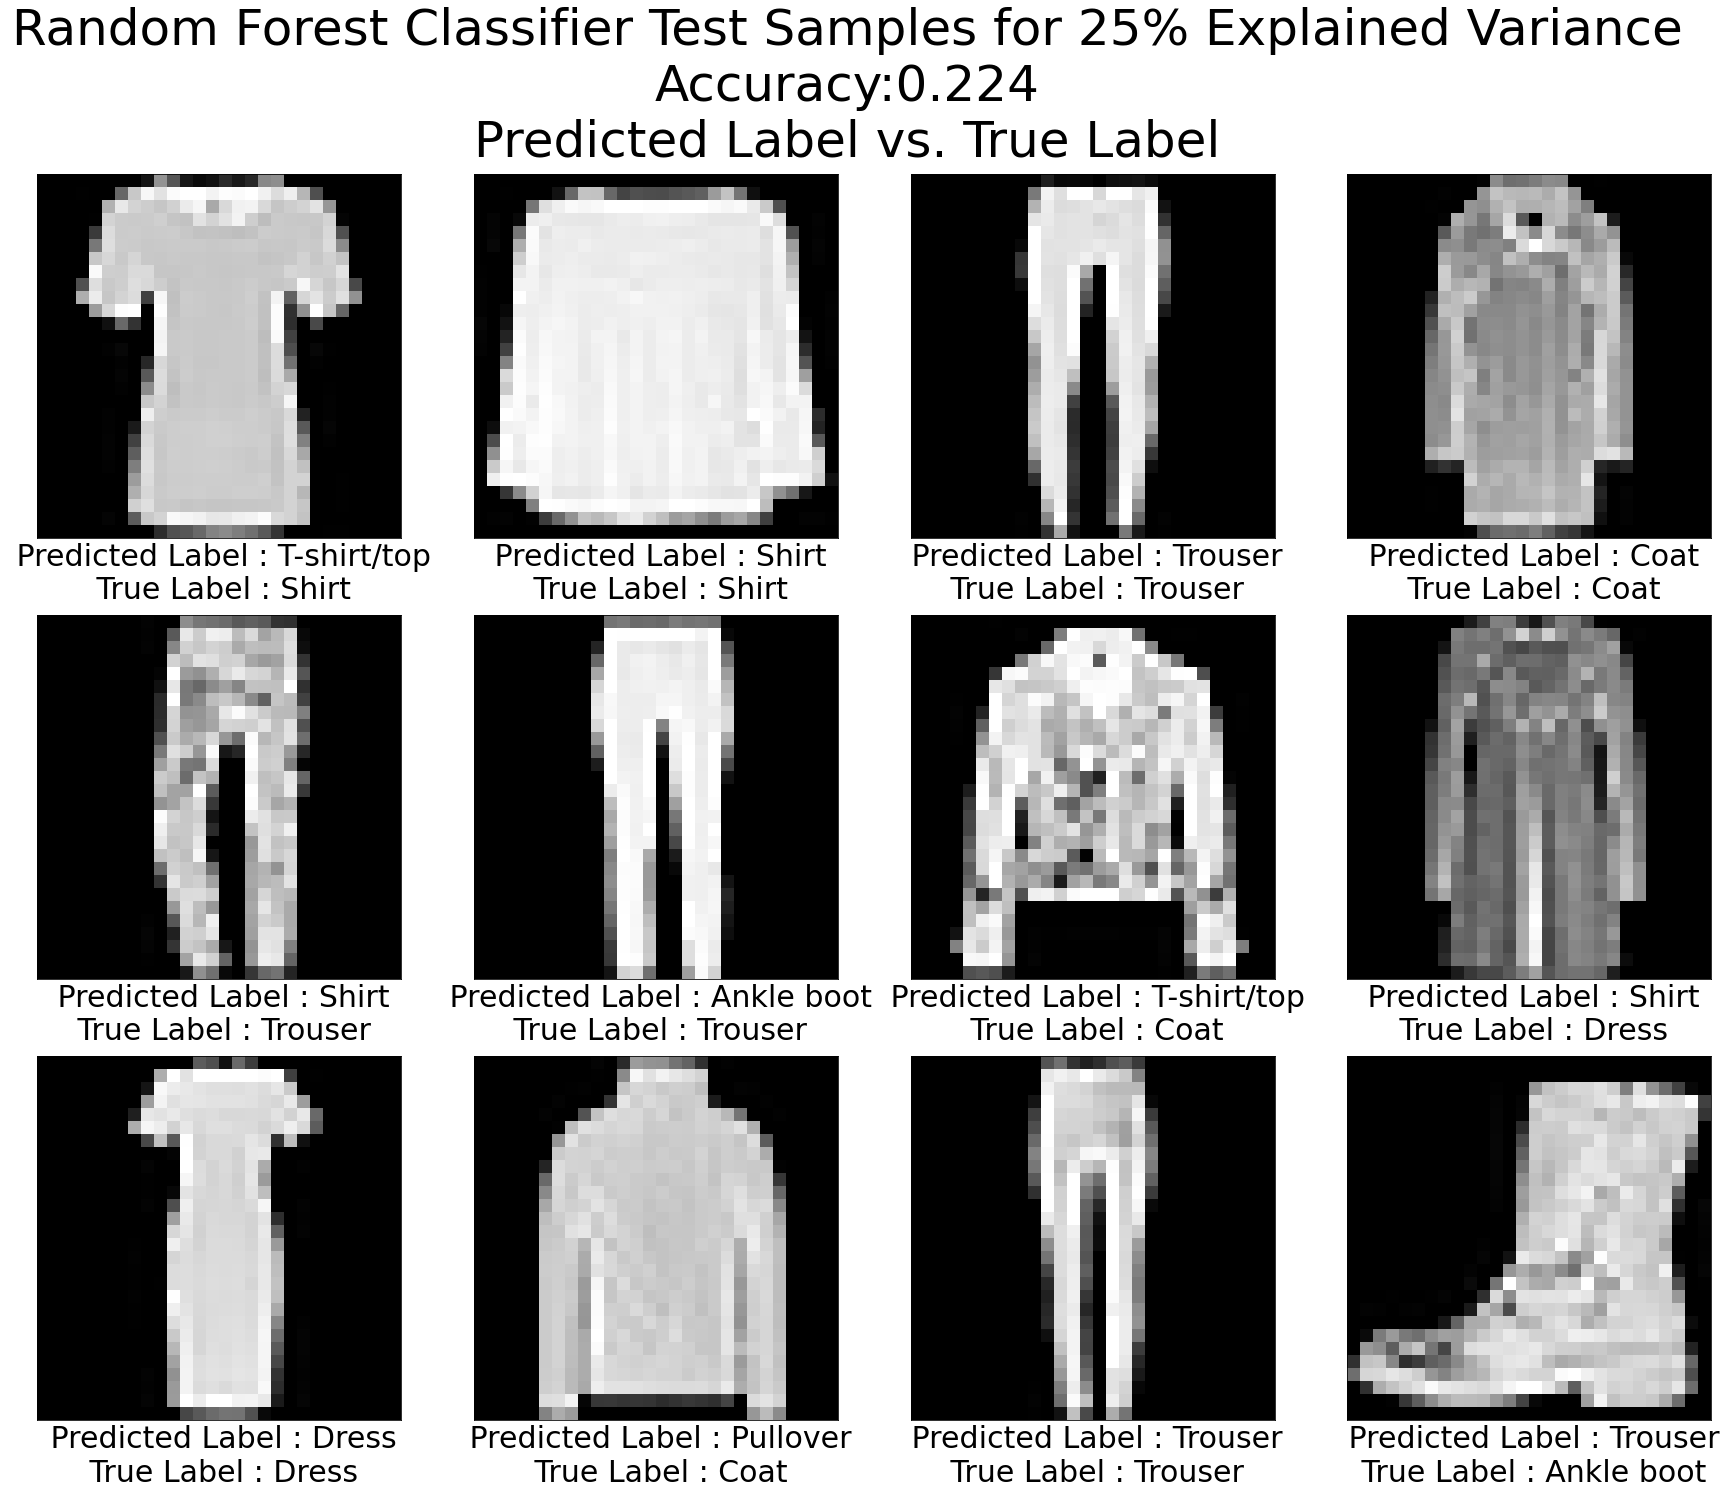

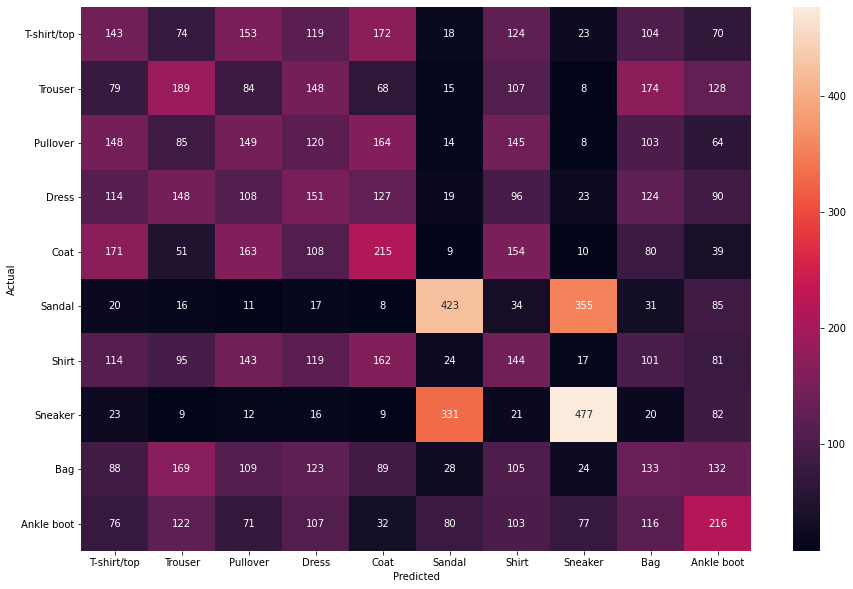

In [64]:
#Running Random Forest Classifier for each reduced train and test data
forest_f(x_pca25, x_pca25_test, 25)

<Figure size 432x288 with 0 Axes>

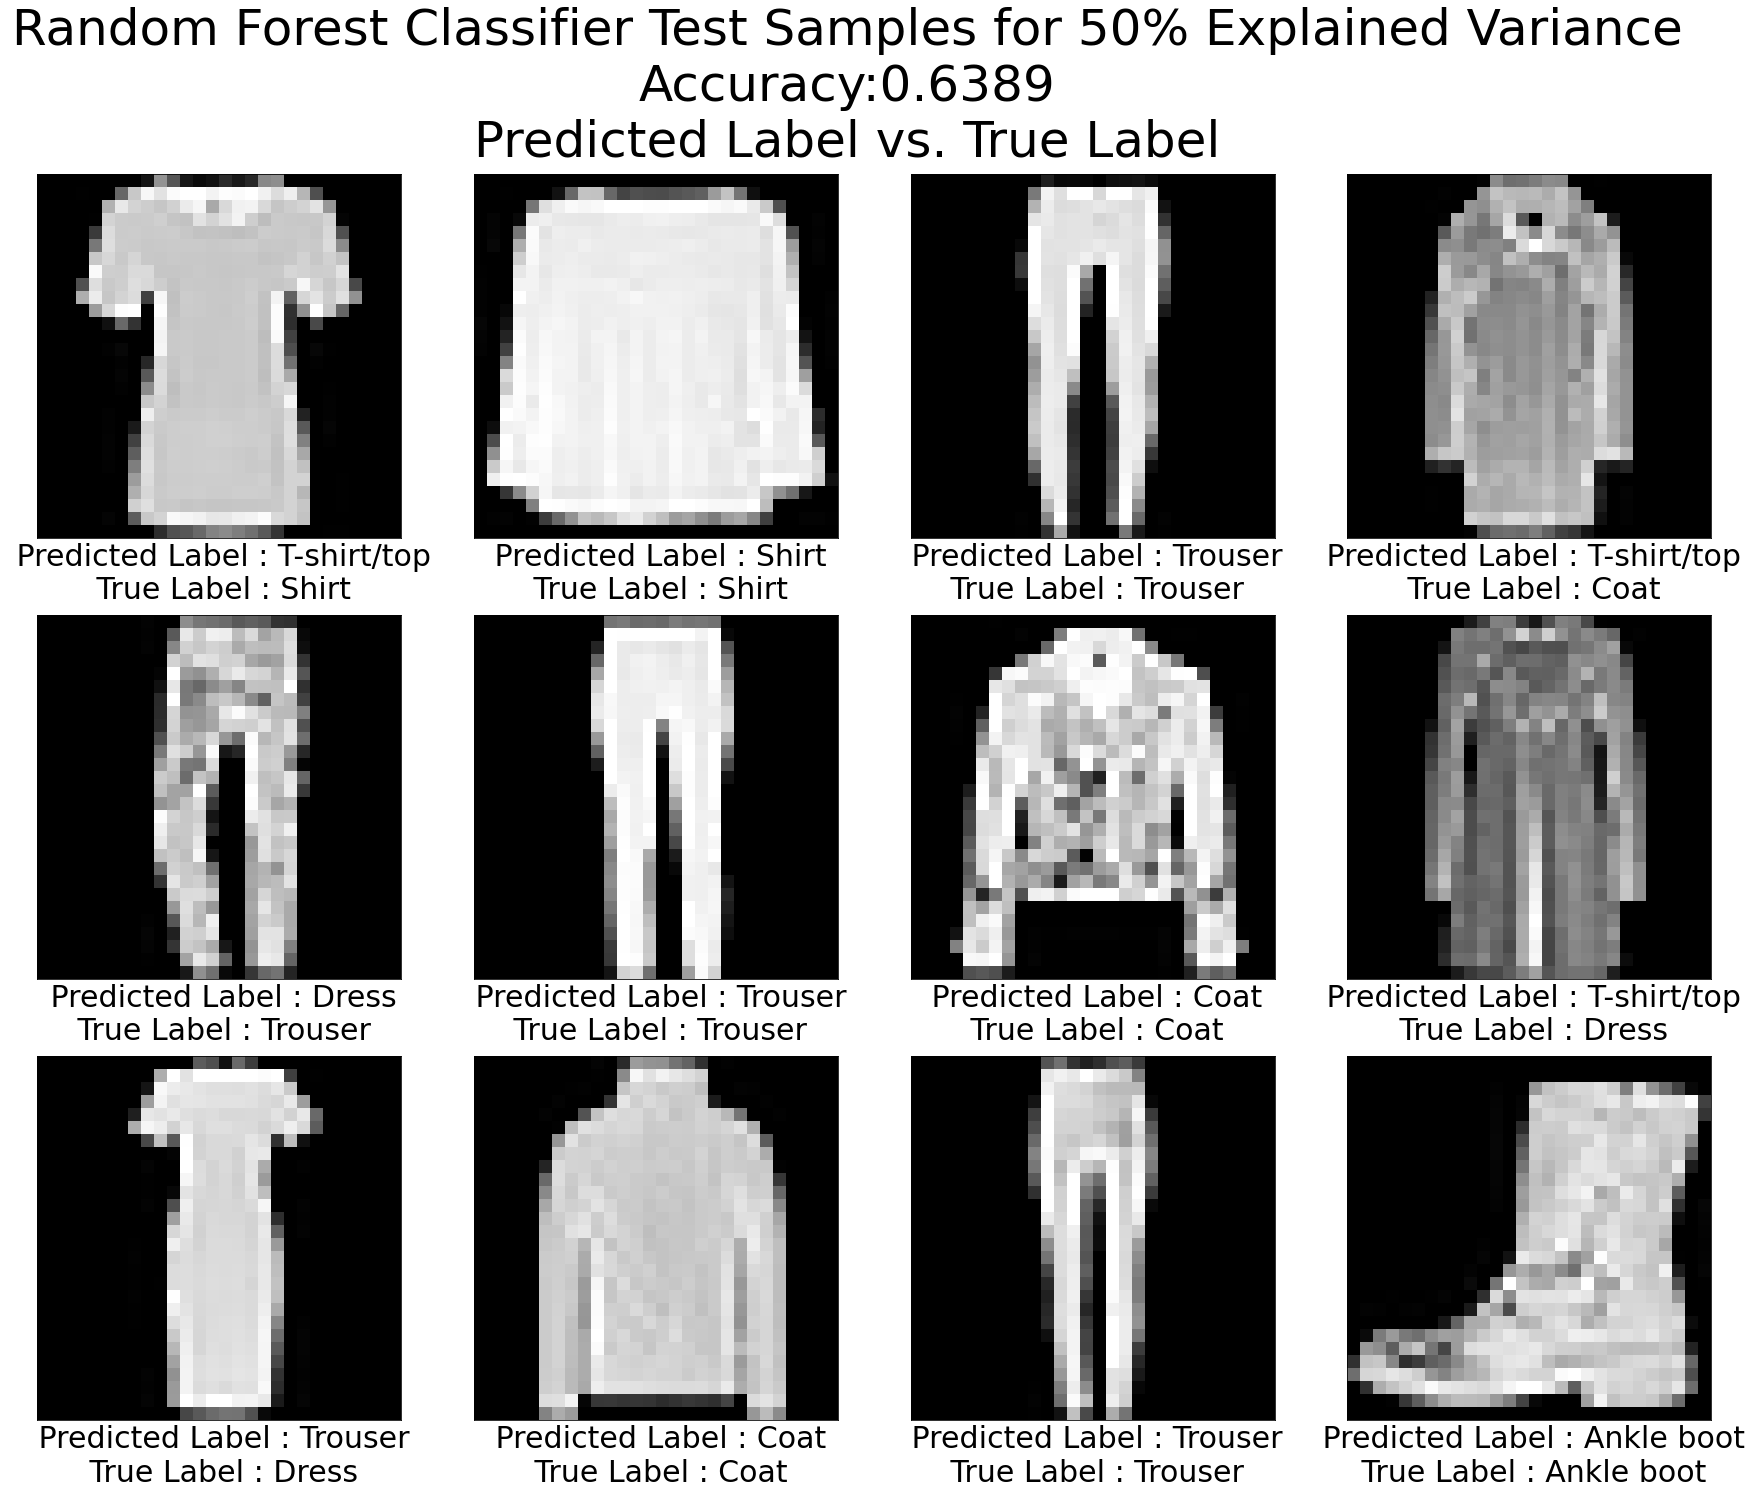

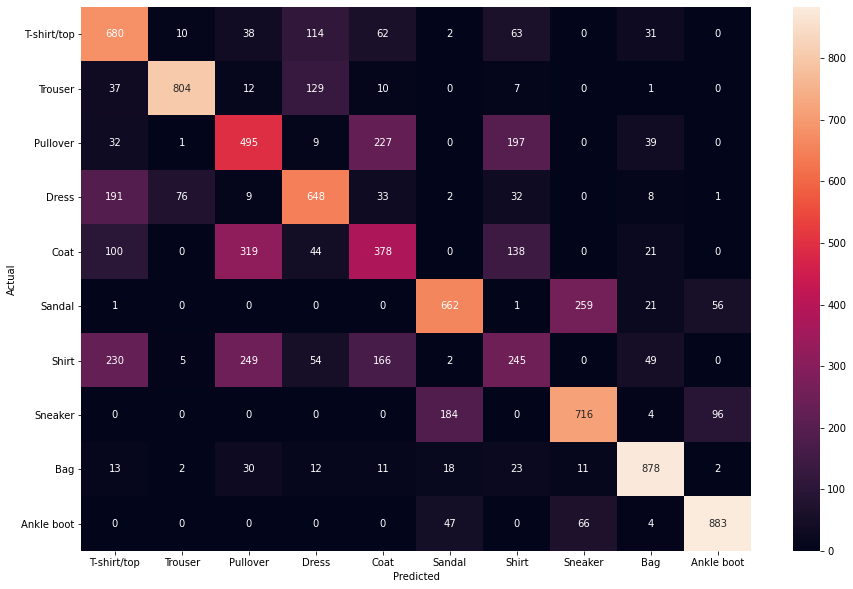

In [65]:
forest_f(x_pca50, x_pca50_test, 50)

<Figure size 432x288 with 0 Axes>

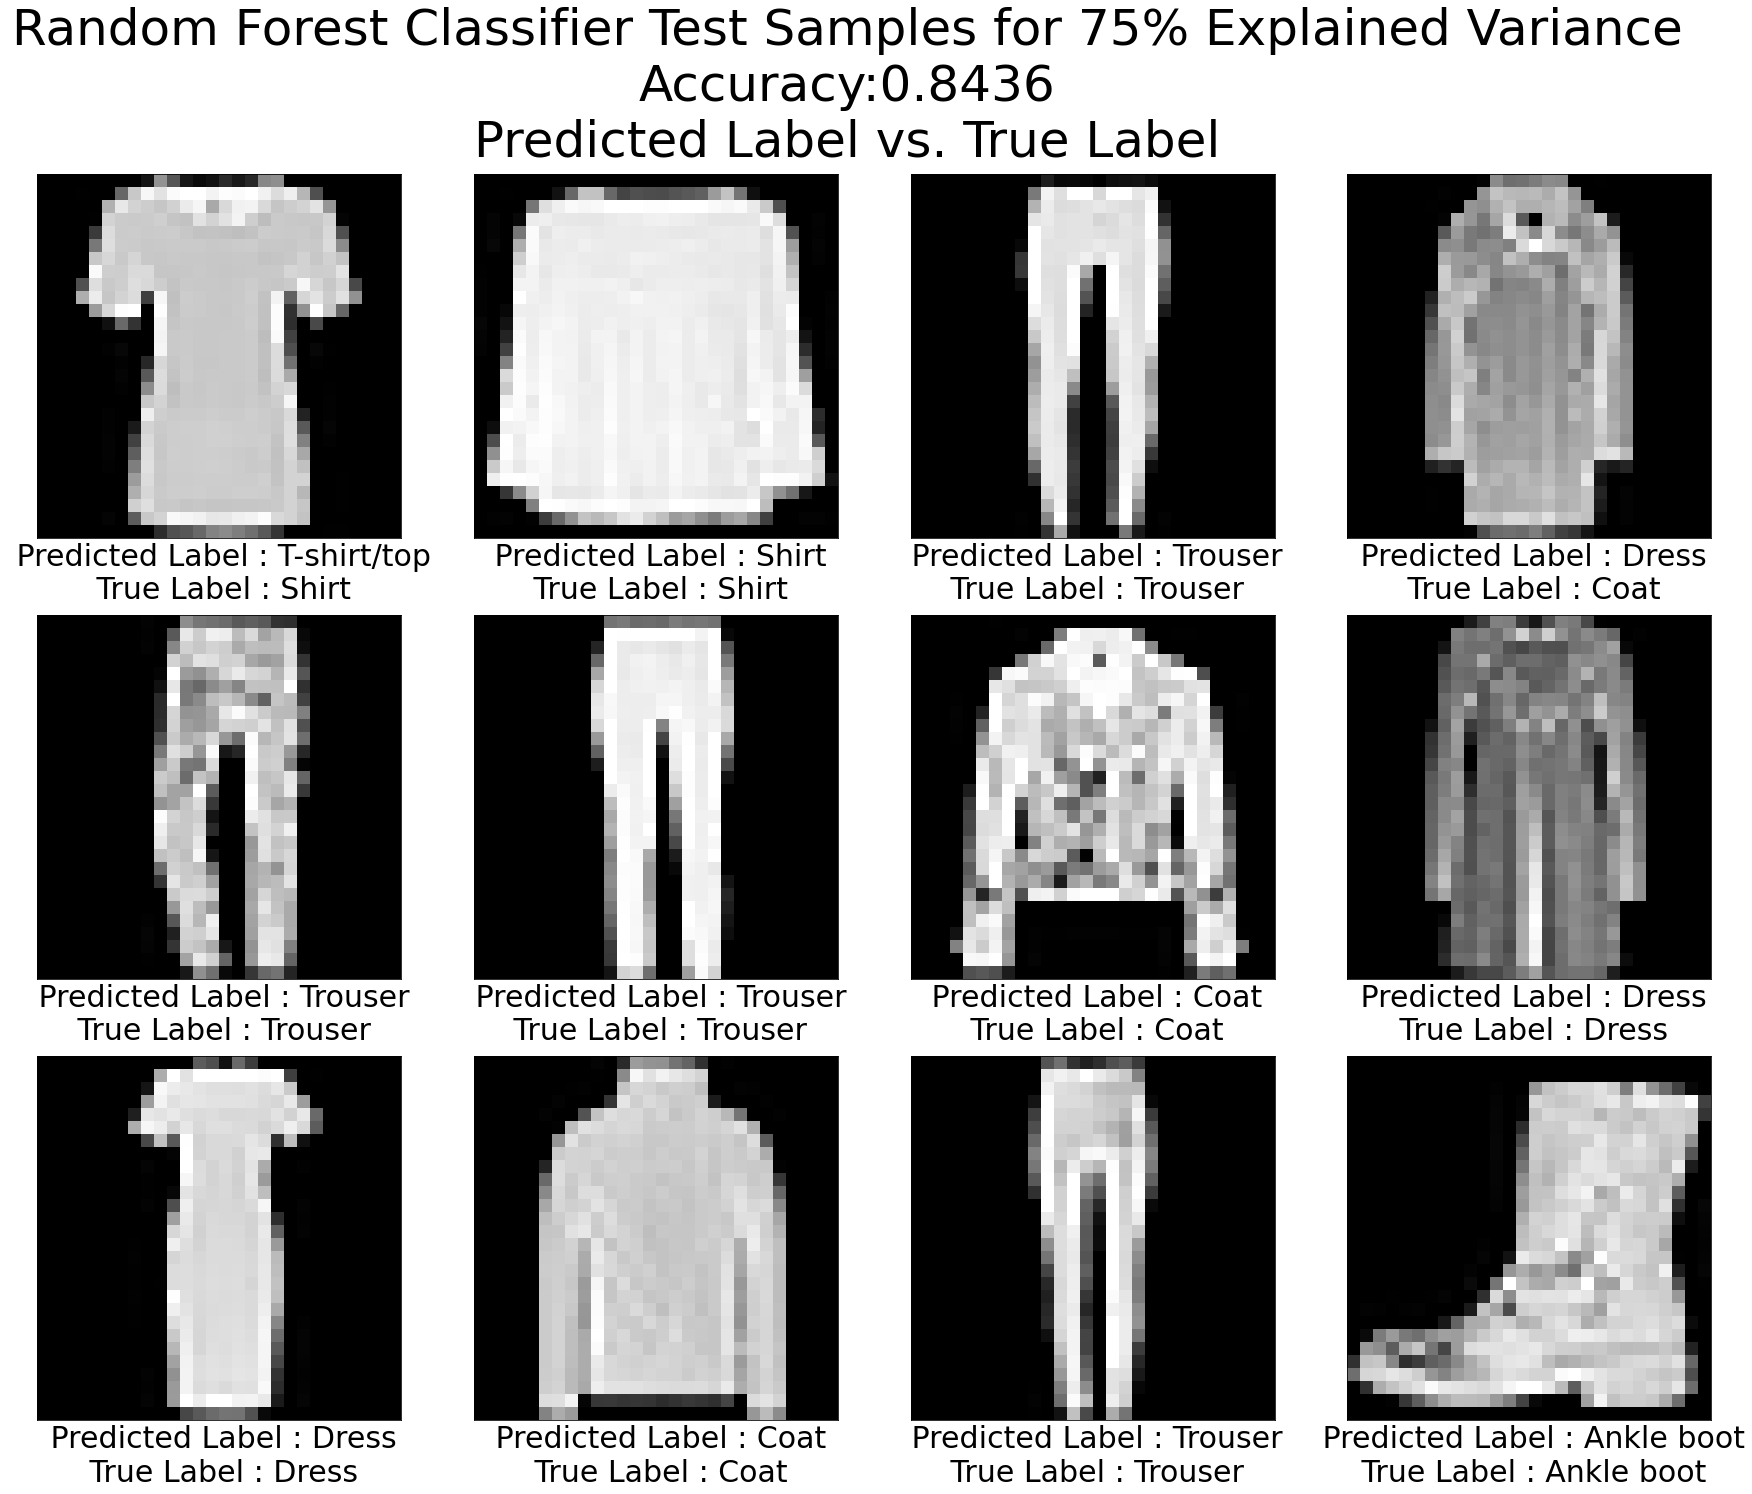

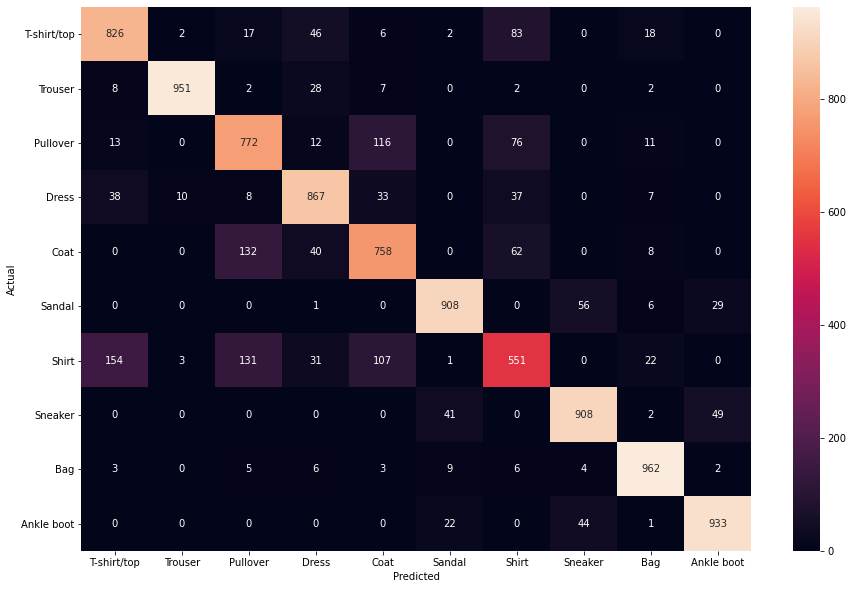

In [66]:
forest_f(x_pca75, x_pca75_test, 75)

<Figure size 432x288 with 0 Axes>

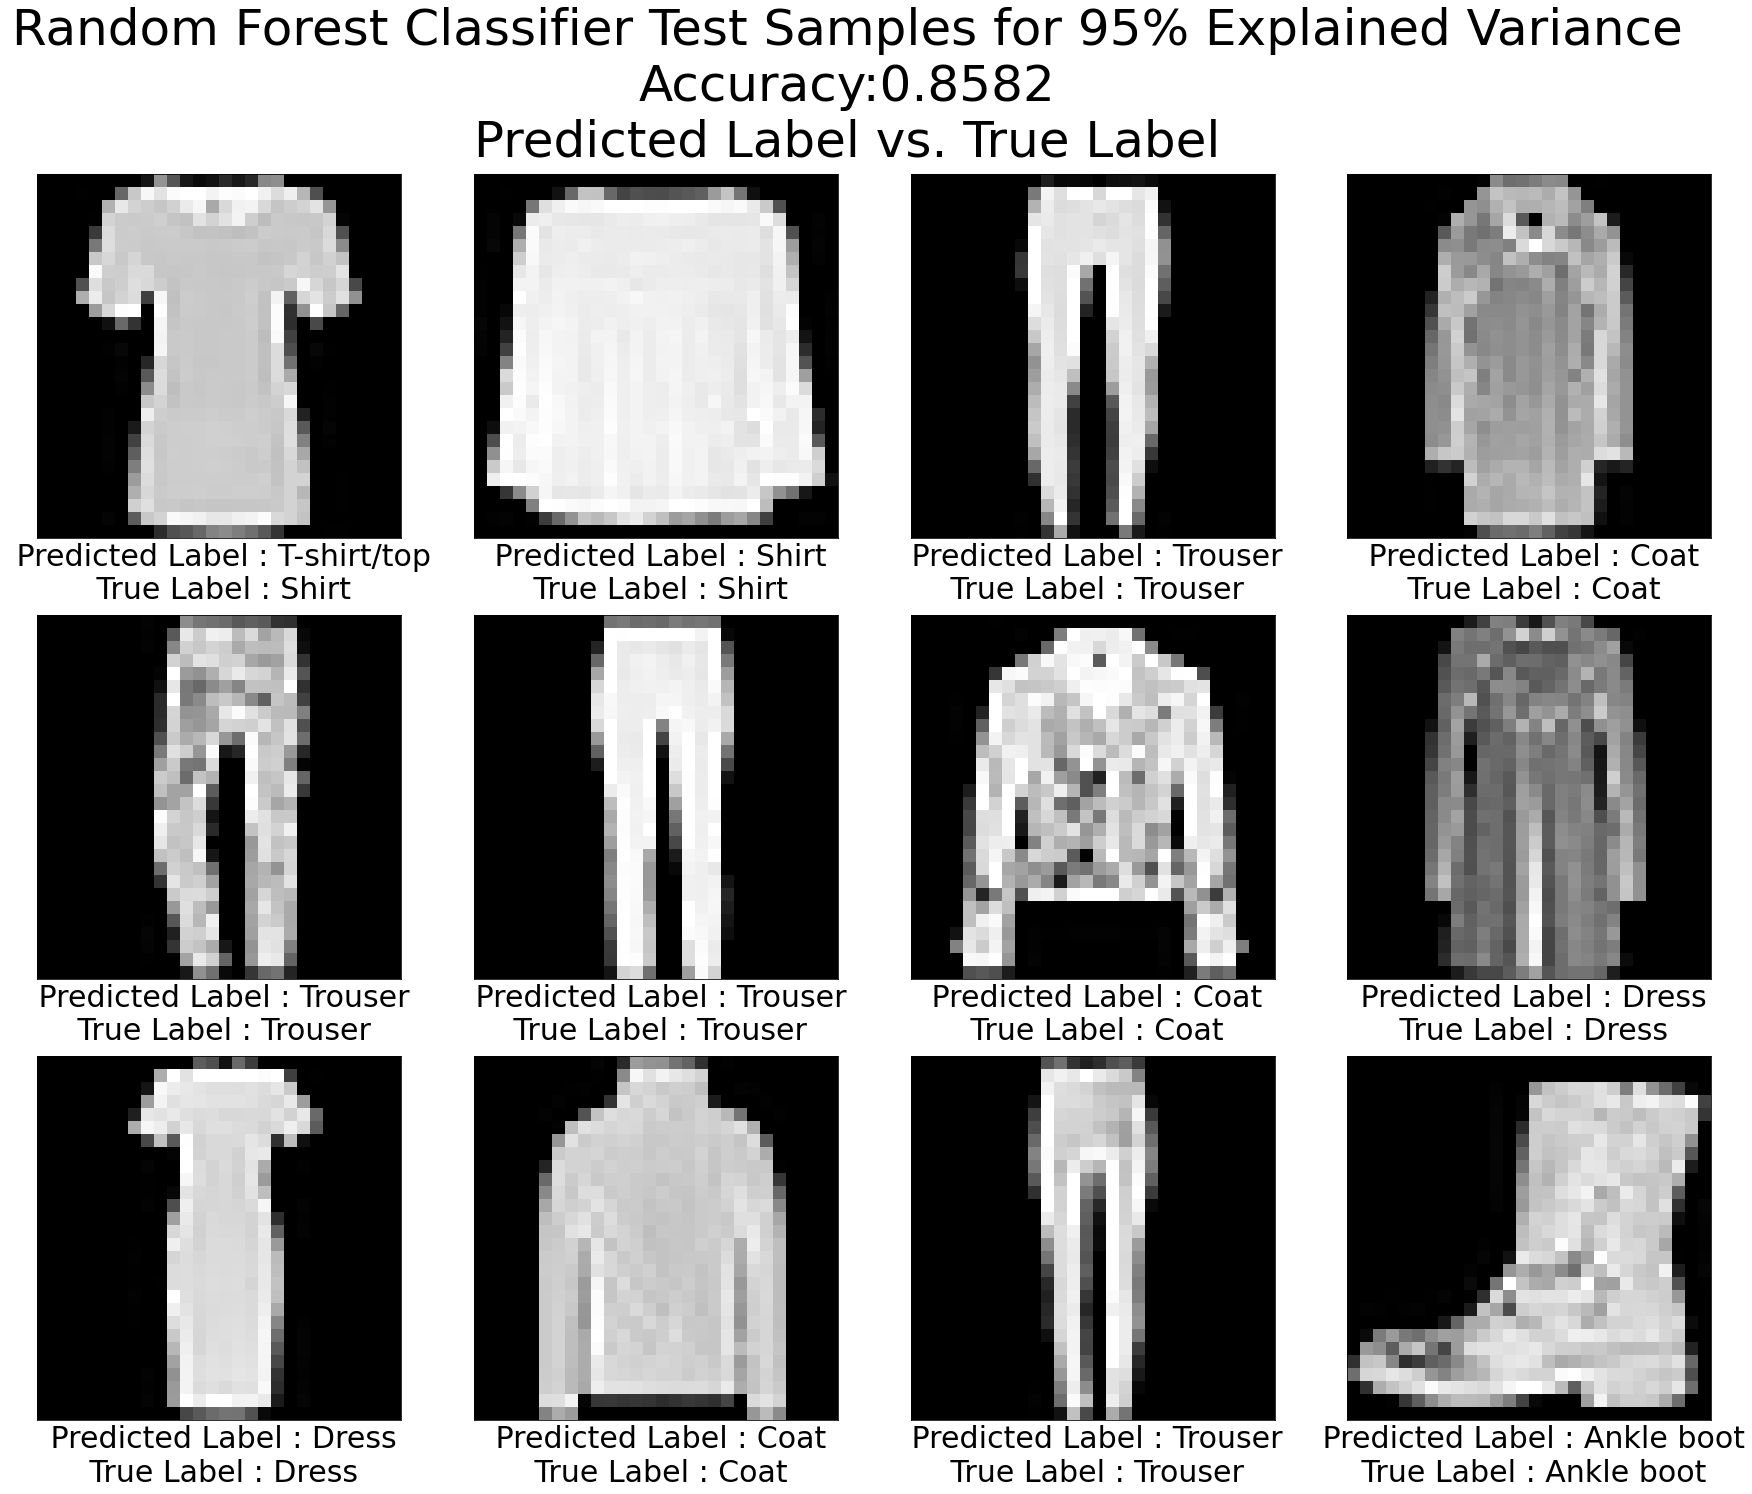

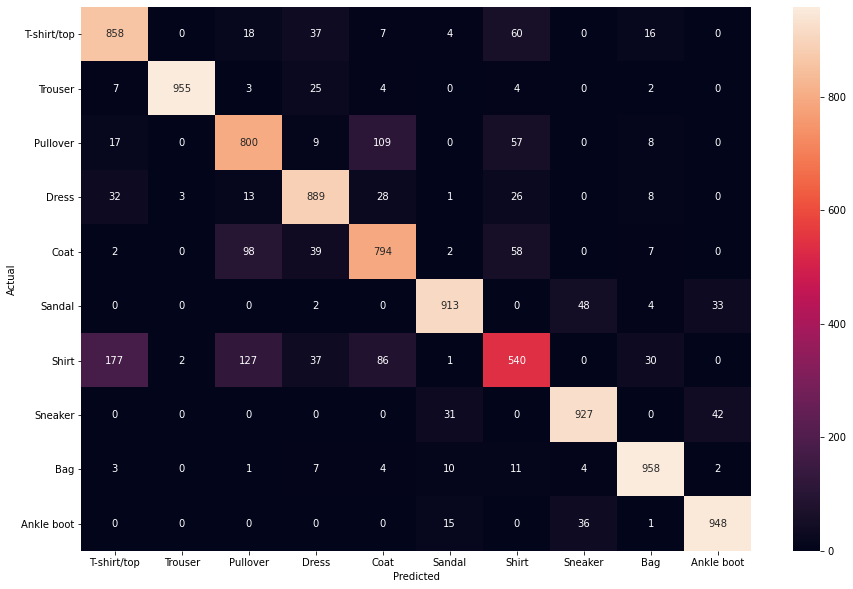

In [67]:
forest_f(x_pca95, x_pca95_test, 95)
forest_acc.append(accForest100)

In [68]:
#Defining function for SVC method for automation
svc_acc = []
def svc_f(x_pca_x, x_pca_xtest, var):
    mysvc=SVC(C=10, kernel="poly")
    mysvc.fit(x_pca_x,y_train)
    svcPred = mysvc.predict(x_pca_xtest)
    accSVC = accuracy_score(y_test, svcPred)
    svc_acc.append(accSVC)
    plt.gray()
    f, axarr = plt.subplots(3,4, figsize=(30,23)) 
    a = 0
    for  i in range(3):
        for j in range(4):
            axarr[i][j].imshow(reshaped_X_test[values[a]])
            axarr[i][j].set_xticks([])
            axarr[i][j].set_yticks([])
            axarr[i][j].set_xlabel(f" Predicted Label : {labels[svcPred[values[a]]]}\n True Label : {labels[y_test[values[a]]]}", fontsize=30)
            a = a + 1
    
    plt.suptitle(f"SVC Test Samples for {var}% Explained Variance\nAccuracy:{accSVC}\nPredicted Label vs. True Label", fontsize=50)
    plt.show()
    conf_matrix(svcPred)

<Figure size 432x288 with 0 Axes>

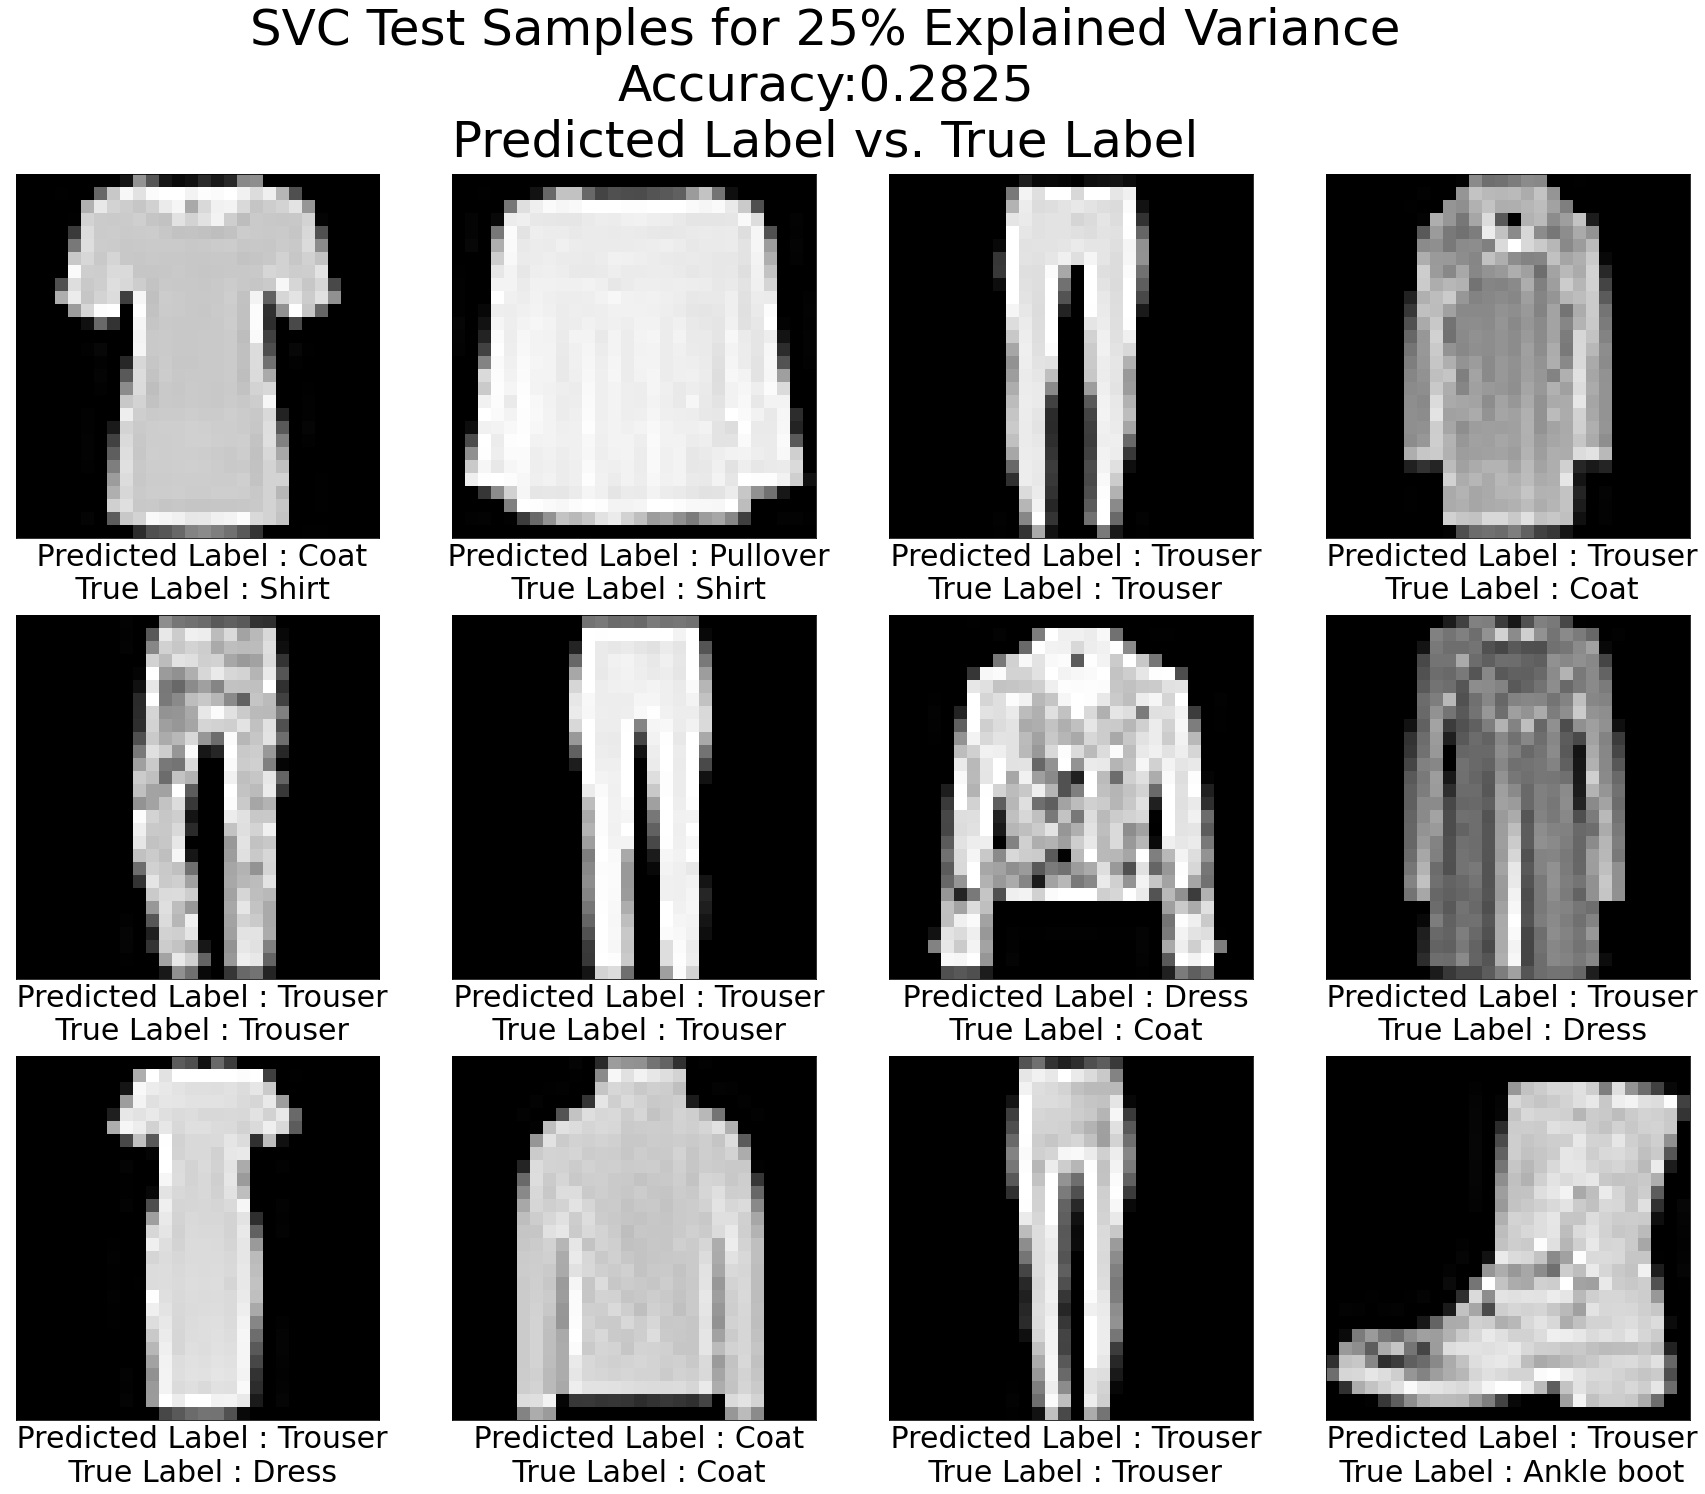

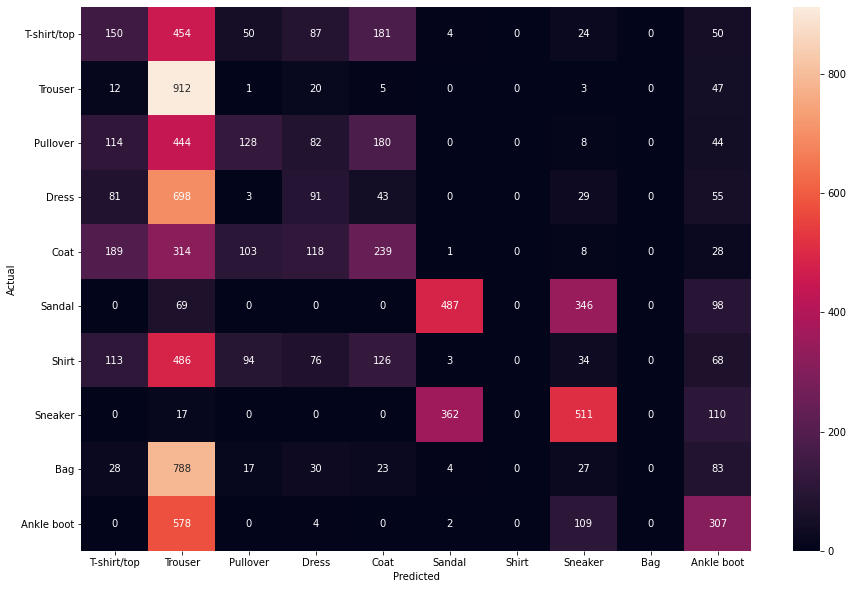

In [69]:
#Running SVC method for each reduced train and test data
svc_f(x_pca25, x_pca25_test, 25)

<Figure size 432x288 with 0 Axes>

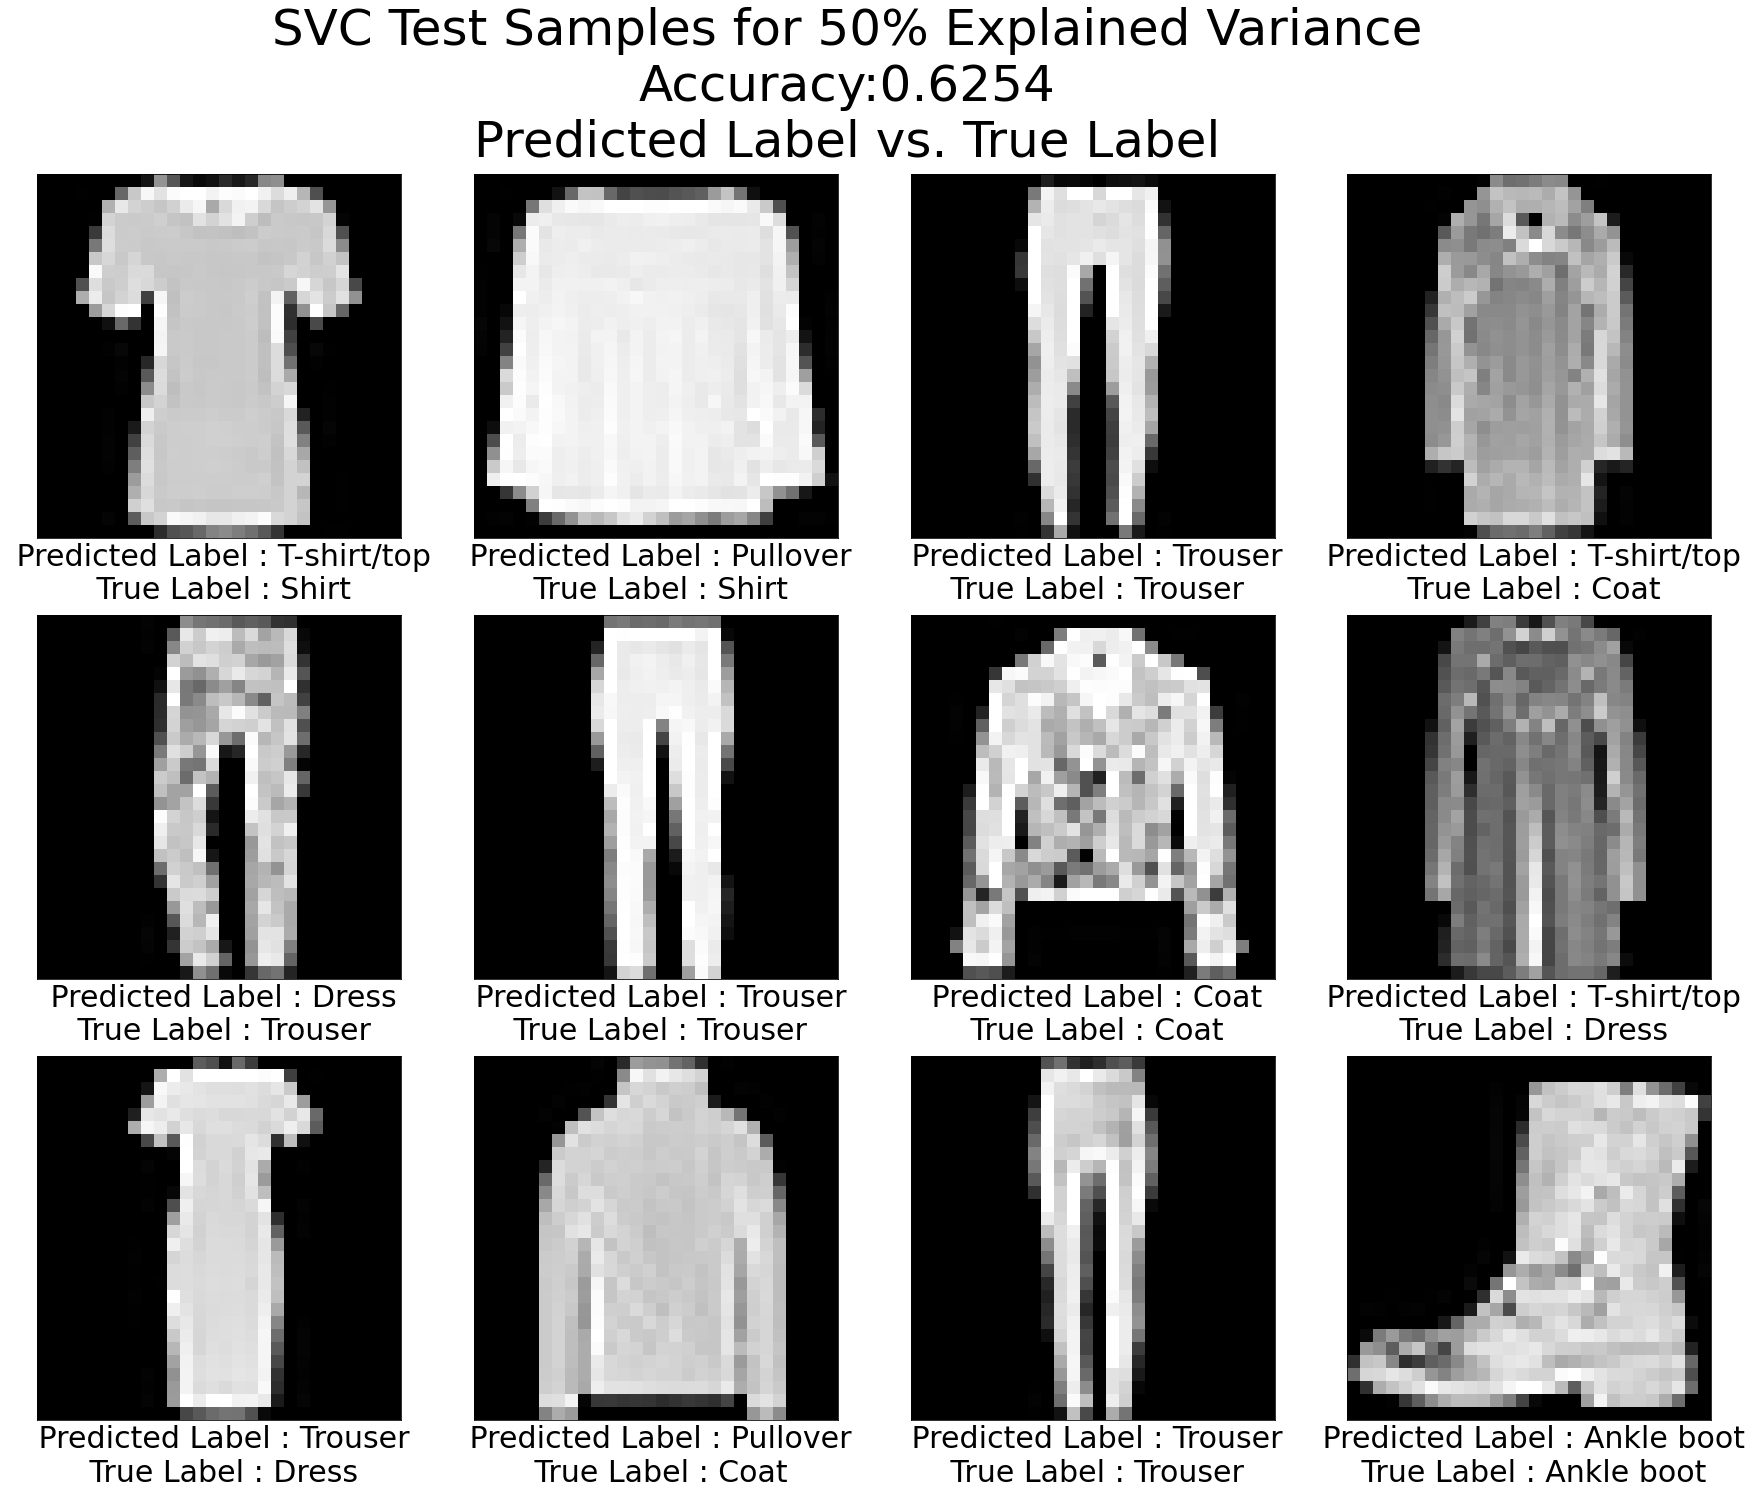

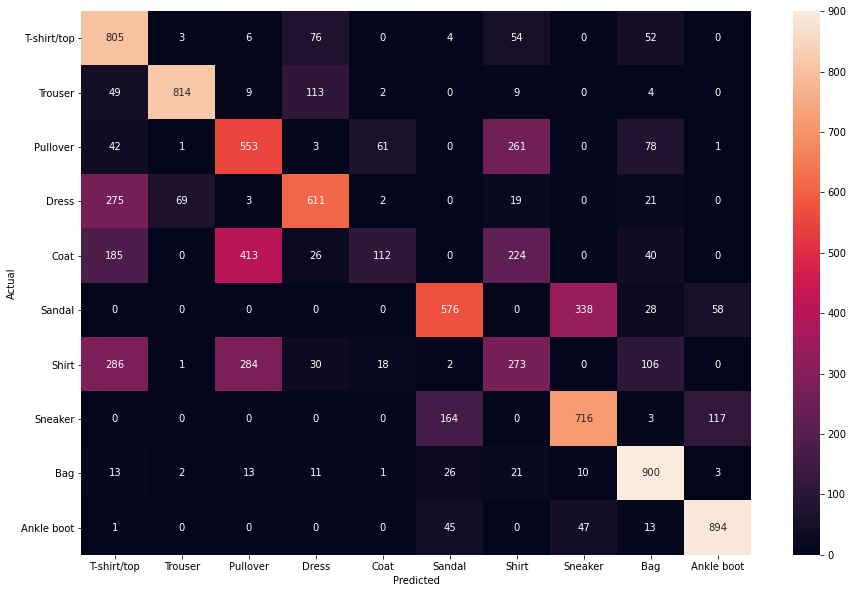

In [70]:
svc_f(x_pca50, x_pca50_test, 50)

<Figure size 432x288 with 0 Axes>

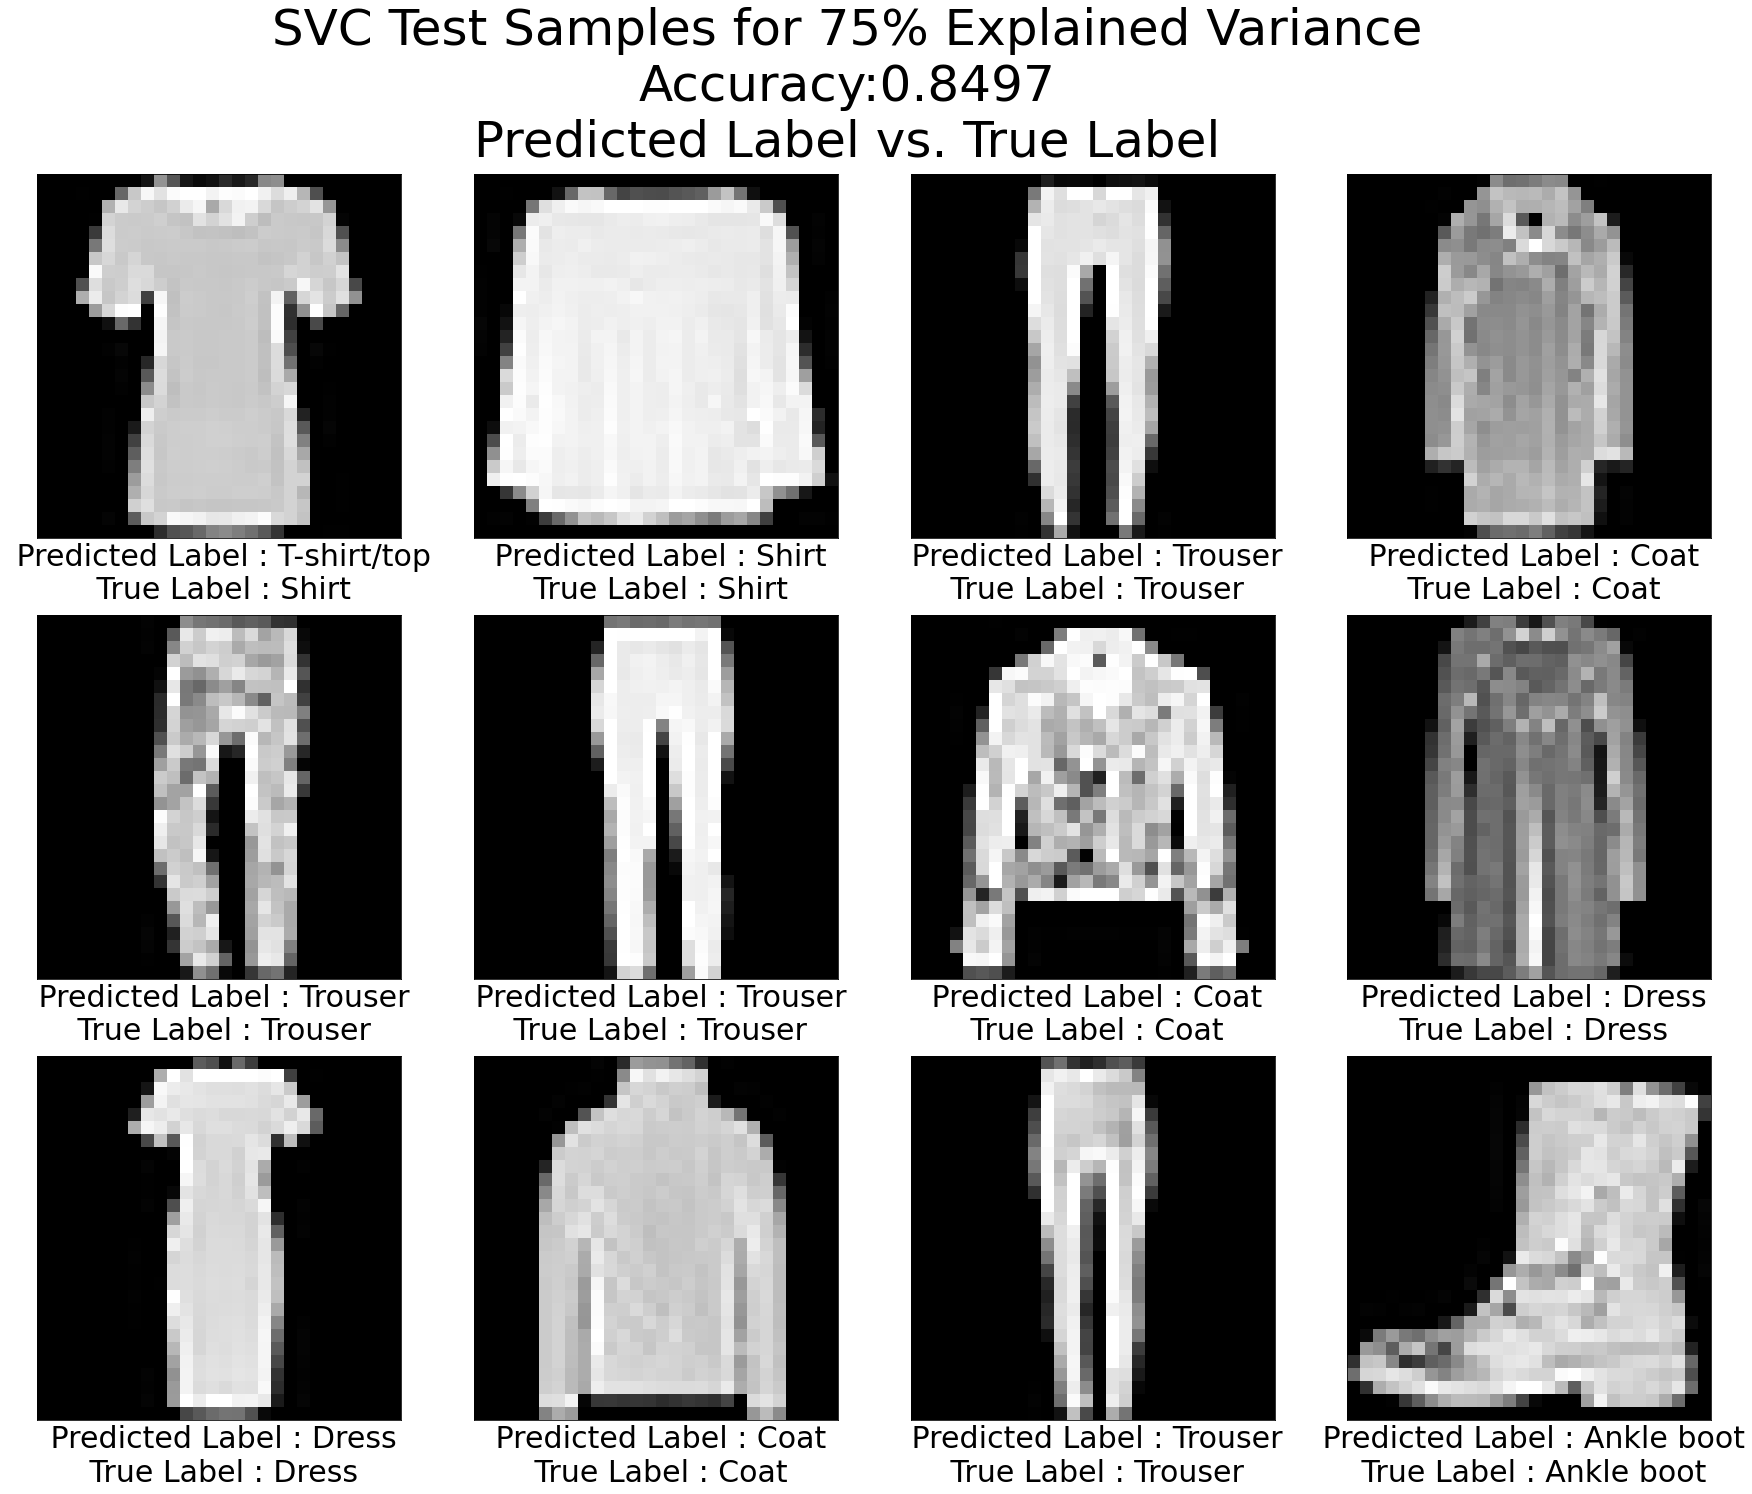

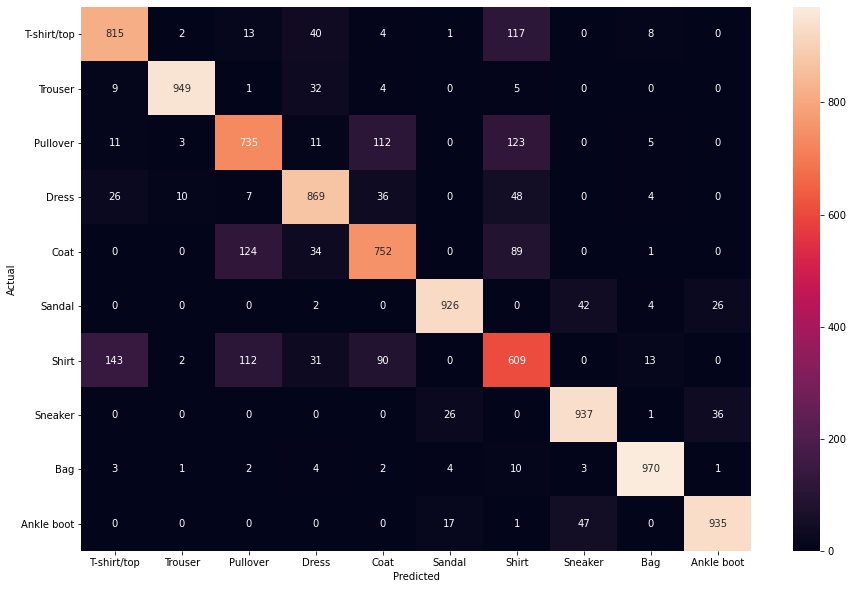

In [71]:
svc_f(x_pca75, x_pca75_test, 75)

<Figure size 432x288 with 0 Axes>

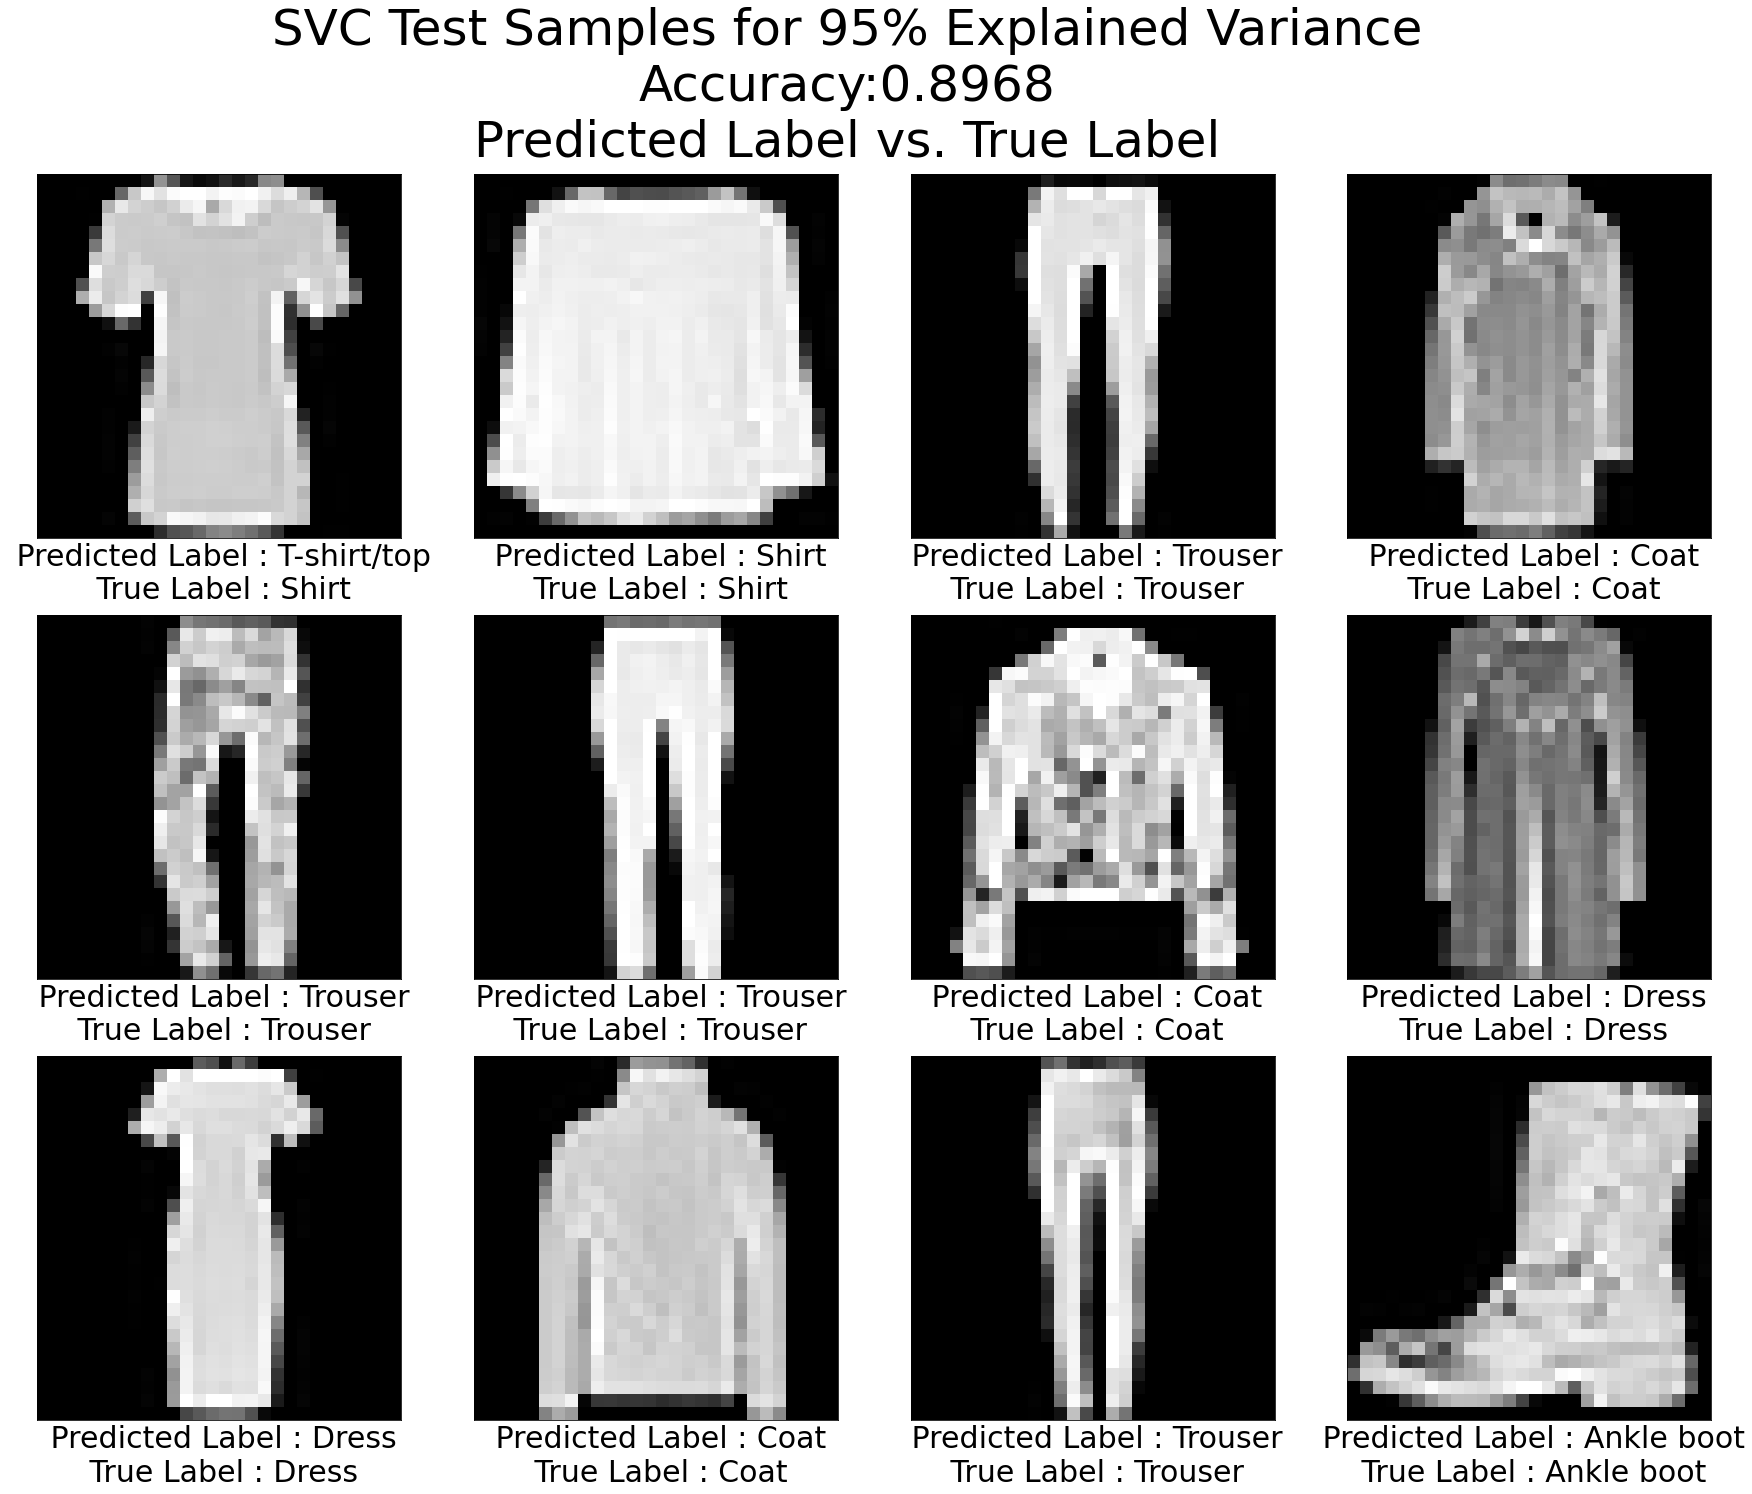

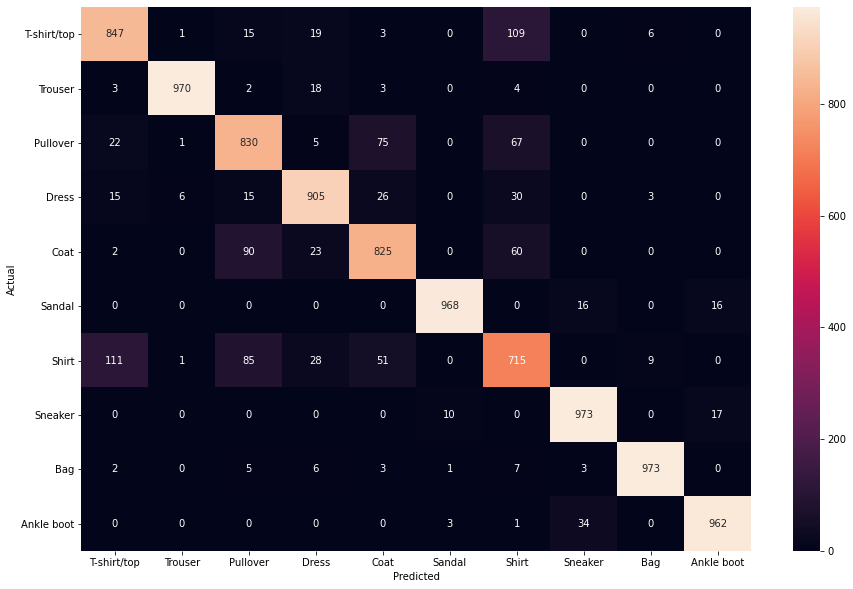

In [72]:
svc_f(x_pca95, x_pca95_test, 95)
svc_acc.append(accSVC100)

In [73]:
#Creating a dataframe for make a summarry of results of all models
import pandas as pd

cols = ["Classification Method", "Accuracy", "Number of Components", "Ratio of Explained Variance"]
methods = ["K Nearest Neighbours","Decision Trees", "Perceptron", "Random Forests", "SVC"]
method = []
for m in methods:
    for i in range(5):
        method.append(m)
all_acc = knn_acc + tree_acc + perc_acc + forest_acc + svc_acc

exp_vars = [25, 50, 75, 95, 100]
exp_var = []
for i in range(5):
    for e in exp_vars:
        exp_var.append(e)
num_comp = [n_comp_25, n_comp_50, n_comp_75, n_comp_95, 28*28]
num_comps = []
for h in range(5):
    for q in num_comp:
        num_comps.append(q)
data_1 = []

for i in range(25):
    data_1.append([method[i],all_acc[i],num_comps[i],exp_var[i]])

df = pd.DataFrame(data_1, columns = cols)
df

Classification Method  Accuracy  Number of Components  \
0   K Nearest Neighbours    0.2424                     1   
1   K Nearest Neighbours    0.6234                     3   
2   K Nearest Neighbours    0.8275                    14   
3   K Nearest Neighbours    0.8636                   187   
4   K Nearest Neighbours    0.8554                   784   
5         Decision Trees    0.3078                     1   
6         Decision Trees    0.6327                     3   
7         Decision Trees    0.7667                    14   
8         Decision Trees    0.7807                   187   
9         Decision Trees    0.8107                   784   
10            Perceptron    0.1363                     1   
11            Perceptron    0.4403                     3   
12            Perceptron    0.7216                    14   
13            Perceptron    0.7953                   187   
14            Perceptron    0.8142                   784   
15        Random Forests    0.2240                     1   
16        Random Forests    0.6389                     3   
17        Random Forests    0.8436                    14   
18        Random Forests    0.8582                   187   
19        Random Forests    0.8796                   784   
20                   SVC    0.2825                     1   
21                   SVC    0.6254                     3   
22                   SVC    0.8497                    14   
23                   SVC    0.8968                   187   
24                   SVC    0.8630                   784   

    Ratio of Explained Variance  
0                            25  
1                            50  
2                            75  
3                            95  
4                           100  
5                            25  
6                            50  
7                            75  
8                            95  
9                           100  
10                           25  
11                           50  
12                           75  
13                           95  
14                          100  
15                           25  
16                           50  
17                           75  
18                           95  
19                          100  
20                           25  
21                           50  
22                           75  
23                           95  
24                          100